<div style="background-color:lightblue; padding:10px;">
  <h1 style="color:darkblue;">2. PREDICTIVE MODELLING</h1>
</div>

In [1]:
import numpy as np
import pandas as pd

#import primary data

df = pd.read_csv('raw_clean_data.csv')
df.head()

,year,power,transport,residential,industry,biomass,forestry,farm,wastes,others,gross_total,exl_total,carbon_intensity,gdp_per_cap,pop_density,energy_use,arable_land,e_power,forest
0,1970,0.4758,0.8961,0.6650,0.9818,0.995060,41.1559,1.6707,0.7087,2.252822,49.801882,8.645982,0.206542,268.957734,17.017506,434.432374,1700000.0,91.490369,78508.6
1,1971,0.4758,0.8967,0.6650,1.0341,0.989626,41.1559,1.6847,0.7545,2.245122,49.901447,8.745547,0.192434,280.333660,17.770025,434.432374,1700000.0,91.490369,78508.6
2,1972,0.4910,0.9773,0.7083,1.2151,1.013719,41.1559,1.7186,0.7859,2.270622,50.336441,9.180541,0.205181,312.942348,18.584013,440.812215,1710000.0,98.312677,78508.6
3,1973,0.6621,0.9316,0.6846,1.1449,1.041680,41.1559,1.7531,0.8165,2.365522,50.555902,9.400002,0.199237,405.568980,19.449509,435.101757,1740000.0,108.165894,78508.6
4,1974,0.5969,0.9754,0.7191,1.2605,1.070894,41.1559,1.8129,0.8537,2.362622,50.807916,9.652016,0.196189,474.223861,20.358670,433.911070,1775000.0,110.749720,78508.6


In [2]:
# change the year column into a date time object

df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
df.set_index('year', inplace=True)

In [3]:
df.head()

,power,transport,residential,industry,biomass,forestry,farm,wastes,others,gross_total,exl_total,carbon_intensity,gdp_per_cap,pop_density,energy_use,arable_land,e_power,forest
year,,,,,,,,,,,,,,,,,,
1970,0.4758,0.8961,0.6650,0.9818,0.995060,41.1559,1.6707,0.7087,2.252822,49.801882,8.645982,0.206542,268.957734,17.017506,434.432374,1700000.0,91.490369,78508.6
1971,0.4758,0.8967,0.6650,1.0341,0.989626,41.1559,1.6847,0.7545,2.245122,49.901447,8.745547,0.192434,280.333660,17.770025,434.432374,1700000.0,91.490369,78508.6
1972,0.4910,0.9773,0.7083,1.2151,1.013719,41.1559,1.7186,0.7859,2.270622,50.336441,9.180541,0.205181,312.942348,18.584013,440.812215,1710000.0,98.312677,78508.6
1973,0.6621,0.9316,0.6846,1.1449,1.041680,41.1559,1.7531,0.8165,2.365522,50.555902,9.400002,0.199237,405.568980,19.449509,435.101757,1740000.0,108.165894,78508.6
1974,0.5969,0.9754,0.7191,1.2605,1.070894,41.1559,1.8129,0.8537,2.362622,50.807916,9.652016,0.196189,474.223861,20.358670,433.911070,1775000.0,110.749720,78508.6


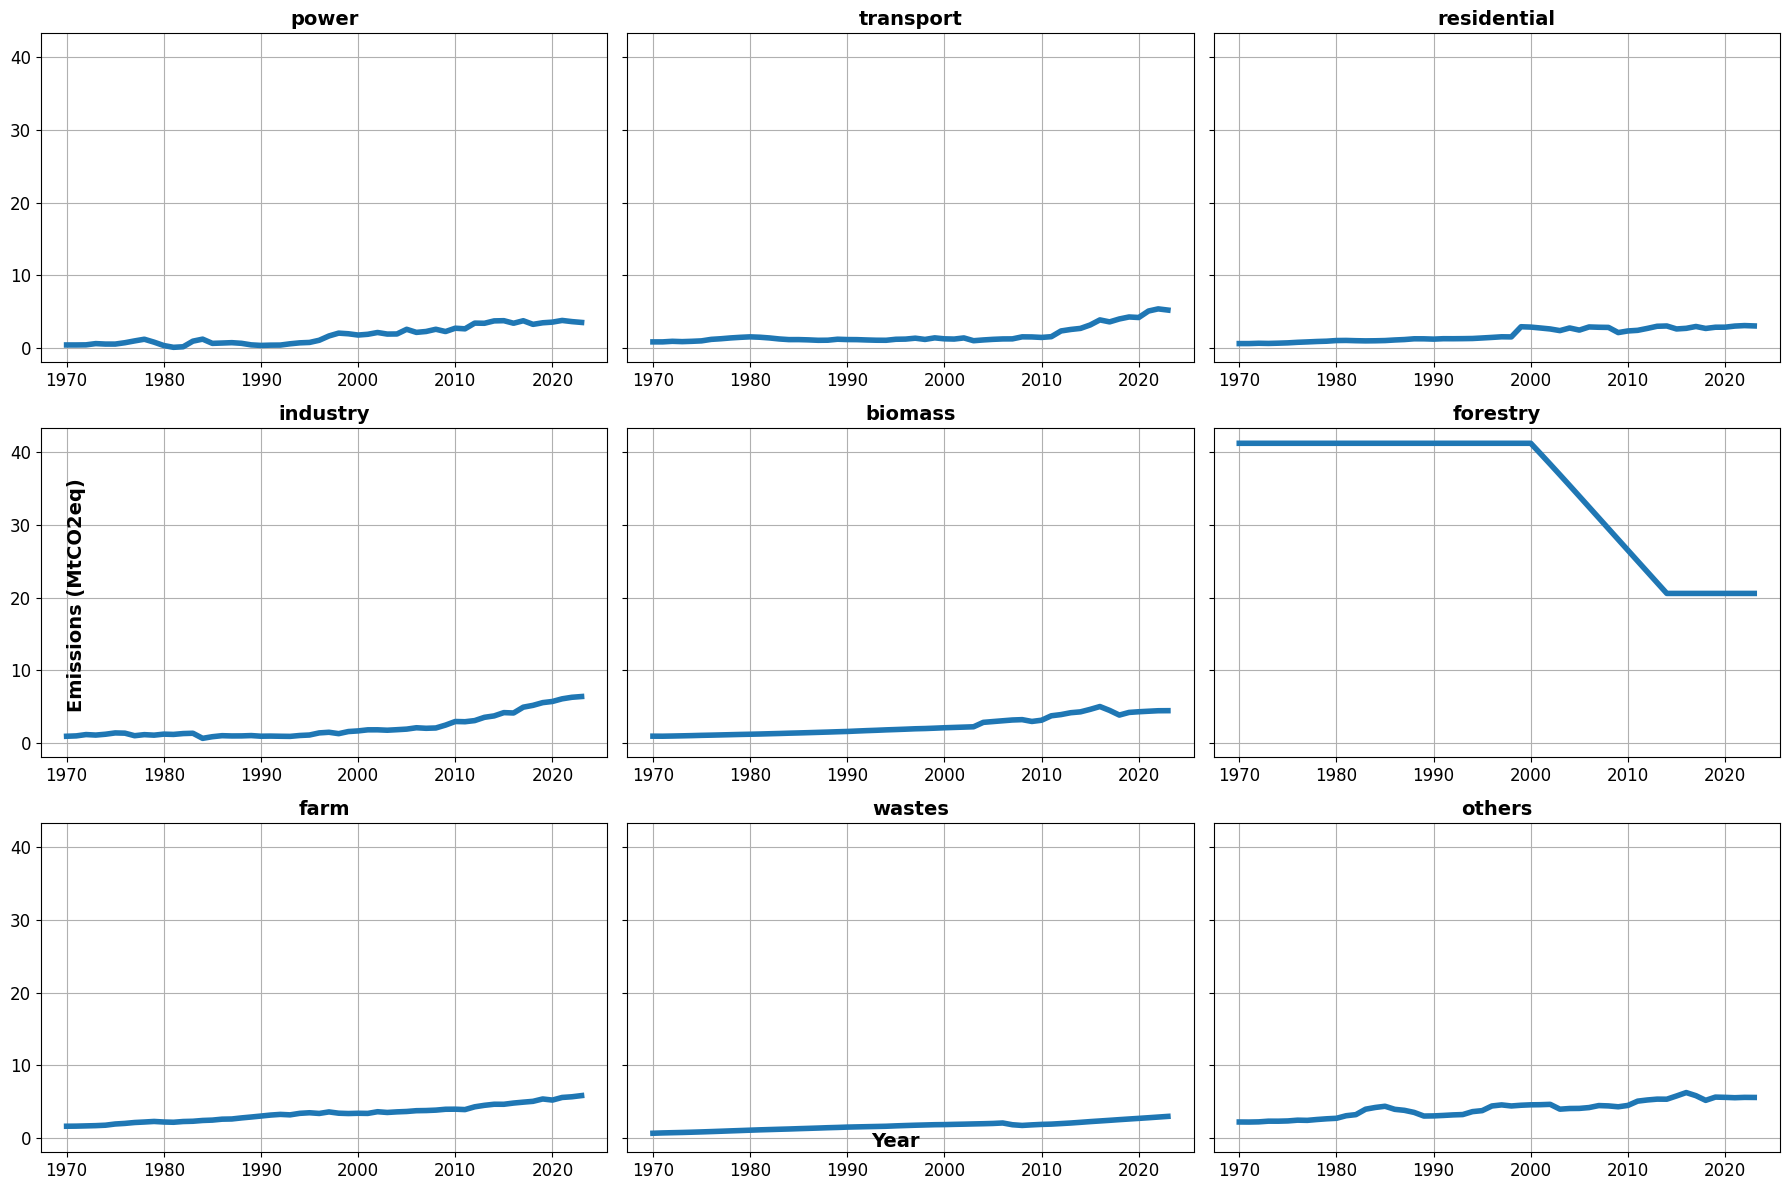

In [4]:
import matplotlib.pyplot as plt

sectors = ['power', 'transport', 'residential', 'industry', 'biomass', 'forestry',
       'farm', 'wastes', 'others']

# Set global font properties (optional but helpful)
plt.rcParams.update({
    'axes.titlesize': 14,      # Subplot title size
    'axes.titleweight': 'bold', # Bold titles
    'xtick.labelsize': 12,      # X-axis tick label size
    'ytick.labelsize': 12       # Y-axis tick label size
})

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for i, sector in enumerate(sectors):
    axes[i].plot(df.index, df[sector], color='tab:blue', linewidth=4)
    axes[i].set_title(sector, fontsize=14, fontweight='bold')  # Explicitly set
    axes[i].grid(True)
    axes[i].tick_params(axis='both', labelsize=12)  # Tick label size

# Common labels
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=14, fontweight='bold')
fig.text(0.04, 0.5, 'Emissions (MtCO2eq)', va='center', rotation='vertical', 
         fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("C:\\Users\\User\\Desktop\\Tech Industry\\Data Science\\Thesis\\Pictures\\md1.png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
df.columns

Index(['power', 'transport', 'residential', 'industry', 'biomass', 'forestry',
       'farm', 'wastes', 'others', 'gross_total', 'exl_total',
       'carbon_intensity', 'gdp_per_cap', 'pop_density', 'energy_use',
       'arable_land', 'e_power', 'forest'],
      dtype='object')

In [6]:
from statsmodels.tsa.stattools import adfuller
#check the stationarity

ad_test_result = adfuller(df['others'])
print(f'AD_statistic:{ad_test_result[0]}')   
print(f'p_value:{ad_test_result[1]}')

AD_statistic:-1.079267215017932
p_value:0.7232686918893051


In [7]:
# apply transformation

sector_diff = np.diff(df['others'], n=1)

ad_test_others = adfuller(sector_diff)
print(f'AD_statistic:{ad_test_others[0]}')   
print(f'p_value:{ad_test_others[1]}')

AD_statistic:-5.903862258964615
p_value:2.7377013790935675e-07


In [8]:
sector_DIFF = np.diff(sector_diff, n=2)
AD_test_transport = adfuller(sector_DIFF)
print(f'AD_stattistic:{AD_test_transport[0]}')   
print(f'p_value:{AD_test_transport[1]}')

AD_stattistic:-6.703183297515036
p_value:3.843096622774513e-09


In [9]:
# stationarity summer table

features = ['statistic', 'p_value', 'differencing']

stationarity = {
    'power' : [-7.726, 1.156e-11, 1 ],
    'transport' : [-4.742, 6.985e-05, 2 ],
    'residential' : [-8.382, 6.985e-05, 1 ],
    'industry' : [-5.839, 3.805e-07, 2 ],
    'biomass' : [-6.290, 3.617e-08, 1 ],
    'forestry' : [-6.622, 5.973e-09, 2 ],
    'farm' : [-9.116, 3.298e-15, 1 ],
    'wastes' : [-4.491, 0.0002, 1 ],
    'others' : [-5.903, 2.737e-07, 1 ]
}

df_stat = pd.DataFrame.from_dict(stationarity, orient='index', columns = features)
df_stat.reset_index().rename(columns={'index': 'sectors'})
df_stat.round(5)

,statistic,p_value,differencing
power,-7.726,0.00000,1
transport,-4.742,0.00007,2
residential,-8.382,0.00007,1
industry,-5.839,0.00000,2
biomass,-6.290,0.00000,1
forestry,-6.622,0.00000,2
farm,-9.116,0.00000,1
wastes,-4.491,0.00020,1
others,-5.903,0.00000,1


## Modelling


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=1 and Ljung-Box test...
ARIMA(0,1,1) - AIC: 25.41 - Ljung-Box p-value: 0.917
ARIMA(0,1,2) - AIC: 26.64 - Ljung-Box p-value: 0.890
ARIMA(0,1,3) - AIC: 26.84 - Ljung-Box p-value: 0.771
ARIMA(1,1,0) - AIC: 25.44 - Ljung-Box p-value: 0.921
ARIMA(1,1,1) - AIC: 24.52 - Ljung-Box p-value: 0.803
ARIMA(1,1,2) - AIC: 25.92 - Ljung-Box p-value: 0.870
ARIMA(1,1,3) - AIC: 27.92 - Ljung-Box p-value: 0.870
ARIMA(2,1,0) - AIC: 26.83 - Ljung-Box p-value: 0.920
ARIMA(2,1,1) - AIC: 28.74 - Ljung-Box p-value: 0.938
ARIMA(2,1,2) - AIC: 25.95 - Ljung-Box p-value: 0.953
ARIMA(2,1,3) - AIC: 29.14 - Ljung-Box p-value: 0.865
ARIMA(3,1,0) - AIC: 28.78 - Ljung-Box p-value: 0.937
ARIMA(3,1,1) - AIC: 30.74 - Ljung-Box p-value: 0.943
ARIMA(3,1,2) - AIC: 29.22 - Ljung-Box p-value: 0.862
ARIMA(3,1,3) - AIC: 30.27 - Ljung-Box p-value: 0.873

Selected ARIMA order: (1, 1, 1)
AIC: 24.52
Ljung-Box p-value: 0.803 (residuals show no autocorrelation)


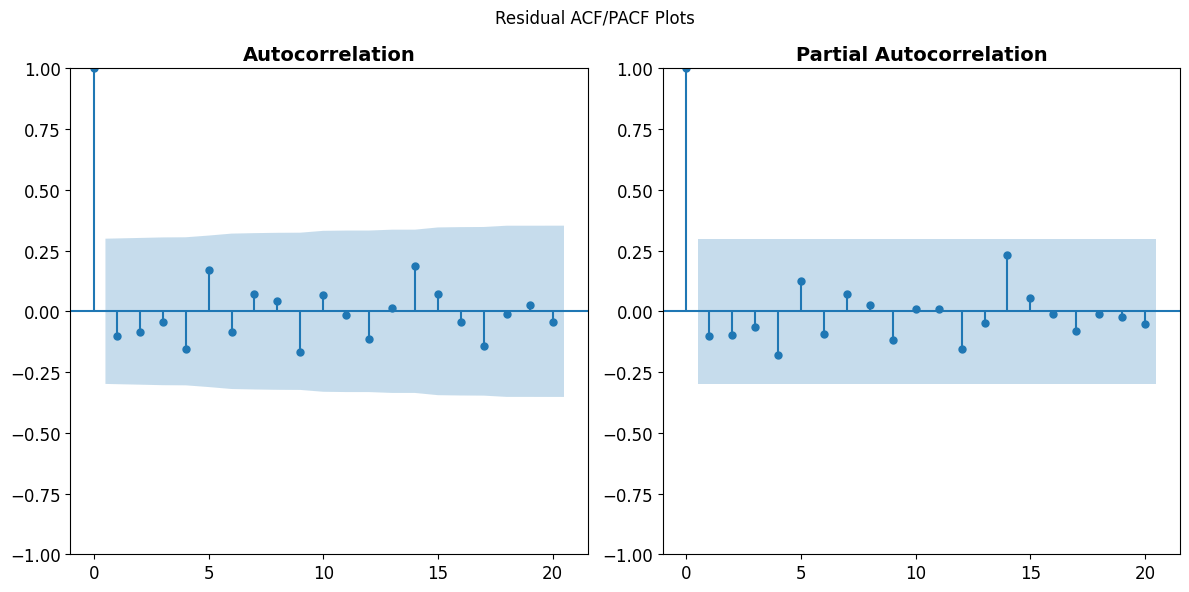


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 0.0118 - pss: 0.0951 - val_loss: 0.0135 - val_pss: 0.1002
Epoch 2/1000
1/1 [==============================] - loss: 0.0094 - pss: 0.0798 - val_loss: 0.0145 - val_pss: 0.1062
Epoch 3/1000
1/1 [==============================] - loss: 0.0079 - pss: 0.0686 - val_loss: 0.0148 - val_pss: 0.1037
Epoch 4/1000
1/1 [==============================] - loss: 0.0070 - pss: 0.0618 - val_loss: 0.0152 - val_pss: 0.0990
Epoch 5/1000
1/1 [==============================] - loss: 0.0065 - pss: 0.0587 - val_loss: 0.0156 - val_pss: 0.0941
Epoch 6/1000
1/1 [==============================] - loss: 0.0062 - pss: 0.0579 - val_loss: 0.0161 - val_pss: 0.0926
Early stopping triggered after 6 epochs.

Best Metrics: loss: 0.0062 - pss: 0.0579 - val_loss: 0.0161 - val_pss: 0.0926
 1/1 [==============================] 100.0%   - ETA: 0.01s

Optimized Hybrid Model Performance (d=1):
Me

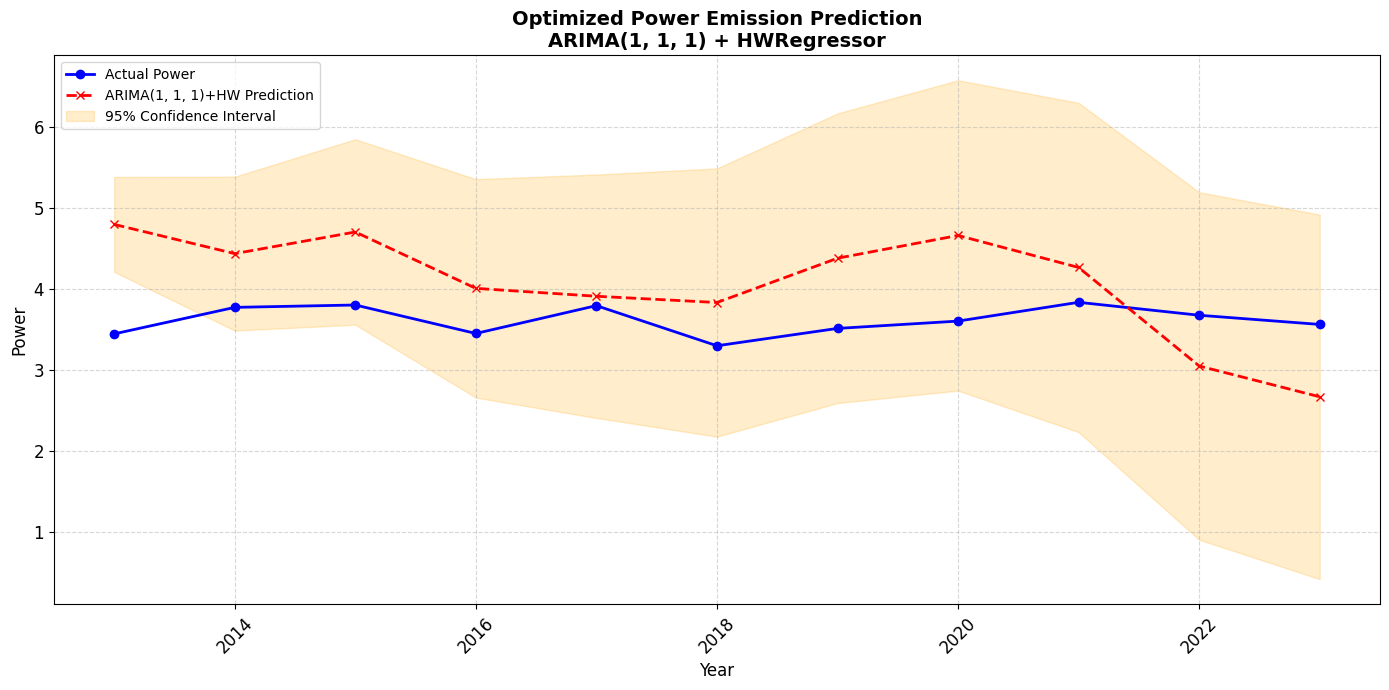


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 22.288
p-value: 0.014


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


df_clean = df.dropna(subset=['power', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes
y = df_clean['power'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values  # Get the index values (years)

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ARIMA Grid Search Function with fixed d=1 and Ljung-Box test
def find_best_arima(y_train, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=1) including Ljung-Box test"""
    best_aic = np.inf
    best_order = None
    best_model = None
    best_ljungbox = None
    
    # Generate all possible combinations of p and q with d=1
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue  # Skip (0,1,0) as it's just differencing
            
        try:
            model = ARIMA(y_train.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            # Perform Ljung-Box test on residuals
            lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
            lb_pvalue = lb_test['lb_pvalue'].values[0]
            
            print(f"ARIMA({p},1,{q}) - AIC: {current_aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
            
            # Prefer models where residuals show no autocorrelation (p-value > 0.05)
            if current_aic < best_aic and lb_pvalue > 0.05:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                best_ljungbox = lb_pvalue
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},1,{q}): {str(e)}")
            continue
    
    if best_order is None:
        print("Warning: No model passed Ljung-Box test (p-value > 0.05), using best AIC regardless")
        # Fallback to best AIC without Ljung-Box constraint
        for p, q in product(range(max_p+1), range(max_q+1)):
            if p == 0 and q == 0:
                continue
            try:
                model = ARIMA(y_train.ravel(), order=(p,1,q))
                results = model.fit()
                current_aic = results.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 1, q)
                    best_model = results
            except:
                continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    if best_ljungbox is not None:
        print(f"Ljung-Box p-value: {best_ljungbox:.3f} (residuals show no autocorrelation)")
    else:
        print("Warning: Selected model may have autocorrelated residuals")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=1
print("\nPerforming ARIMA grid search with d=1 and Ljung-Box test...")
best_order, arima_fit = find_best_arima(y_train)

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(y_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(y_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals to check model adequacy
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('Residual ACF/PACF Plots')
plt.tight_layout()
plt.show()

# 2. HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = y_train - arima_train_pred

hw_regressor = HWRegressor(
    p=15,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.03,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
y_test = y_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((y_test - final_test_pred) / y_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]  # Remove infinite values
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(y_test, final_test_pred)
mae = mean_absolute_error(y_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nOptimized Hybrid Model Performance (d=1):")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual Power', marker='o', color='blue', linewidth=2)
plt.plot(dates_test, final_test_pred, label=f'ARIMA{best_order}+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Add confidence intervals
conf_int = arima_fit.get_forecast(steps=len(y_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Optimized Power Emission Prediction\nARIMA{best_order} + HWRegressor', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('power_essai_optimized_d1_ljungbox.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform final Ljung-Box test on complete model residuals
final_residuals = y_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=1 and Ljung-Box test on full dataset...
ARIMA(0,1,1) - AIC: 27.48 - Ljung-Box p-value: 0.662
ARIMA(0,1,2) - AIC: 29.44 - Ljung-Box p-value: 0.640
ARIMA(0,1,3) - AIC: 31.13 - Ljung-Box p-value: 0.775
ARIMA(1,1,0) - AIC: 27.49 - Ljung-Box p-value: 0.660
ARIMA(1,1,1) - AIC: 29.31 - Ljung-Box p-value: 0.541
ARIMA(1,1,2) - AIC: 27.51 - Ljung-Box p-value: 0.796
ARIMA(1,1,3) - AIC: 29.41 - Ljung-Box p-value: 0.815
ARIMA(2,1,0) - AIC: 29.47 - Ljung-Box p-value: 0.640
ARIMA(2,1,1) - AIC: 31.35 - Ljung-Box p-value: 0.645
ARIMA(2,1,2) - AIC: 27.61 - Ljung-Box p-value: 0.929
ARIMA(2,1,3) - AIC: 32.42 - Ljung-Box p-value: 0.674
ARIMA(3,1,0) - AIC: 31.21 - Ljung-Box p-value: 0.712
ARIMA(3,1,1) - AIC: 33.12 - Ljung-Box p-value: 0.735
ARIMA(3,1,2) - AIC: 32.42 - Ljung-Box p-value: 0.677
ARIMA(3,1,3) - AIC: 34.55 - Ljung-Box p-value: 0.639

Selected ARIMA order: (0, 1, 1)
AIC: 27.48
Ljung-Box p-value: 0.662 (residuals show no aut

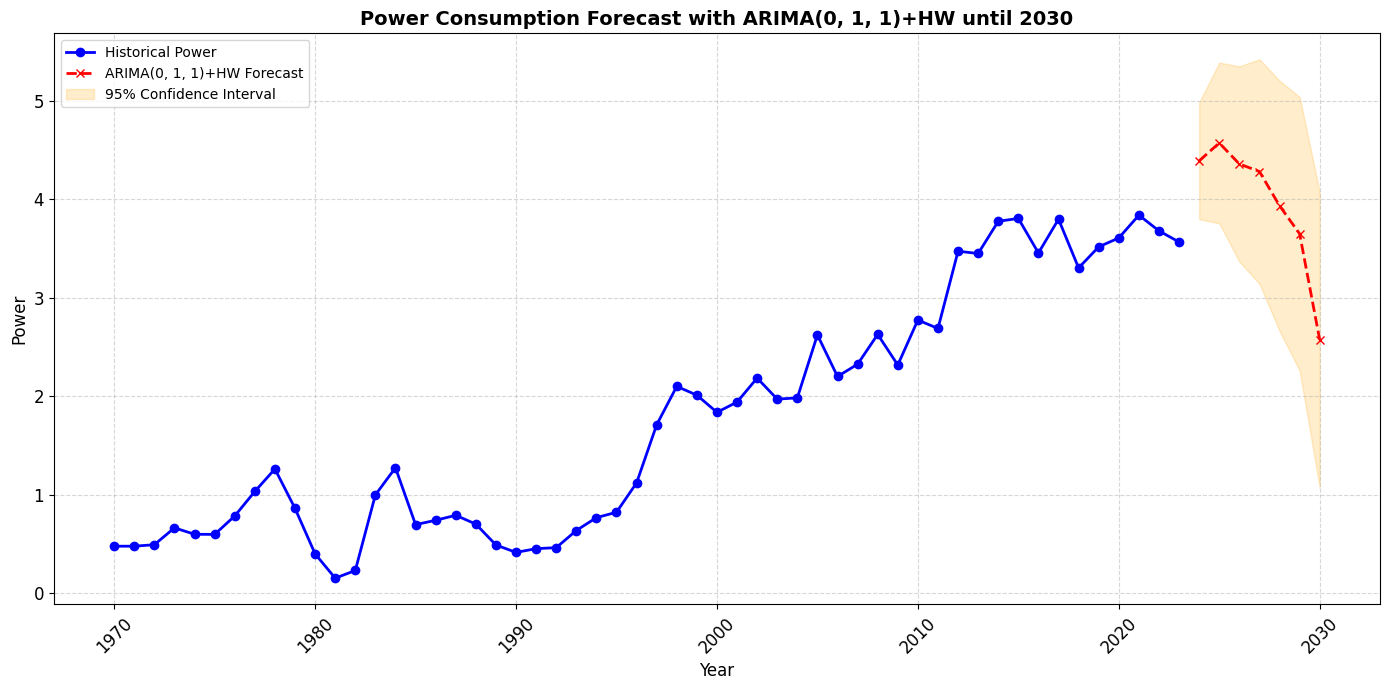


Forecasted values until 2030:
    Date     Power      Type
54  2024  4.389255  Forecast
55  2025  4.570897  Forecast
56  2026  4.357579  Forecast
57  2027  4.280931  Forecast
58  2028  3.932956  Forecast
59  2029  3.648620  Forecast
60  2030  2.570897  Forecast


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['power', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Prepare arrays with 'power' as target
y = df_clean['power'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# ARIMA Grid Search Function with fixed d=1 and Ljung-Box test
def find_best_arima(y_train, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=1) including Ljung-Box test"""
    best_aic = np.inf
    best_order = None
    best_model = None
    best_ljungbox = None
    
    # Generate all possible combinations of p and q with d=1
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue  # Skip (0,1,0) as it's just differencing
            
        try:
            model = ARIMA(y_train.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            # Perform Ljung-Box test on residuals
            lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
            lb_pvalue = lb_test['lb_pvalue'].values[0]
            
            print(f"ARIMA({p},1,{q}) - AIC: {current_aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
            
            # Prefer models where residuals show no autocorrelation (p-value > 0.05)
            if current_aic < best_aic and lb_pvalue > 0.05:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                best_ljungbox = lb_pvalue
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},1,{q}): {str(e)}")
            continue
    
    if best_order is None:
        print("Warning: No model passed Ljung-Box test (p-value > 0.05), using best AIC regardless")
        # Fallback to best AIC without Ljung-Box constraint
        for p, q in product(range(max_p+1), range(max_q+1)):
            if p == 0 and q == 0:
                continue
            try:
                model = ARIMA(y_train.ravel(), order=(p,1,q))
                results = model.fit()
                current_aic = results.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 1, q)
                    best_model = results
            except:
                continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    if best_ljungbox is not None:
        print(f"Ljung-Box p-value: {best_ljungbox:.3f} (residuals show no autocorrelation)")
    else:
        print("Warning: Selected model may have autocorrelated residuals")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=1 on full data
print("\nPerforming ARIMA grid search with d=1 and Ljung-Box test on full dataset...")
best_order, arima_fit = find_best_arima(y)

# Get ARIMA predictions for historical data
arima_hist_pred = arima_fit.predict(start=1, end=len(y), typ='levels').reshape(-1, 1)

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals = y - arima_hist_pred

hw_regressor = HWRegressor(
    p=15,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.03,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_scaled, residuals.ravel())

# Create future dates until 2030
last_date = df_clean.index[-1]
if isinstance(last_date, pd.Timestamp):
    # For yearly data, we'll create annual periods
    freq = pd.infer_freq(df_clean.index)
    future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), 
                                end='2030-12-31', 
                                freq=freq or 'YS')
else:
    # If index is just years as integers
    future_years = range(int(last_date) + 1, 2031)
    future_dates = np.array(future_years)

all_dates = np.concatenate([dates, future_dates])

# Prepare future exogenous variables
# Using last available values repeated - replace with actual forecasts if available
X_future = np.tile(X[-1], (len(future_dates), 1))
X_all = np.vstack([X, X_future])
X_all_scaled = scaler_X.transform(X_all)

# Generate forecasts
forecast_steps = len(future_dates)
arima_forecast = arima_fit.forecast(steps=forecast_steps).reshape(-1, 1)

# Predict residuals for future
residuals_forecast = hw_regressor.predict(X_all_scaled[-forecast_steps:]).reshape(-1, 1)

# Combine predictions
final_forecast = arima_forecast + residuals_forecast

# Combine historical and forecasted values
historical_values = y.ravel()
forecasted_values = final_forecast.ravel()
all_values = np.concatenate([historical_values, forecasted_values])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(all_dates[:len(historical_values)], historical_values, 
         label='Historical Power', marker='o', color='blue', linewidth=2)
plt.plot(all_dates[len(historical_values):], forecasted_values, 
         label=f'ARIMA{best_order}+HW Forecast', marker='x', color='red', linestyle='--', linewidth=2)

# Confidence intervals for ARIMA
conf_int = arima_fit.get_forecast(steps=forecast_steps).conf_int()
plt.fill_between(all_dates[len(historical_values):], 
                 conf_int[:, 0] + residuals_forecast.flatten(),
                 conf_int[:, 1] + residuals_forecast.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Power Consumption Forecast with ARIMA{best_order}+HW until 2030', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('power_forecast_2030.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a DataFrame with the forecasts
forecast_df = pd.DataFrame({
    'Date': all_dates,
    'Power': all_values,
    'Type': ['Historical'] * len(historical_values) + ['Forecast'] * len(forecasted_values)
})

print("\nForecasted values until 2030:")
print(forecast_df.tail(len(future_dates)))


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=2 and Ljung-Box test...
ARIMA(0,2,1) - AIC: -23.05 - Ljung-Box p-value: 0.952
ARIMA(0,2,2) - AIC: -22.22 - Ljung-Box p-value: 0.961
ARIMA(0,2,3) - AIC: -20.27 - Ljung-Box p-value: 0.960
ARIMA(1,2,0) - AIC: -17.70 - Ljung-Box p-value: 0.862
ARIMA(1,2,1) - AIC: -22.13 - Ljung-Box p-value: 0.956
ARIMA(1,2,2) - AIC: -20.24 - Ljung-Box p-value: 0.961
ARIMA(1,2,3) - AIC: -18.29 - Ljung-Box p-value: 0.959
ARIMA(2,2,0) - AIC: -19.53 - Ljung-Box p-value: 0.872
ARIMA(2,2,1) - AIC: -20.39 - Ljung-Box p-value: 0.956
ARIMA(2,2,2) - AIC: -18.40 - Ljung-Box p-value: 0.957
ARIMA(2,2,3) - AIC: -18.95 - Ljung-Box p-value: 0.957
ARIMA(3,2,0) - AIC: -20.82 - Ljung-Box p-value: 0.951
ARIMA(3,2,1) - AIC: -18.82 - Ljung-Box p-value: 0.949
ARIMA(3,2,2) - AIC: -16.95 - Ljung-Box p-value: 0.964
ARIMA(3,2,3) - AIC: -19.07 - Ljung-Box p-value: 0.960

Selected ARIMA order: (0, 2, 1)
AIC: -23.05
Ljung-Box p-value: 0.952 (residuals show no aut

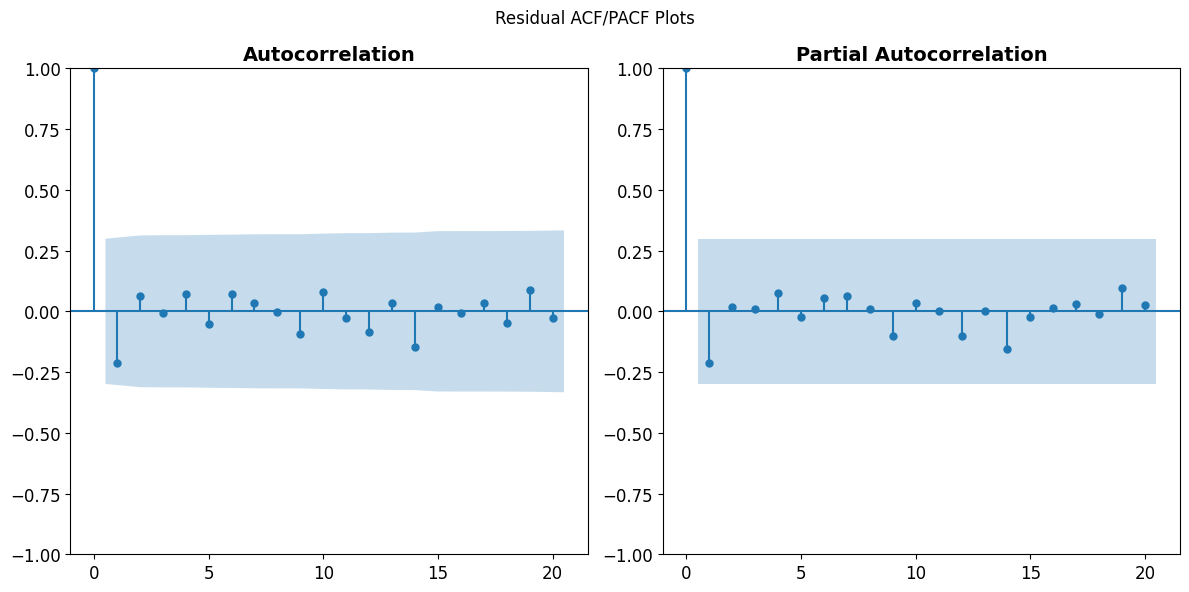


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 0.0051 - pss: 0.0200 - val_loss: 0.0005 - val_pss: 0.0226
Epoch 2/1000
1/1 [==============================] - loss: 0.0049 - pss: 0.0223 - val_loss: 0.0005 - val_pss: 0.0254
Epoch 3/1000
1/1 [==============================] - loss: 0.0049 - pss: 0.0222 - val_loss: 0.0005 - val_pss: 0.0255
Epoch 4/1000
1/1 [==============================] - loss: 0.0049 - pss: 0.0220 - val_loss: 0.0006 - val_pss: 0.0254
Epoch 5/1000
1/1 [==============================] - loss: 0.0049 - pss: 0.0219 - val_loss: 0.0006 - val_pss: 0.0253
Epoch 6/1000
1/1 [==============================] - loss: 0.0049 - pss: 0.0219 - val_loss: 0.0006 - val_pss: 0.0253
Early stopping triggered after 6 epochs.

Best Metrics: loss: 0.0049 - pss: 0.0219 - val_loss: 0.0006 - val_pss: 0.0253
 1/1 [==============================] 100.0%   - ETA: 0.00s

Optimized Hybrid Model Performance (d=2):
Me

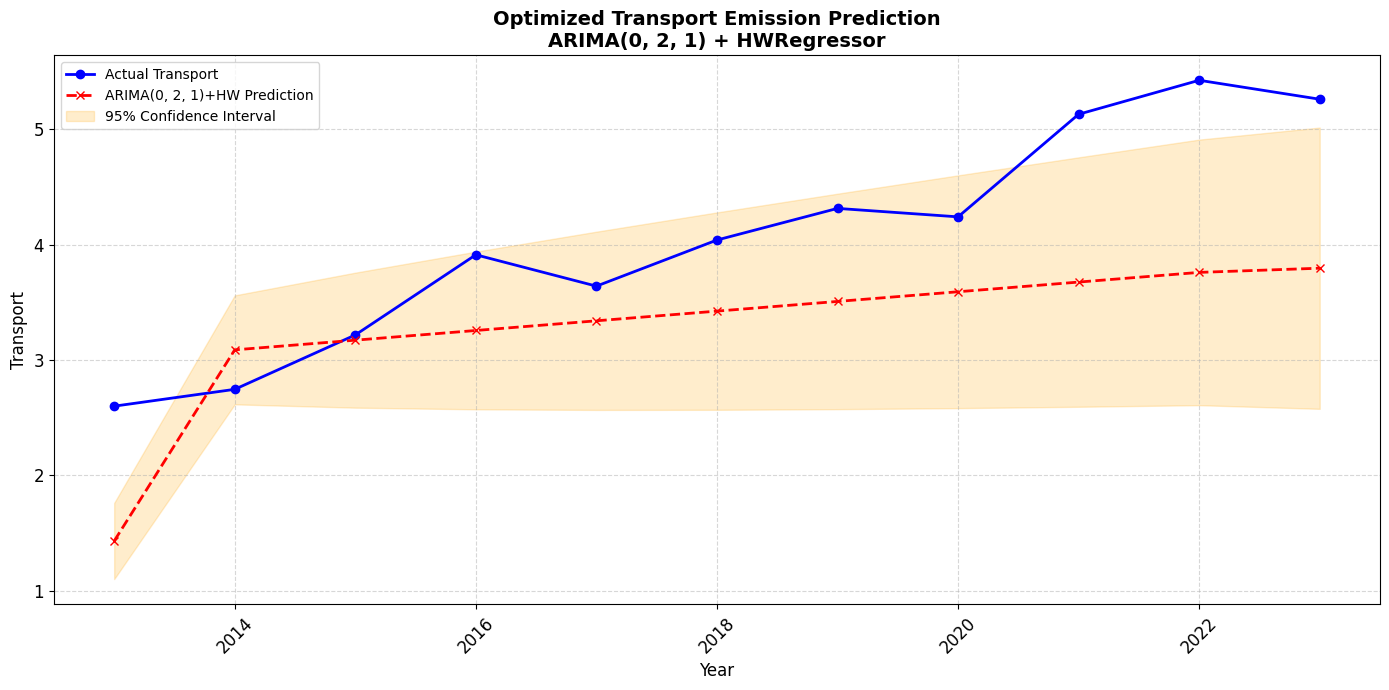


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 16.826
p-value: 0.078
Conclusion: Residuals show no significant autocorrelation (good fit)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['transport', 'e_power', 'forest'])  # Changed to 'transport'
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes with 'transport' as target
y = df_clean['transport'].values.reshape(-1, 1)  # Changed to 'transport'
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ARIMA Grid Search Function with fixed d=2 (changed from d=1)
def find_best_arima(y_train, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=2) including Ljung-Box test"""
    best_aic = np.inf
    best_order = None
    best_model = None
    best_ljungbox = None
    
    # Generate all combinations with d=2
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue
            
        try:
            model = ARIMA(y_train.ravel(), order=(p,2,q))  # Changed to d=2
            results = model.fit()
            current_aic = results.aic
            
            # Ljung-Box test
            lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
            lb_pvalue = lb_test['lb_pvalue'].values[0]
            
            print(f"ARIMA({p},2,{q}) - AIC: {current_aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
            
            if current_aic < best_aic and lb_pvalue > 0.05:
                best_aic = current_aic
                best_order = (p, 2, q)  # Changed to d=2
                best_model = results
                best_ljungbox = lb_pvalue
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},2,{q}): {str(e)}")
            continue
    
    if best_order is None:
        print("Warning: No model passed Ljung-Box test, using best AIC regardless")
        for p, q in product(range(max_p+1), range(max_q+1)):
            if p == 0 and q == 0:
                continue
            try:
                model = ARIMA(y_train.ravel(), order=(p,2,q))  # Changed to d=2
                results = model.fit()
                current_aic = results.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 2, q)  # Changed to d=2
                    best_model = results
            except:
                continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    if best_ljungbox is not None:
        print(f"Ljung-Box p-value: {best_ljungbox:.3f} (residuals show no autocorrelation)")
    else:
        print("Warning: Selected model may have autocorrelated residuals")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=2
print("\nPerforming ARIMA grid search with d=2 and Ljung-Box test...")
best_order, arima_fit = find_best_arima(y_train)

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(y_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(y_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('Residual ACF/PACF Plots')
plt.tight_layout()
plt.show()

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = y_train - arima_train_pred

hw_regressor = HWRegressor(
    p=1,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.030,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
y_test = y_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((y_test - final_test_pred) / y_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(y_test, final_test_pred)
mae = mean_absolute_error(y_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nOptimized Hybrid Model Performance (d=2):")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual Transport', marker='o', color='blue', linewidth=2)  # Changed label
plt.plot(dates_test, final_test_pred, label=f'ARIMA{best_order}+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Confidence intervals
conf_int = arima_fit.get_forecast(steps=len(y_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Optimized Transport Emission Prediction\nARIMA{best_order} + HWRegressor', fontsize=14)  # Changed title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Transport', fontsize=12)  # Changed y-label
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('transport_forecast_optimized_d2.png', dpi=300, bbox_inches='tight')  # Changed filename
plt.show()

# Final Ljung-Box test
final_residuals = y_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")


Data shape after cleaning: (54, 18)

Fitting ARIMA(2,2,0) model...
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   43
Model:                 ARIMA(2, 2, 0)   Log Likelihood                  12.766
Date:                Tue, 17 Jun 2025   AIC                            -19.532
Time:                        17:35:39   BIC                            -14.391
Sample:                             0   HQIC                           -17.660
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7680      0.199     -3.867      0.000      -1.157      -0.379
ar.L2         -0.3864      0.244     -1.584      0.113      -0.

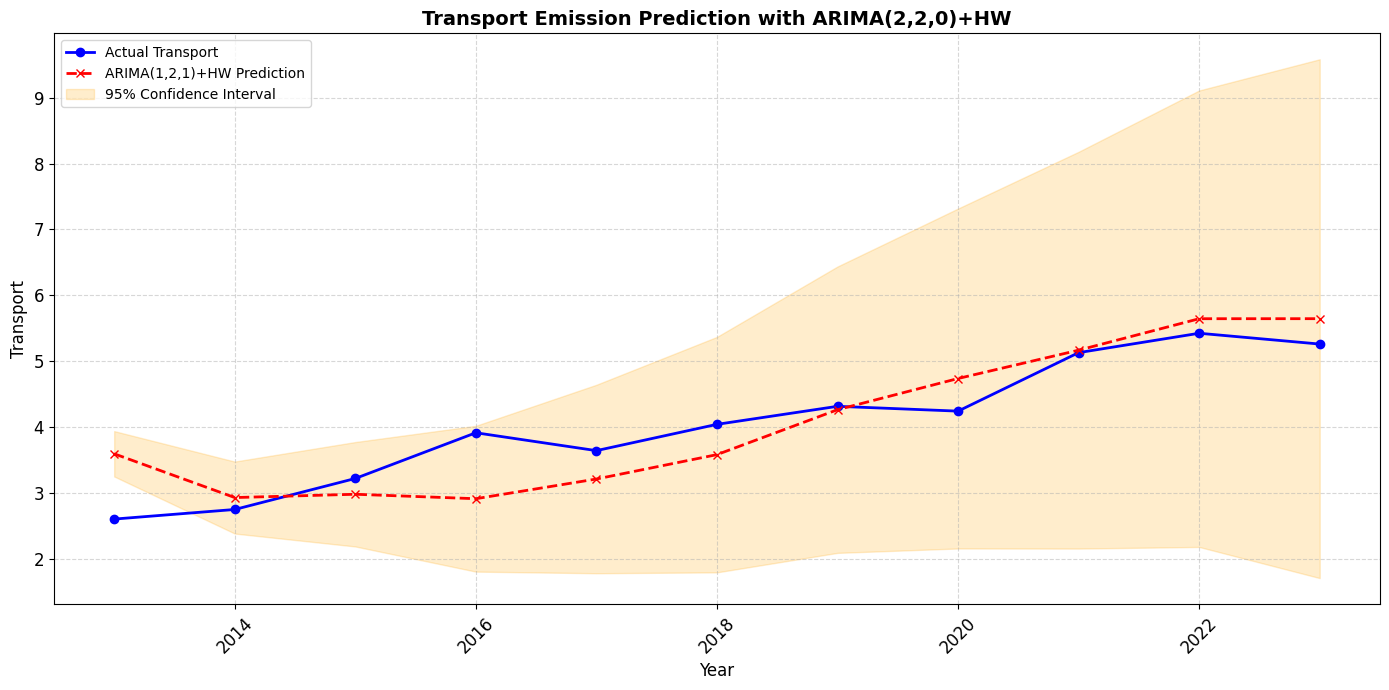

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['transport', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Prepare arrays with 'transport' as target
y = df_clean['transport'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Fit ARIMA(2,2,0) directly (no grid search)
print("\nFitting ARIMA(2,2,0) model...")
arima_model = ARIMA(y_train.ravel(), order=(2,2,0))
arima_fit = arima_model.fit()

# Print model summary
print(arima_fit.summary())

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(y_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(y_test)).reshape(-1, 1)

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = y_train - arima_train_pred

hw_regressor = HWRegressor(
    p=21,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.03,
    batch_size=64,
    max_iter=1000,
    tol=1e-6,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
y_test = y_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((y_test - final_test_pred) / y_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(y_test, final_test_pred)
mae = mean_absolute_error(y_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nHybrid ARIMA(1,2,1)+HW Model Performance:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual Transport', marker='o', color='blue', linewidth=2)
plt.plot(dates_test, final_test_pred, label='ARIMA(1,2,1)+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Confidence intervals
conf_int = arima_fit.get_forecast(steps=len(y_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('Transport Emission Prediction with ARIMA(2,2,0)+HW', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Transport', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('transport_arima121_forecast.png', dpi=300, bbox_inches='tight')
plt.show()


Data shape after cleaning: (54, 18)

Fitting ARIMA(2,2,0) model on full dataset...
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:                 ARIMA(2, 2, 0)   Log Likelihood                   5.844
Date:                Tue, 17 Jun 2025   AIC                             -5.689
Time:                        17:35:43   BIC                              0.165
Sample:                             0   HQIC                            -3.445
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8820      0.112     -7.870      0.000      -1.102      -0.662
ar.L2         -0.6869      0.109     -6.286    

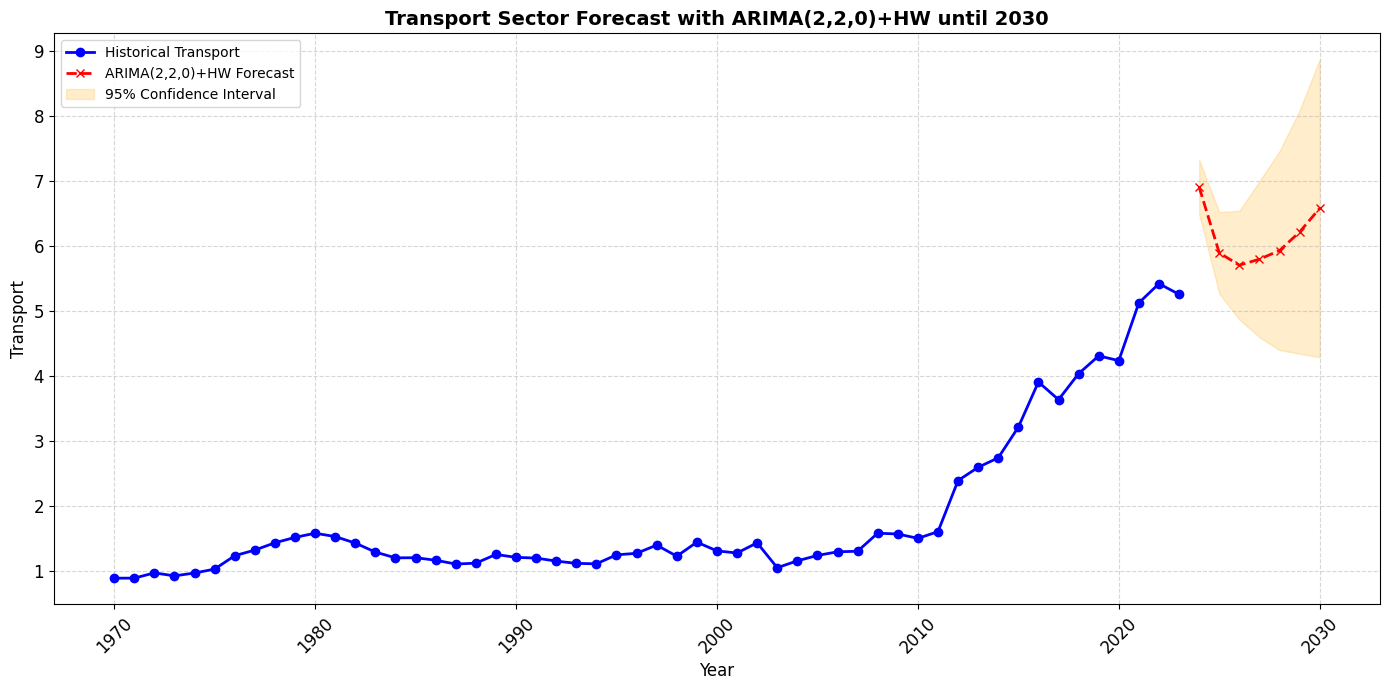


Forecasted values until 2030:
    Date  Transport      Type
54  2024   6.906581  Forecast
55  2025   5.896020  Forecast
56  2026   5.706419  Forecast
57  2027   5.798812  Forecast
58  2028   5.931139  Forecast
59  2029   6.216689  Forecast
60  2030   6.581751  Forecast


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['transport', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Prepare arrays with 'transport' as target
y = df_clean['transport'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Fit ARIMA(2,2,0) on full data
print("\nFitting ARIMA(2,2,0) model on full dataset...")
arima_model = ARIMA(y.ravel(), order=(2,2,0))
arima_fit = arima_model.fit()

# Print model summary
print(arima_fit.summary())

# Get ARIMA predictions for historical data
arima_hist_pred = arima_fit.predict(start=1, end=len(y), typ='levels').reshape(-1, 1)

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals = y - arima_hist_pred

hw_regressor = HWRegressor(
    p=21,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.03,
    batch_size=64,
    max_iter=1000,
    tol=1e-6,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_scaled, residuals.ravel())

# Create future dates until 2030
last_date = df_clean.index[-1]
if isinstance(last_date, pd.Timestamp):
    # For yearly data, we'll create annual periods
    freq = pd.infer_freq(df_clean.index)
    future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), 
                                end='2030-12-31', 
                                freq=freq or 'YS')
else:
    # If index is just years as integers
    future_years = range(int(last_date) + 1, 2031)
    future_dates = np.array(future_years)

all_dates = np.concatenate([dates, future_dates])

# Prepare future exogenous variables
# Using last available values repeated - replace with actual forecasts if available
X_future = np.tile(X[-1], (len(future_dates), 1))
X_all = np.vstack([X, X_future])
X_all_scaled = scaler_X.transform(X_all)

# Generate forecasts
forecast_steps = len(future_dates)
arima_forecast = arima_fit.forecast(steps=forecast_steps).reshape(-1, 1)

# Predict residuals for future
residuals_forecast = hw_regressor.predict(X_all_scaled[-forecast_steps:]).reshape(-1, 1)

# Combine predictions
final_forecast = arima_forecast + residuals_forecast

# Combine historical and forecasted values
historical_values = y.ravel()
forecasted_values = final_forecast.ravel()
all_values = np.concatenate([historical_values, forecasted_values])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(all_dates[:len(historical_values)], historical_values, 
         label='Historical Transport', marker='o', color='blue', linewidth=2)
plt.plot(all_dates[len(historical_values):], forecasted_values, 
         label='ARIMA(2,2,0)+HW Forecast', marker='x', color='red', linestyle='--', linewidth=2)

# Confidence intervals for ARIMA
conf_int = arima_fit.get_forecast(steps=forecast_steps).conf_int()
plt.fill_between(all_dates[len(historical_values):], 
                 conf_int[:, 0] + residuals_forecast.flatten(),
                 conf_int[:, 1] + residuals_forecast.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('Transport Sector Forecast with ARIMA(2,2,0)+HW until 2030', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Transport', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('transport_arima220_forecast_2030.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a DataFrame with the forecasts
forecast_df = pd.DataFrame({
    'Date': all_dates,
    'Transport': all_values,
    'Type': ['Historical'] * len(historical_values) + ['Forecast'] * len(forecasted_values)
})

print("\nForecasted values until 2030:")
print(forecast_df.tail(len(future_dates)))


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=1 and Ljung-Box test...
ARIMA(0,1,1) - AIC: 13.56 - Ljung-Box p-value: 0.332
ARIMA(0,1,2) - AIC: 15.56 - Ljung-Box p-value: 0.327
ARIMA(0,1,3) - AIC: 15.49 - Ljung-Box p-value: 0.563
ARIMA(1,1,0) - AIC: 13.52 - Ljung-Box p-value: 0.324
ARIMA(1,1,1) - AIC: 15.06 - Ljung-Box p-value: 0.357
ARIMA(1,1,2) - AIC: 17.00 - Ljung-Box p-value: 0.363
ARIMA(1,1,3) - AIC: 17.26 - Ljung-Box p-value: 0.591
ARIMA(2,1,0) - AIC: 15.42 - Ljung-Box p-value: 0.311
ARIMA(2,1,1) - AIC: 17.03 - Ljung-Box p-value: 0.360
ARIMA(2,1,2) - AIC: 18.90 - Ljung-Box p-value: 0.397
ARIMA(2,1,3) - AIC: 17.00 - Ljung-Box p-value: 0.775
ARIMA(3,1,0) - AIC: 15.67 - Ljung-Box p-value: 0.618
ARIMA(3,1,1) - AIC: 17.64 - Ljung-Box p-value: 0.611
ARIMA(3,1,2) - AIC: 16.99 - Ljung-Box p-value: 0.743
ARIMA(3,1,3) - AIC: 18.99 - Ljung-Box p-value: 0.746

Selected ARIMA order: (1, 1, 0)
AIC: 13.52
Ljung-Box p-value: 0.324 (residuals show no autocorrelation)


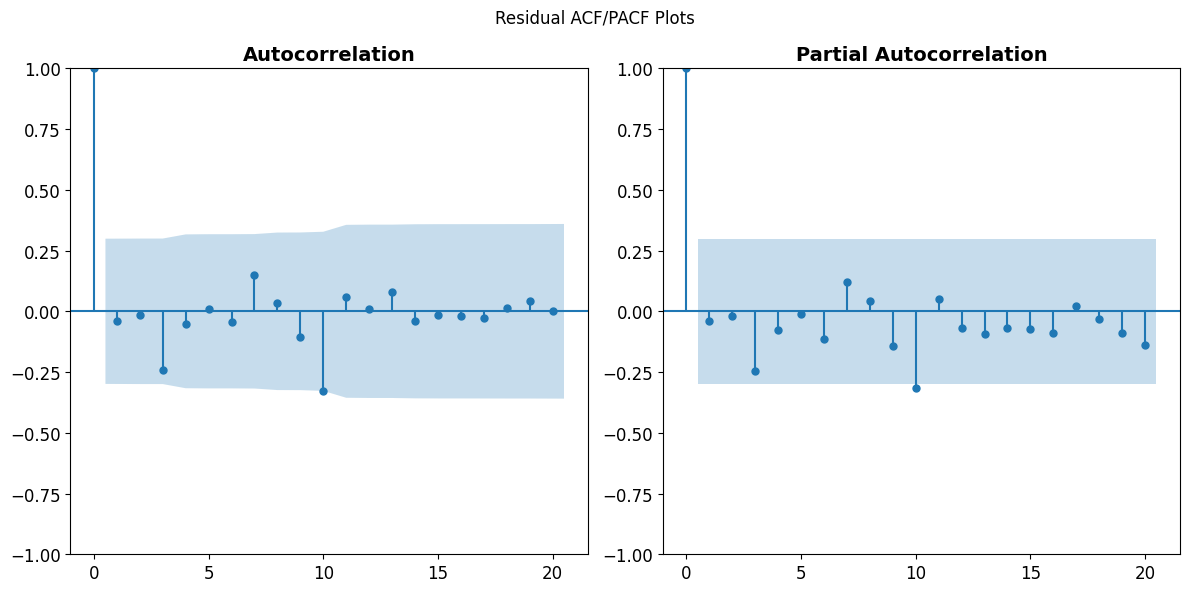


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 0.0460 - pss: 0.2276 - val_loss: 0.0125 - val_pss: 0.1438
Epoch 2/1000
1/1 [==============================] - loss: 0.0567 - pss: 0.2359 - val_loss: 0.0340 - val_pss: 0.2365
Epoch 3/1000
1/1 [==============================] - loss: 0.3201 - pss: 0.6819 - val_loss: 0.1028 - val_pss: 0.3265
Epoch 4/1000
1/1 [==============================] - loss: 0.3503 - pss: 0.6319 - val_loss: 0.1792 - val_pss: 0.4828
Epoch 5/1000
1/1 [==============================] - loss: 0.2169 - pss: 0.5536 - val_loss: 0.1109 - val_pss: 0.3989
Epoch 6/1000
1/1 [==============================] - loss: 0.3913 - pss: 0.7300 - val_loss: 0.2124 - val_pss: 0.4431
Early stopping triggered after 6 epochs.

Best Metrics: loss: 0.3913 - pss: 0.7300 - val_loss: 0.2124 - val_pss: 0.4431
 1/1 [==============================] 100.0%   - ETA: 0.01s

Optimized Hybrid Model Performance (d=1):
Me

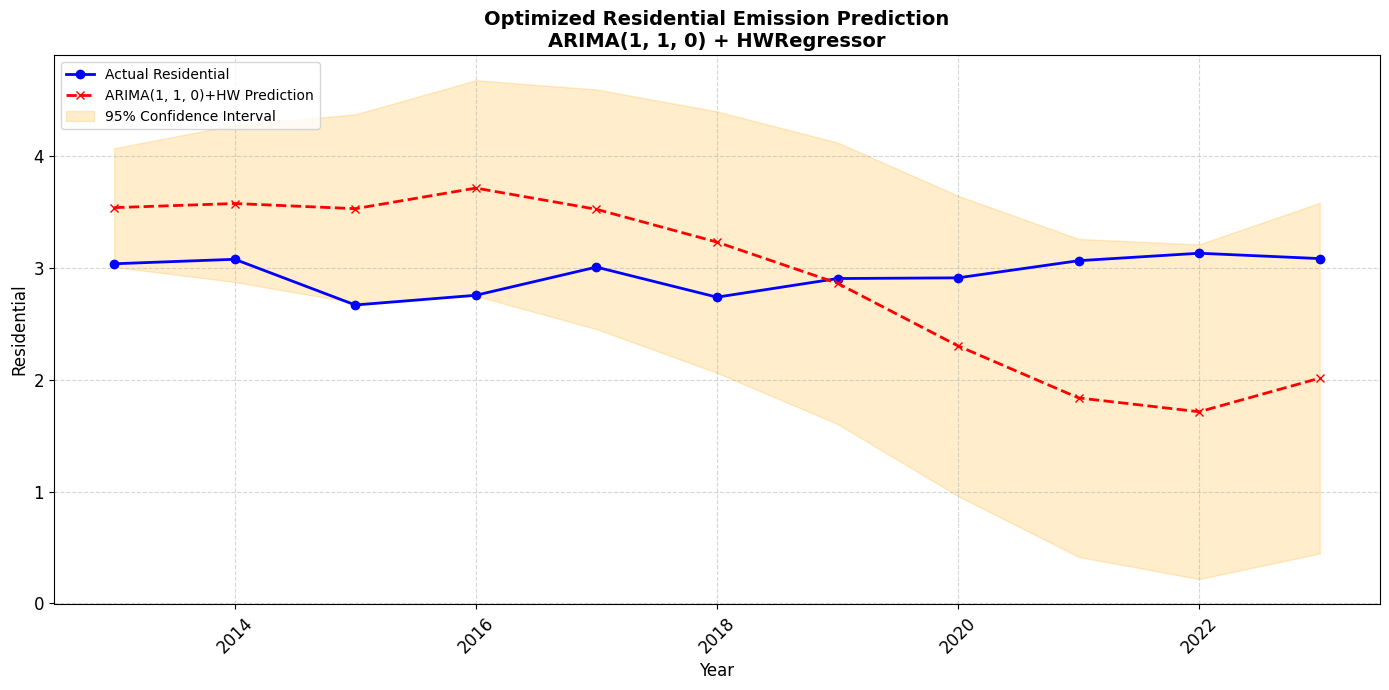


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 36.228
p-value: 0.000


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


df_clean = df.dropna(subset=['residential', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes
y = df_clean['residential'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values  # Get the index values (years)

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ARIMA Grid Search Function with fixed d=1 and Ljung-Box test
def find_best_arima(y_train, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=1) including Ljung-Box test"""
    best_aic = np.inf
    best_order = None
    best_model = None
    best_ljungbox = None
    
    # Generate all possible combinations of p and q with d=1
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue  # Skip (0,1,0) as it's just differencing
            
        try:
            model = ARIMA(y_train.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            # Perform Ljung-Box test on residuals
            lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
            lb_pvalue = lb_test['lb_pvalue'].values[0]
            
            print(f"ARIMA({p},1,{q}) - AIC: {current_aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
            
            # Prefer models where residuals show no autocorrelation (p-value > 0.05)
            if current_aic < best_aic and lb_pvalue > 0.05:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                best_ljungbox = lb_pvalue
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},1,{q}): {str(e)}")
            continue
    
    if best_order is None:
        print("Warning: No model passed Ljung-Box test (p-value > 0.05), using best AIC regardless")
        # Fallback to best AIC without Ljung-Box constraint
        for p, q in product(range(max_p+1), range(max_q+1)):
            if p == 0 and q == 0:
                continue
            try:
                model = ARIMA(y_train.ravel(), order=(p,1,q))
                results = model.fit()
                current_aic = results.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 1, q)
                    best_model = results
            except:
                continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    if best_ljungbox is not None:
        print(f"Ljung-Box p-value: {best_ljungbox:.3f} (residuals show no autocorrelation)")
    else:
        print("Warning: Selected model may have autocorrelated residuals")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=1
print("\nPerforming ARIMA grid search with d=1 and Ljung-Box test...")
best_order, arima_fit = find_best_arima(y_train)

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(y_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(y_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals to check model adequacy
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('Residual ACF/PACF Plots')
plt.tight_layout()
plt.show()

# 2. HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = y_train - arima_train_pred

hw_regressor = HWRegressor(
    p=25,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.06,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
y_test = y_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((y_test - final_test_pred) / y_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]  # Remove infinite values
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(y_test, final_test_pred)
mae = mean_absolute_error(y_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nOptimized Hybrid Model Performance (d=1):")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual Residential', marker='o', color='blue', linewidth=2)
plt.plot(dates_test, final_test_pred, label=f'ARIMA{best_order}+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Add confidence intervals
conf_int = arima_fit.get_forecast(steps=len(y_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Optimized Residential Emission Prediction\nARIMA{best_order} + HWRegressor', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Residential', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('residential_essai_optimized_d1_ljungbox.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform final Ljung-Box test on complete model residuals
final_residuals = y_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")


Data shape after cleaning: (54, 18)

Fitting ARIMA(1,1,1) model...
ARIMA(1,1,1) Results:
AIC: 15.06
Ljung-Box p-value: 0.357
Residuals show no significant autocorrelation (good fit)


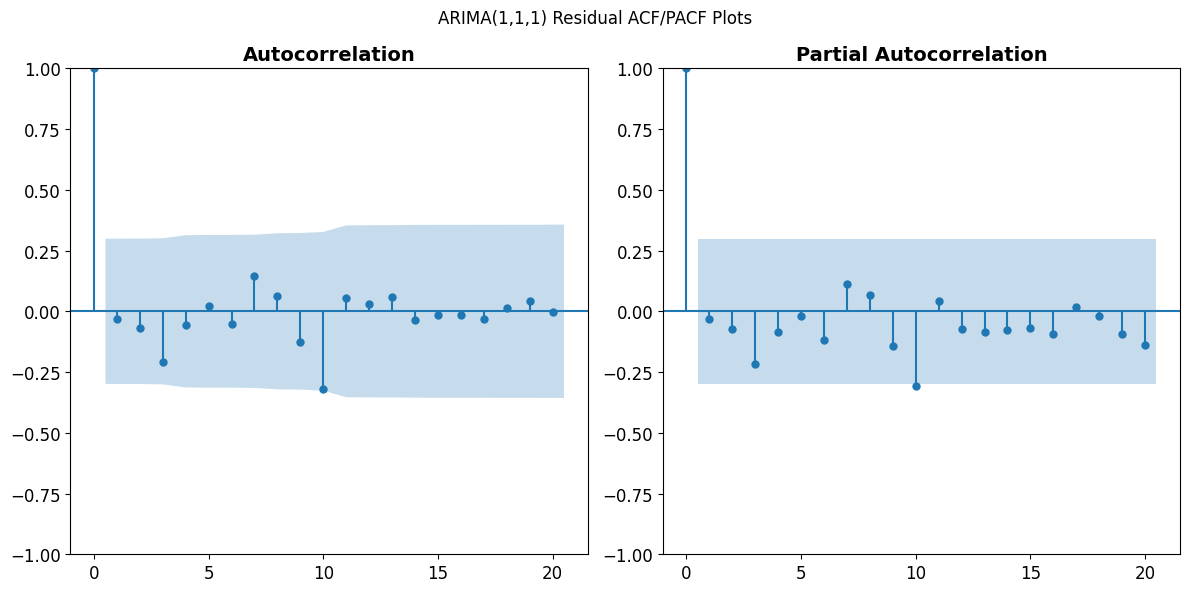


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 0.0046 - pss: 0.0704 - val_loss: 0.0082 - val_pss: 0.0540
Epoch 2/1000
1/1 [==============================] - loss: 0.0044 - pss: 0.0734 - val_loss: 0.0087 - val_pss: 0.0619
Epoch 3/1000
1/1 [==============================] - loss: 0.0043 - pss: 0.0752 - val_loss: 0.0095 - val_pss: 0.0674
Epoch 4/1000
1/1 [==============================] - loss: 0.0041 - pss: 0.0764 - val_loss: 0.0100 - val_pss: 0.0716
Epoch 5/1000
1/1 [==============================] - loss: 0.0039 - pss: 0.0774 - val_loss: 0.0104 - val_pss: 0.0756
Epoch 6/1000
1/1 [==============================] - loss: 0.0038 - pss: 0.0777 - val_loss: 0.0105 - val_pss: 0.0794
Early stopping triggered after 6 epochs.

Best Metrics: loss: 0.0038 - pss: 0.0777 - val_loss: 0.0105 - val_pss: 0.0794
 1/1 [==============================] 100.0%   - ETA: 0.00s

ARIMA(1,1,1) + HWRegressor Performance:
Mean

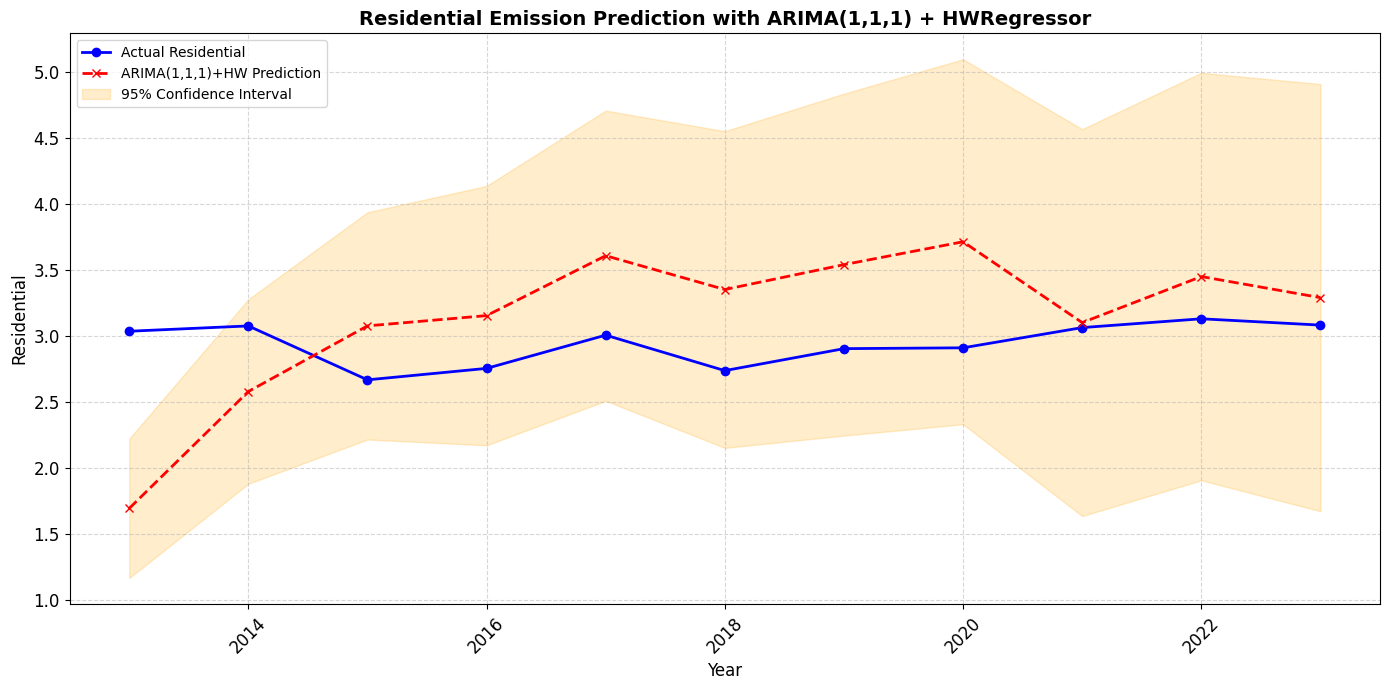


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 8.088
p-value: 0.620
Conclusion: Residuals show no significant autocorrelation (good fit)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

df_clean = df.dropna(subset=['residential', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes
y = df_clean['residential'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values  # Get the index values (years)

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Fit ARIMA(1,1,1) model
print("\nFitting ARIMA(1,1,1) model...")
arima_model = ARIMA(y_train.ravel(), order=(1,1,1))
arima_fit = arima_model.fit()

# Perform Ljung-Box test on residuals
lb_test = acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
lb_pvalue = lb_test['lb_pvalue'].values[0]

print(f"ARIMA(1,1,1) Results:")
print(f"AIC: {arima_fit.aic:.2f}")
print(f"Ljung-Box p-value: {lb_pvalue:.3f}")
if lb_pvalue > 0.05:
    print("Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation")

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(y_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(y_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals to check model adequacy
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('ARIMA(1,1,1) Residual ACF/PACF Plots')
plt.tight_layout()
plt.show()

# 2. HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = y_train - arima_train_pred

hw_regressor = HWRegressor(
    p=15,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.05,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
y_test = y_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((y_test - final_test_pred) / y_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]  # Remove infinite values
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(y_test, final_test_pred)
mae = mean_absolute_error(y_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nARIMA(1,1,1) + HWRegressor Performance:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual Residential', marker='o', color='blue', linewidth=2)
plt.plot(dates_test, final_test_pred, label='ARIMA(1,1,1)+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Add confidence intervals
conf_int = arima_fit.get_forecast(steps=len(y_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('Residential Emission Prediction with ARIMA(1,1,1) + HWRegressor', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Residential', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('residential_arima111_hw.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform final Ljung-Box test on complete model residuals
final_residuals = y_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")


Data shape after cleaning: (54, 18)

Fitting ARIMA(1,1,1) model on full dataset...

Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 0.0013 - pss: 0.0162 - val_loss: 0.0005 - val_pss: 0.0203
Epoch 2/1000
1/1 [==============================] - loss: 0.0014 - pss: 0.0217 - val_loss: 0.0008 - val_pss: 0.0269
Epoch 3/1000
1/1 [==============================] - loss: 0.0015 - pss: 0.0250 - val_loss: 0.0011 - val_pss: 0.0313
Epoch 4/1000
1/1 [==============================] - loss: 0.0015 - pss: 0.0273 - val_loss: 0.0013 - val_pss: 0.0344
Epoch 5/1000
1/1 [==============================] - loss: 0.0016 - pss: 0.0293 - val_loss: 0.0014 - val_pss: 0.0365
Epoch 6/1000
1/1 [==============================] - loss: 0.0016 - pss: 0.0308 - val_loss: 0.0016 - val_pss: 0.0379
Early stopping triggered after 6 epochs.

Best Metrics: loss: 0.0016 - pss: 0.0308 - val_loss: 0.0016 - val_pss: 0.0379
 1/1 [===============

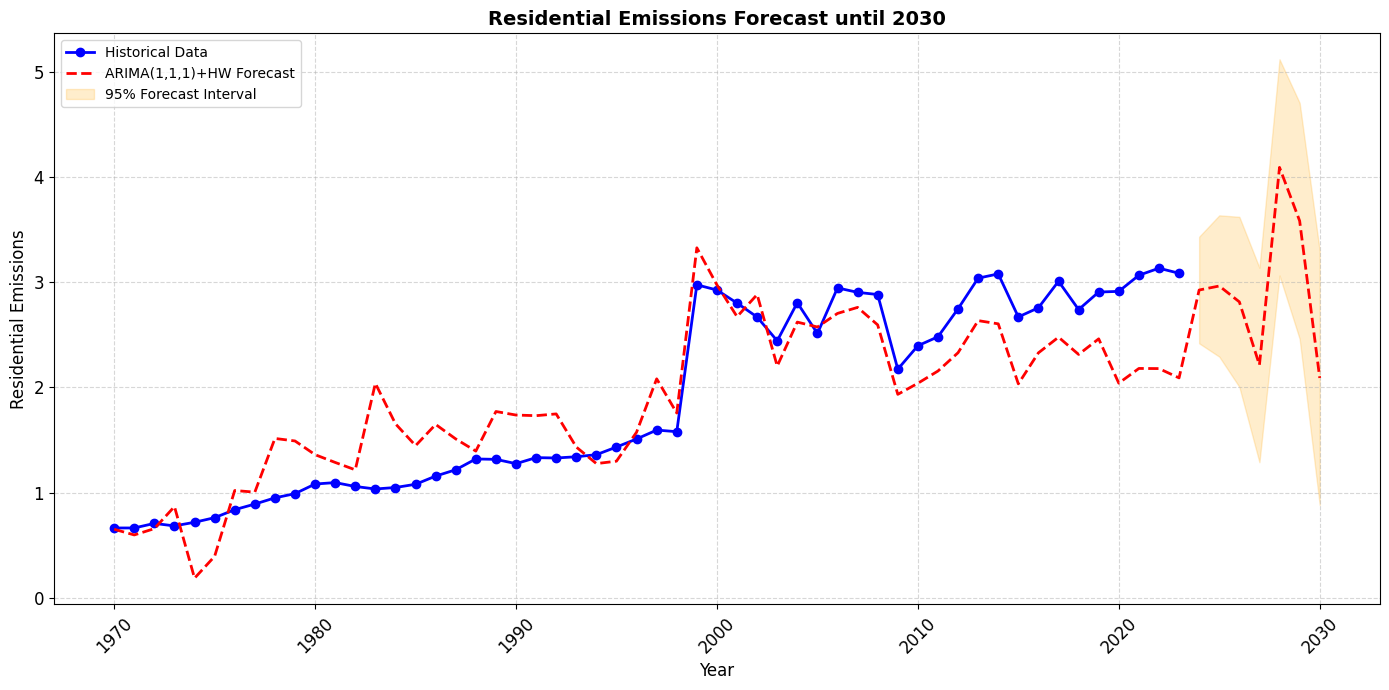


Forecast values:
            actual  predicted  is_forecast
2019-01-01  2.9057   2.461153        False
2020-01-01  2.9120   2.040291        False
2021-01-01  3.0653   2.179988        False
2022-01-01  3.1320   2.178825        False
2023-01-01  3.0841   2.090335        False
2024-01-01     NaN   2.924822         True
2025-01-01     NaN   2.963142         True
2026-01-01     NaN   2.812293         True
2027-01-01     NaN   2.212954         True
2028-01-01     NaN   4.089602         True
2029-01-01     NaN   3.581529         True
2030-01-01     NaN   2.089602         True


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load and prepare data
df_clean = df.dropna(subset=['residential', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the index is proper datetime and sort
df_clean.index = pd.to_datetime(df_clean.index, format='%Y')  # Convert index to datetime
df_clean = df_clean.sort_index()

# Prepare full dataset
y = df_clean['residential'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index  # Now properly a DatetimeIndex

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Fit ARIMA(1,1,1) model on full data
print("\nFitting ARIMA(1,1,1) model on full dataset...")
arima_model = ARIMA(y.ravel(), order=(1,1,1))
arima_fit = arima_model.fit()

# Get ARIMA fitted values
arima_full_pred = arima_fit.predict(start=1, end=len(y), typ='levels').reshape(-1, 1)

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals = y - arima_full_pred

hw_regressor = HWRegressor(
    p=15,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.05,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on full residuals
hw_regressor.fit(X_scaled, residuals.ravel())

# Create future dates until 2030
last_date = dates[-1]
future_dates = pd.date_range(
    start=last_date + pd.DateOffset(years=1),
    end='2030-12-31',
    freq='YS'  # Year-start frequency
)

# Combine historical and future dates
all_dates = dates.union(future_dates)

# Prepare future exogenous variables (using last available values as placeholder)
future_X = np.tile(X[-1], (len(future_dates), 1))
X_all = np.vstack([X, future_X])
X_all_scaled = scaler_X.transform(X_all)

# Generate forecasts
forecast_steps = len(future_dates)
arima_forecast = arima_fit.forecast(steps=forecast_steps).reshape(-1, 1)
residuals_forecast = hw_regressor.predict(X_all_scaled[-forecast_steps:]).reshape(-1, 1)
final_forecast = arima_forecast + residuals_forecast

# Combine historical and forecasted values
historical_pred = arima_full_pred + hw_regressor.predict(X_scaled).reshape(-1, 1)
full_prediction = np.vstack([historical_pred, final_forecast])

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(dates, y, label='Historical Data', marker='o', color='blue', linewidth=2)
plt.plot(all_dates, full_prediction, label='ARIMA(1,1,1)+HW Forecast', 
         color='red', linestyle='--', linewidth=2)

# Add confidence intervals for forecast period
conf_int = arima_fit.get_forecast(steps=forecast_steps).conf_int()
plt.fill_between(future_dates, 
                 conf_int[:, 0] + residuals_forecast.flatten(),
                 conf_int[:, 1] + residuals_forecast.flatten(),
                 color='orange', alpha=0.2, label='95% Forecast Interval')

plt.title('Residential Emissions Forecast until 2030', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Residential Emissions', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('residential_forecast_2030.png', dpi=300, bbox_inches='tight')
plt.show()

# Create output dataframe with predictions
forecast_df = pd.DataFrame(
    index=all_dates,
    data={
        'actual': np.concatenate([y.ravel(), [np.nan] * forecast_steps]),
        'predicted': full_prediction.ravel(),
        'is_forecast': [False] * len(dates) + [True] * forecast_steps
    }
)

print("\nForecast values:")
print(forecast_df.tail(forecast_steps + 5))


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=2 and Ljung-Box test...
ARIMA(0,2,1) - AIC: -12.87 - Ljung-Box p-value: 0.857
ARIMA(0,2,2) - AIC: -11.93 - Ljung-Box p-value: 0.967
ARIMA(0,2,3) - AIC: -12.29 - Ljung-Box p-value: 0.919
ARIMA(1,2,0) - AIC: 5.06 - Ljung-Box p-value: 0.547
ARIMA(1,2,1) - AIC: -11.43 - Ljung-Box p-value: 0.930
ARIMA(1,2,2) - AIC: -10.93 - Ljung-Box p-value: 0.649
ARIMA(1,2,3) - AIC: -11.79 - Ljung-Box p-value: 0.808
ARIMA(2,2,0) - AIC: -3.16 - Ljung-Box p-value: 0.724
ARIMA(2,2,1) - AIC: -11.74 - Ljung-Box p-value: 0.915
ARIMA(2,2,2) - AIC: -10.75 - Ljung-Box p-value: 0.762
ARIMA(2,2,3) - AIC: -10.45 - Ljung-Box p-value: 0.804
ARIMA(3,2,0) - AIC: -5.56 - Ljung-Box p-value: 0.740
ARIMA(3,2,1) - AIC: -9.83 - Ljung-Box p-value: 0.921
ARIMA(3,2,2) - AIC: -8.33 - Ljung-Box p-value: 0.921
ARIMA(3,2,3) - AIC: -8.47 - Ljung-Box p-value: 0.806

Selected ARIMA order: (0, 2, 1)
AIC: -12.87
Ljung-Box p-value: 0.857 (residuals show no autocorrel

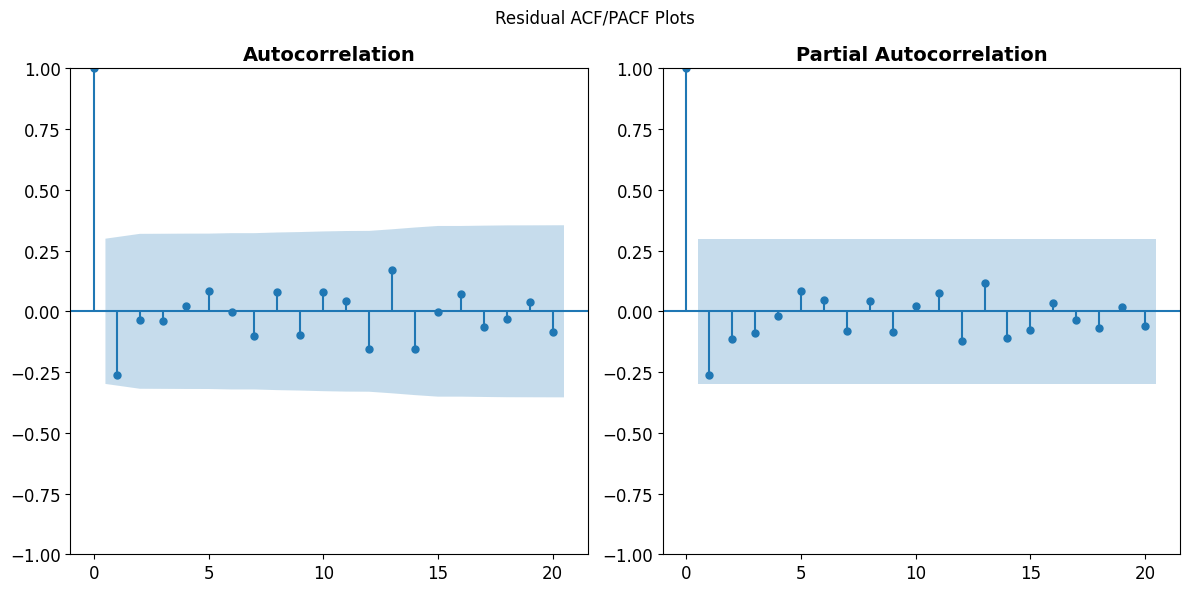


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 367260600.2207 - pss: 21416.4578 - val_loss: 663881261.2139 - val_pss: 26519.4266
Epoch 2/1000
1/1 [==============================] - loss: 220557109.8595 - pss: 14074.9018 - val_loss: 218959690.7772 - val_pss: 9675.6846
Epoch 3/1000
1/1 [==============================] - loss: 192698250.6007 - pss: 14116.7570 - val_loss: 177939344.8855 - val_pss: 9632.2618
Epoch 4/1000
1/1 [==============================] - loss: 216950050.0034 - pss: 14114.4361 - val_loss: 210528476.1766 - val_pss: 9633.4692
Epoch 5/1000
1/1 [==============================] - loss: 192762075.5328 - pss: 14114.5006 - val_loss: 178100045.9785 - val_pss: 9633.4360
Epoch 6/1000
1/1 [==============================] - loss: 216947492.3753 - pss: 14114.4990 - val_loss: 210522263.3960 - val_pss: 9633.4365
Epoch 7/1000
1/1 [==============================] - loss: 192762136.7606 - pss: 14114.

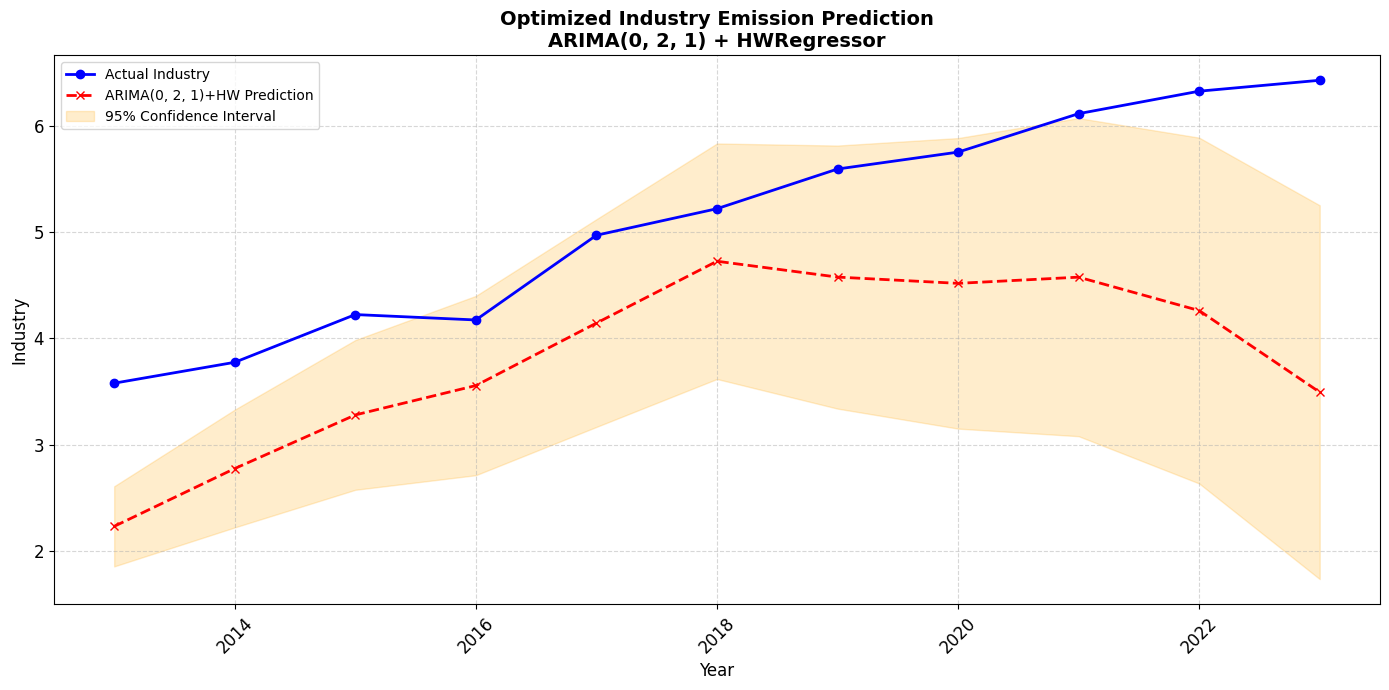


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 15.729
p-value: 0.108
Conclusion: Residuals show no significant autocorrelation (good fit)


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['industry', 'e_power', 'forest'])  # Changed to 'industry'
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes with 'industry' as target
y = df_clean['industry'].values.reshape(-1, 1)  # Changed to 'industry'
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ARIMA Grid Search Function with fixed d=2 (changed from d=1)
def find_best_arima(y_train, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=2) including Ljung-Box test"""
    best_aic = np.inf
    best_order = None
    best_model = None
    best_ljungbox = None
    
    # Generate all combinations with d=2
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue
            
        try:
            model = ARIMA(y_train.ravel(), order=(p,2,q))  # Changed to d=2
            results = model.fit()
            current_aic = results.aic
            
            # Ljung-Box test
            lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
            lb_pvalue = lb_test['lb_pvalue'].values[0]
            
            print(f"ARIMA({p},2,{q}) - AIC: {current_aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
            
            if current_aic < best_aic and lb_pvalue > 0.05:
                best_aic = current_aic
                best_order = (p, 2, q)  # Changed to d=2
                best_model = results
                best_ljungbox = lb_pvalue
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},2,{q}): {str(e)}")
            continue
    
    if best_order is None:
        print("Warning: No model passed Ljung-Box test, using best AIC regardless")
        for p, q in product(range(max_p+1), range(max_q+1)):
            if p == 0 and q == 0:
                continue
            try:
                model = ARIMA(y_train.ravel(), order=(p,2,q))  # Changed to d=2
                results = model.fit()
                current_aic = results.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 2, q)  # Changed to d=2
                    best_model = results
            except:
                continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    if best_ljungbox is not None:
        print(f"Ljung-Box p-value: {best_ljungbox:.3f} (residuals show no autocorrelation)")
    else:
        print("Warning: Selected model may have autocorrelated residuals")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=2
print("\nPerforming ARIMA grid search with d=2 and Ljung-Box test...")
best_order, arima_fit = find_best_arima(y_train)

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(y_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(y_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('Residual ACF/PACF Plots')
plt.tight_layout()
plt.show()

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = y_train - arima_train_pred

hw_regressor = HWRegressor(
    p=2000,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=1000,
    batch_size=64,
    max_iter=1000,
    tol=1e-100,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
y_test = y_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((y_test - final_test_pred) / y_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(y_test, final_test_pred)
mae = mean_absolute_error(y_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nOptimized Hybrid Model Performance (d=2):")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual Industry', marker='o', color='blue', linewidth=2)  # Changed label
plt.plot(dates_test, final_test_pred, label=f'ARIMA{best_order}+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Confidence intervals
conf_int = arima_fit.get_forecast(steps=len(y_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Optimized Industry Emission Prediction\nARIMA{best_order} + HWRegressor', fontsize=14)  # Changed title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Industry', fontsize=12)  # Changed y-label
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('industry_forecast_optimized_d2.png', dpi=300, bbox_inches='tight')  # Changed filename
plt.show()

# Final Ljung-Box test
final_residuals = y_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")


Data shape after cleaning: (54, 18)

Fixing ARIMA parameters to (3,2,2)...
ARIMA(3,2,2) - AIC: -8.33 - Ljung-Box p-value: 0.921
Model residuals show no significant autocorrelation (good fit)


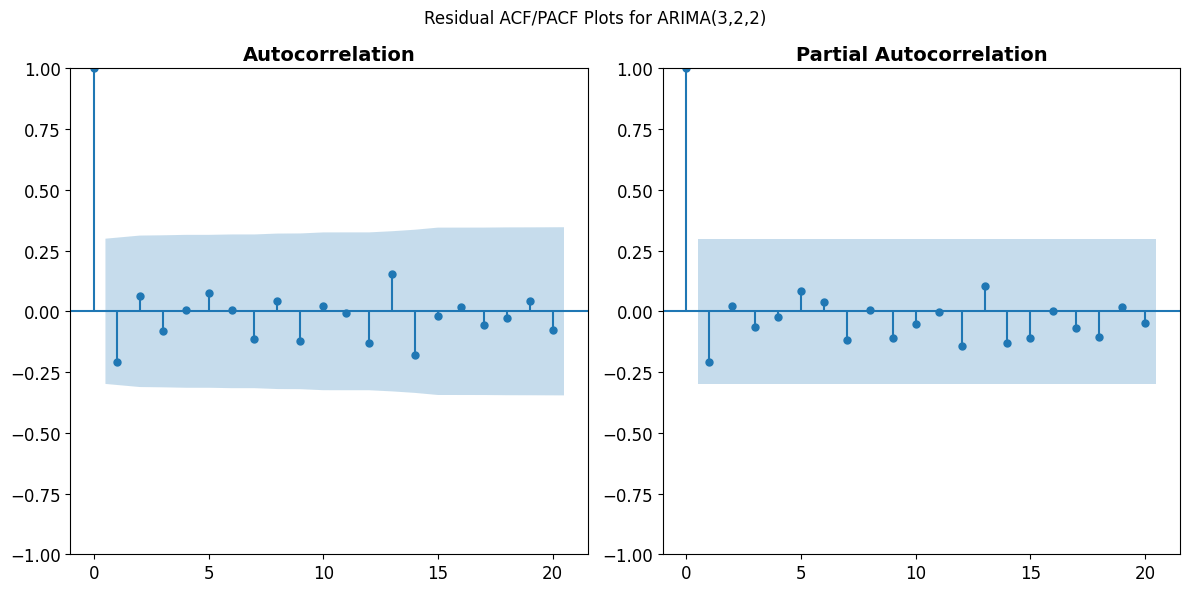


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 1861554850.2044 - pss: 33509.1388 - val_loss: 2206554954.9405 - val_pss: 56445.1164
Epoch 2/1000
1/1 [==============================] - loss: 1634759253.3860 - pss: 32785.9442 - val_loss: 2035015222.4600 - val_pss: 54019.0146
Epoch 3/1000
1/1 [==============================] - loss: 2083221059.9707 - pss: 36479.9523 - val_loss: 2539575364.4609 - val_pss: 63713.3608
Epoch 4/1000
1/1 [==============================] - loss: 1634004434.4253 - pss: 32775.0998 - val_loss: 2035176735.9710 - val_pss: 54029.1870
Epoch 5/1000
1/1 [==============================] - loss: 2083221377.6228 - pss: 36479.9495 - val_loss: 2539575143.3143 - val_pss: 63713.3553
Epoch 6/1000
1/1 [==============================] - loss: 1634004434.4253 - pss: 32775.0998 - val_loss: 2035176735.9710 - val_pss: 54029.1870
Epoch 7/1000
1/1 [==============================] - loss: 2083221377.

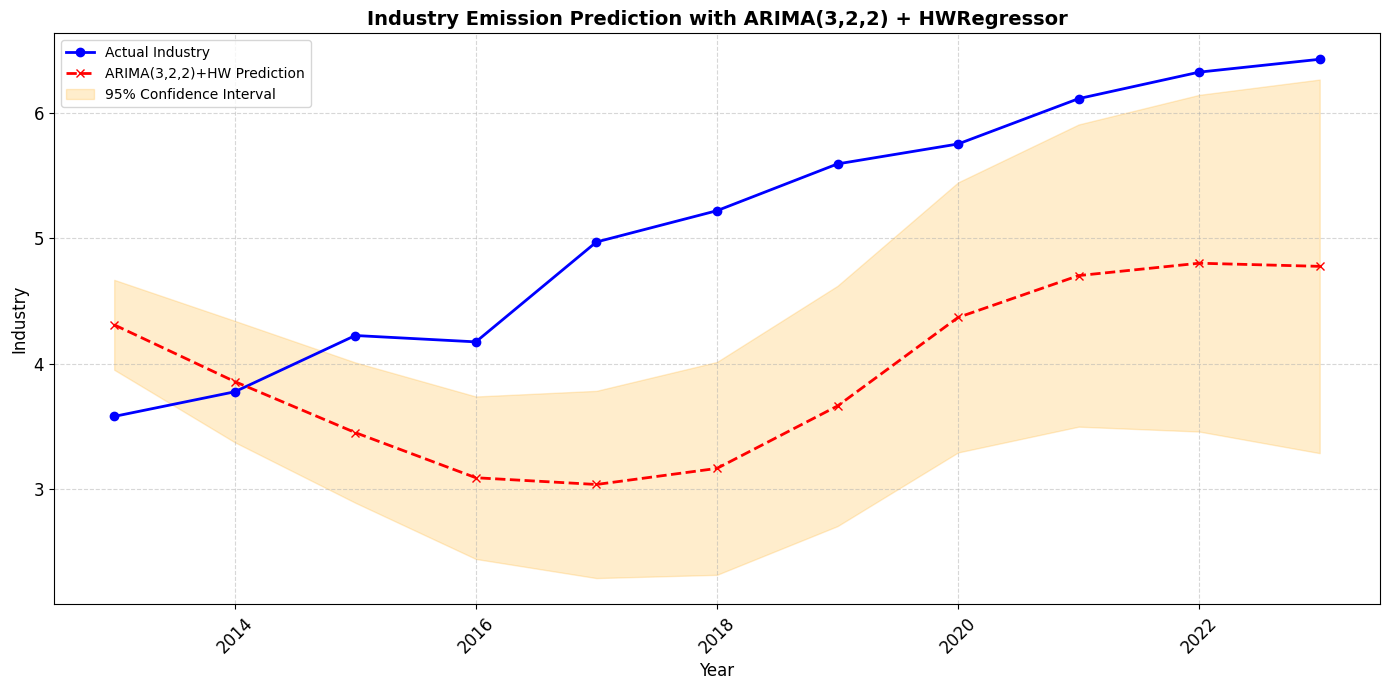


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 15.230
p-value: 0.124
Conclusion: Residuals show no significant autocorrelation (good fit)


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['industry', 'e_power', 'forest'])  # Changed to 'industry'
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes with 'industry' as target
y = df_clean['industry'].values.reshape(-1, 1)  # Changed to 'industry'
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Fit ARIMA(3,2,2) model directly
print("\nFixing ARIMA parameters to (3,2,2)...")
try:
    arima_model = ARIMA(y_train.ravel(), order=(3,2,2))
    arima_fit = arima_model.fit()
    
    # Ljung-Box test
    lb_test = acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
    lb_pvalue = lb_test['lb_pvalue'].values[0]
    
    print(f"ARIMA(3,2,2) - AIC: {arima_fit.aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
    
    if lb_pvalue <= 0.05:
        print("Warning: Model residuals show significant autocorrelation")
    else:
        print("Model residuals show no significant autocorrelation (good fit)")
        
except Exception as e:
    raise ValueError(f"Failed to fit ARIMA(3,2,2): {str(e)}")

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(y_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(y_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('Residual ACF/PACF Plots for ARIMA(3,2,2)')
plt.tight_layout()
plt.show()

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = y_train - arima_train_pred

hw_regressor = HWRegressor(
    p=3000,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=2000,
    batch_size=64,
    max_iter=1000,
    tol=1e-1000,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
y_test = y_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((y_test - final_test_pred) / y_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(y_test, final_test_pred)
mae = mean_absolute_error(y_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nHybrid Model Performance with ARIMA(3,2,2):")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual Industry', marker='o', color='blue', linewidth=2)
plt.plot(dates_test, final_test_pred, label='ARIMA(3,2,2)+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Confidence intervals
conf_int = arima_fit.get_forecast(steps=len(y_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('Industry Emission Prediction with ARIMA(3,2,2) + HWRegressor', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('industry_forecast_arima322.png', dpi=300, bbox_inches='tight')
plt.show()

# Final Ljung-Box test
final_residuals = y_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=2 on full dataset...
ARIMA(0,2,1) - AIC: -10.25
ARIMA(0,2,2) - AIC: -12.80
ARIMA(0,2,3) - AIC: -12.00
ARIMA(1,2,0) - AIC: 6.97
ARIMA(1,2,1) - AIC: -11.17
ARIMA(1,2,2) - AIC: -12.00
ARIMA(1,2,3) - AIC: -10.19
ARIMA(2,2,0) - AIC: -0.14
ARIMA(2,2,1) - AIC: -10.58
ARIMA(2,2,2) - AIC: -10.27
ARIMA(2,2,3) - AIC: -8.29
ARIMA(3,2,0) - AIC: -7.34
ARIMA(3,2,1) - AIC: -10.06
ARIMA(3,2,2) - AIC: -8.07
ARIMA(3,2,3) - AIC: -10.31

Selected ARIMA order: (0, 2, 2)
AIC: -12.80

Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 0.0107 - pss: 0.0959 - val_loss: 0.0039 - val_pss: 0.1713
Epoch 2/1000
1/1 [==============================] - loss: 0.0090 - pss: 0.0958 - val_loss: 0.0021 - val_pss: 0.1790
Epoch 3/1000
1/1 [==============================] - loss: 0.0080 - pss: 0.0956 - val_loss: 0.0013 - val_pss: 0.1834
Epoch 4/1000
1/1 [================

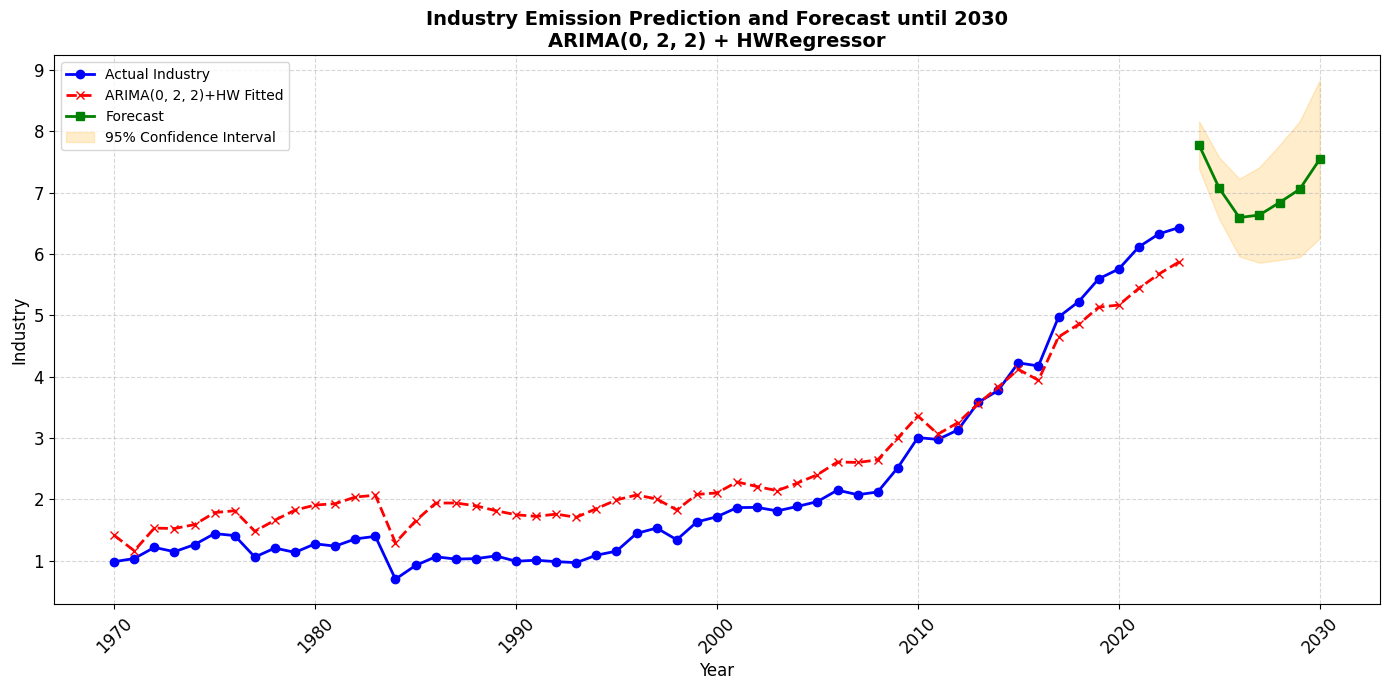


Forecast values until 2030:
            industry_forecast  lower_bound  upper_bound
2024-01-01           7.772027     7.382647     8.161408
2025-01-01           7.070036     6.568122     7.571950
2026-01-01           6.592587     5.959962     7.225213
2027-01-01           6.635256     5.856884     7.413628
2028-01-01           6.837933     5.900801     7.775065
2029-01-01           7.054292     5.946759     8.161826
2030-01-01           7.542734     6.254146     8.831323


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['industry', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the index is proper datetime and sorted
df_clean.index = pd.to_datetime(df_clean.index, format='%Y')  # Convert index to datetime
df_clean = df_clean.sort_index()

# Prepare full dataset
y = df_clean['industry'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index  # Now properly a DatetimeIndex

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# ARIMA Grid Search Function with fixed d=2
def find_best_arima(y_data, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=2)"""
    best_aic = np.inf
    best_order = None
    best_model = None
    
    # Generate all combinations with d=2
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue
            
        try:
            model = ARIMA(y_data.ravel(), order=(p,2,q))
            results = model.fit()
            current_aic = results.aic
            
            print(f"ARIMA({p},2,{q}) - AIC: {current_aic:.2f}")
            
            if current_aic < best_aic:
                best_aic = current_aic
                best_order = (p, 2, q)
                best_model = results
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},2,{q}): {str(e)}")
            continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=2 using full data
print("\nPerforming ARIMA grid search with d=2 on full dataset...")
best_order, arima_fit = find_best_arima(y)

# Get ARIMA predictions for historical data
arima_pred = arima_fit.predict(start=1, end=len(y), typ='levels').reshape(-1, 1)

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals = y - arima_pred

hw_regressor = HWRegressor(
    p=1000,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.005,
    batch_size=64,
    max_iter=1000,
    tol=1e-40,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_scaled, residuals.ravel())

# Predict residuals
residuals_pred = hw_regressor.predict(X_scaled).reshape(-1, 1)

# Combine predictions for historical data
final_pred = arima_pred + residuals_pred

# Generate future dates until 2030
last_date = dates[-1]
future_dates = pd.date_range(
    start=last_date + pd.DateOffset(years=1),
    end='2030-12-31',
    freq='YS'  # Year-start frequency
)

# Combine historical and future dates
all_dates = dates.union(future_dates)

# Forecast future values
n_forecast = len(future_dates)

# ARIMA forecast
arima_forecast = arima_fit.forecast(steps=n_forecast).reshape(-1, 1)

# Create future X values (using last available values - adjust as needed)
future_X = np.tile(X[-1], (n_forecast, 1))
future_X_scaled = scaler_X.transform(future_X)

# Predict residuals for future
residuals_forecast = hw_regressor.predict(future_X_scaled).reshape(-1, 1)

# Combine forecasts
future_pred = arima_forecast + residuals_forecast

# Confidence intervals for ARIMA forecast
conf_int = arima_fit.get_forecast(steps=n_forecast).conf_int()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(dates, y, label='Actual Industry', marker='o', color='blue', linewidth=2)
plt.plot(dates, final_pred, label=f'ARIMA{best_order}+HW Fitted', 
         marker='x', color='red', linestyle='--', linewidth=2)
plt.plot(future_dates, future_pred, label='Forecast', 
         marker='s', color='green', linestyle='-', linewidth=2)

# Confidence intervals
plt.fill_between(future_dates, 
                 conf_int[:, 0] + residuals_forecast.flatten(),
                 conf_int[:, 1] + residuals_forecast.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Industry Emission Prediction and Forecast until 2030\nARIMA{best_order} + HWRegressor', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('industry_forecast_2030.png', dpi=300, bbox_inches='tight')
plt.show()

# Create DataFrame with forecasts
forecast_df = pd.DataFrame(
    index=future_dates,
    data={
        'industry_forecast': future_pred.ravel(),
        'lower_bound': (conf_int[:, 0] + residuals_forecast.flatten()),
        'upper_bound': (conf_int[:, 1] + residuals_forecast.flatten())
    }
)

print("\nForecast values until 2030:")
print(forecast_df)


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=1 and Ljung-Box test...
ARIMA(0,1,1) - AIC: -42.11 - Ljung-Box p-value: 0.984
ARIMA(0,1,2) - AIC: -40.11 - Ljung-Box p-value: 0.985
ARIMA(0,1,3) - AIC: -38.24 - Ljung-Box p-value: 0.973
ARIMA(1,1,0) - AIC: -41.40 - Ljung-Box p-value: 0.968
ARIMA(1,1,1) - AIC: -40.11 - Ljung-Box p-value: 0.985
ARIMA(1,1,2) - AIC: -41.88 - Ljung-Box p-value: 0.982
ARIMA(1,1,3) - AIC: -43.40 - Ljung-Box p-value: 0.998
ARIMA(2,1,0) - AIC: -39.69 - Ljung-Box p-value: 0.978
ARIMA(2,1,1) - AIC: -38.12 - Ljung-Box p-value: 0.985
ARIMA(2,1,2) - AIC: -40.61 - Ljung-Box p-value: 0.990
ARIMA(2,1,3) - AIC: -44.23 - Ljung-Box p-value: 0.999
ARIMA(3,1,0) - AIC: -39.88 - Ljung-Box p-value: 0.992
ARIMA(3,1,1) - AIC: -43.31 - Ljung-Box p-value: 0.998
ARIMA(3,1,2) - AIC: -43.81 - Ljung-Box p-value: 0.997
ARIMA(3,1,3) - AIC: -44.55 - Ljung-Box p-value: 0.999

Selected ARIMA order: (3, 1, 3)
AIC: -44.55
Ljung-Box p-value: 0.999 (residuals show no aut

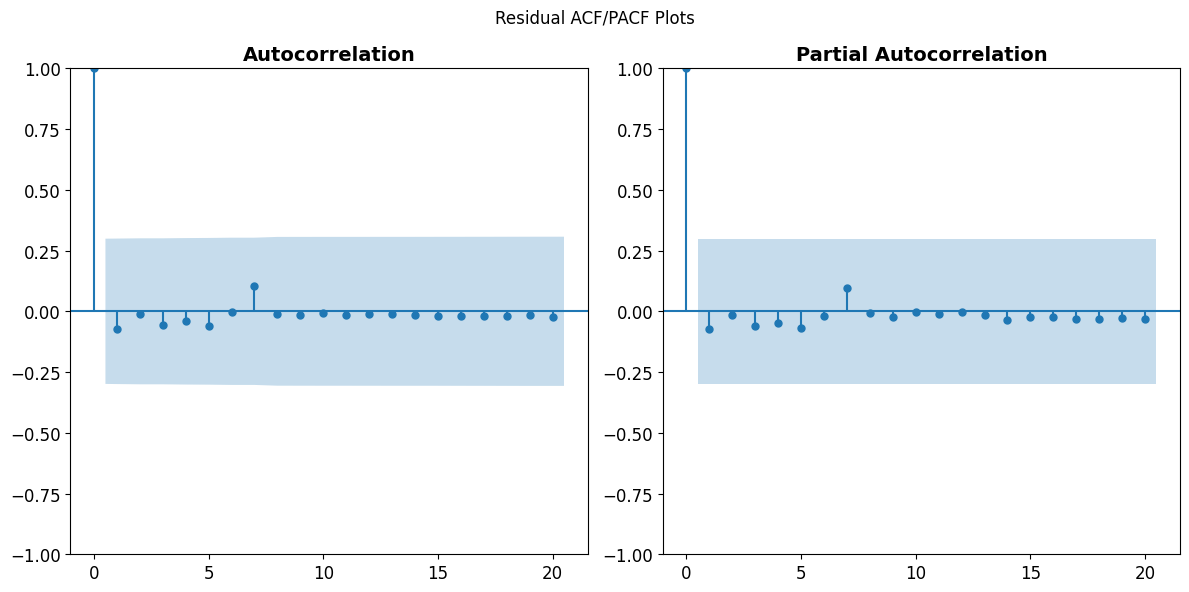


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 1.9123 - pss: 1.3865 - val_loss: 0.5598 - val_pss: 1.0488
Epoch 2/1000
1/1 [==============================] - loss: 2.1369 - pss: 1.9149 - val_loss: 1.4937 - val_pss: 0.8230
Epoch 3/1000
1/1 [==============================] - loss: 2.1921 - pss: 1.6853 - val_loss: 2.4751 - val_pss: 2.0852
Epoch 4/1000
1/1 [==============================] - loss: 4.1166 - pss: 2.5462 - val_loss: 4.2563 - val_pss: 2.4805
Epoch 5/1000
1/1 [==============================] - loss: 1.0014 - pss: 1.0908 - val_loss: 1.1412 - val_pss: 0.8001
Epoch 6/1000
1/1 [==============================] - loss: 2.8938 - pss: 2.2959 - val_loss: 2.2772 - val_pss: 1.2944
Early stopping triggered after 6 epochs.

Best Metrics: loss: 2.8938 - pss: 2.2959 - val_loss: 2.2772 - val_pss: 1.2944
 1/1 [==============================] 100.0%   - ETA: 0.00s

Optimized Hybrid Model Performance (d=1):
Me

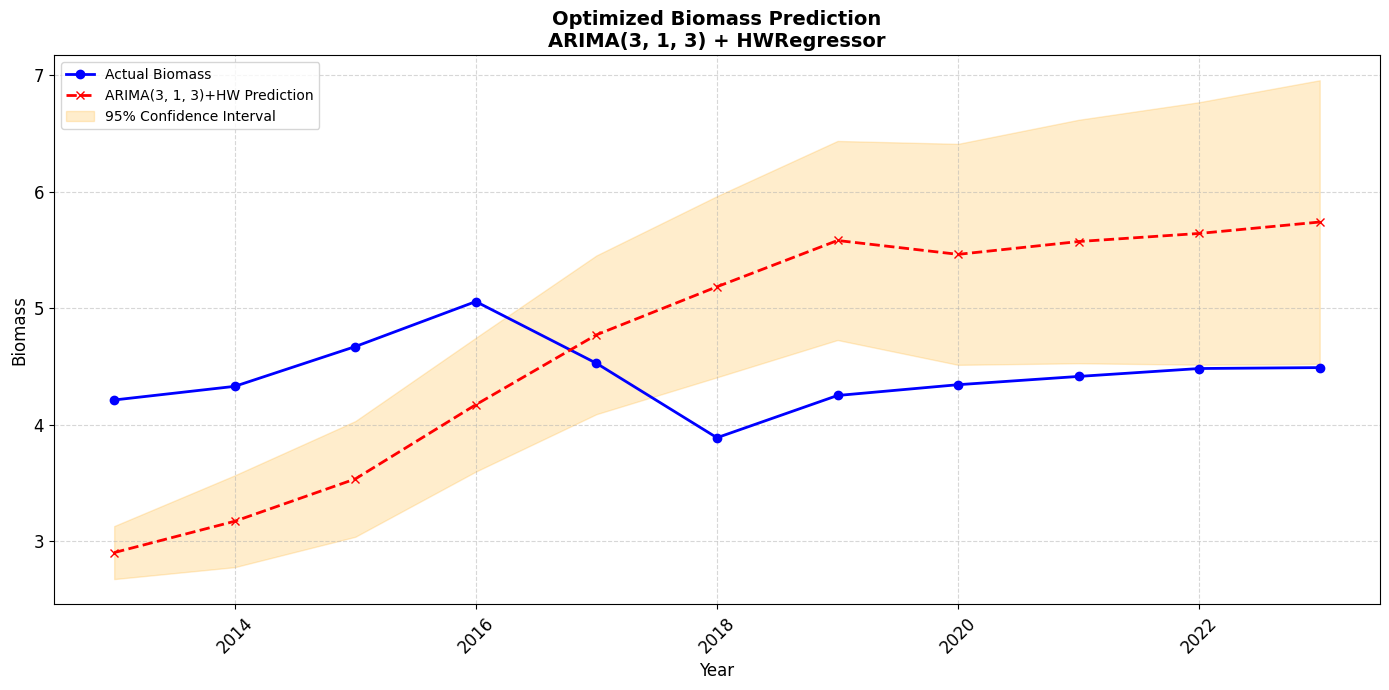


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 34.199
p-value: 0.000


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation - changed to include 'biomass'
df_clean = df.dropna(subset=['biomass', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes with 'biomass' as target
y = df_clean['biomass'].values.reshape(-1, 1)  # Changed to 'biomass'
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ARIMA Grid Search Function with fixed d=1 and Ljung-Box test
def find_best_arima(y_train, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=1) including Ljung-Box test"""
    best_aic = np.inf
    best_order = None
    best_model = None
    best_ljungbox = None
    
    # Generate all possible combinations of p and q with d=1
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue  # Skip (0,1,0) as it's just differencing
            
        try:
            model = ARIMA(y_train.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            # Perform Ljung-Box test on residuals
            lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
            lb_pvalue = lb_test['lb_pvalue'].values[0]
            
            print(f"ARIMA({p},1,{q}) - AIC: {current_aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
            
            # Prefer models where residuals show no autocorrelation (p-value > 0.05)
            if current_aic < best_aic and lb_pvalue > 0.05:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                best_ljungbox = lb_pvalue
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},1,{q}): {str(e)}")
            continue
    
    if best_order is None:
        print("Warning: No model passed Ljung-Box test (p-value > 0.05), using best AIC regardless")
        # Fallback to best AIC without Ljung-Box constraint
        for p, q in product(range(max_p+1), range(max_q+1)):
            if p == 0 and q == 0:
                continue
            try:
                model = ARIMA(y_train.ravel(), order=(p,1,q))
                results = model.fit()
                current_aic = results.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 1, q)
                    best_model = results
            except:
                continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    if best_ljungbox is not None:
        print(f"Ljung-Box p-value: {best_ljungbox:.3f} (residuals show no autocorrelation)")
    else:
        print("Warning: Selected model may have autocorrelated residuals")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=1
print("\nPerforming ARIMA grid search with d=1 and Ljung-Box test...")
best_order, arima_fit = find_best_arima(y_train)

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(y_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(y_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals to check model adequacy
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('Residual ACF/PACF Plots')
plt.tight_layout()
plt.show()

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = y_train - arima_train_pred

hw_regressor = HWRegressor(
    p=60,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.07,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
y_test = y_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((y_test - final_test_pred) / y_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]  # Remove infinite values
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(y_test, final_test_pred)
mae = mean_absolute_error(y_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nOptimized Hybrid Model Performance (d=1):")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting with 'biomass' labels
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual Biomass', marker='o', color='blue', linewidth=2)
plt.plot(dates_test, final_test_pred, label=f'ARIMA{best_order}+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Add confidence intervals
conf_int = arima_fit.get_forecast(steps=len(y_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Optimized Biomass Prediction\nARIMA{best_order} + HWRegressor', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Biomass', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('biomass_forecast_optimized_d1.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform final Ljung-Box test on complete model residuals
final_residuals = y_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")


Data shape after cleaning: (54, 18)

Performing ARIMA grid search...
ARIMA(0,1,1) - AIC: -21.55
ARIMA(0,1,2) - AIC: -21.21
ARIMA(0,1,3) - AIC: -19.31
ARIMA(1,1,0) - AIC: -19.04
ARIMA(1,1,1) - AIC: -21.08
ARIMA(1,1,2) - AIC: -19.25
ARIMA(1,1,3) - AIC: -20.35
ARIMA(2,1,0) - AIC: -19.57
ARIMA(2,1,1) - AIC: -18.97
ARIMA(2,1,2) - AIC: -19.02
ARIMA(2,1,3) - AIC: -19.88
ARIMA(3,1,0) - AIC: -19.86
ARIMA(3,1,1) - AIC: -17.88
ARIMA(3,1,2) - AIC: -18.39
ARIMA(3,1,3) - AIC: -18.01

Selected ARIMA order: (0, 1, 1)
AIC: -21.55

Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 2.3064 - pss: 1.3451 - val_loss: 3.2466 - val_pss: 2.1390
Epoch 2/1000
1/1 [==============================] - loss: 3.9354 - pss: 1.7315 - val_loss: 1.7612 - val_pss: 1.4121
Epoch 3/1000
1/1 [==============================] - loss: 4.4001 - pss: 2.1858 - val_loss: 6.3114 - val_pss: 3.1647
Epoch 4/1000
1/1 [==============================] - l

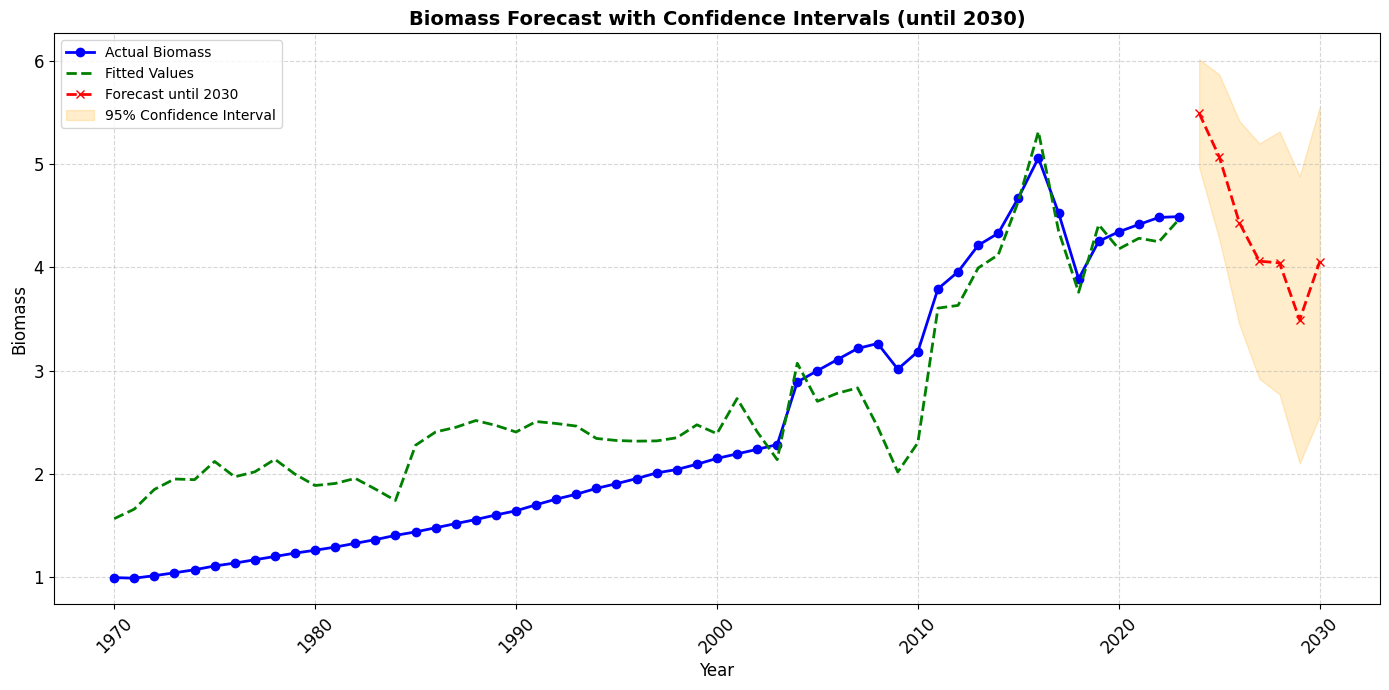


Forecasted Biomass Values with Confidence Intervals until 2030:
            Forecast  Lower_Bound  Upper_Bound
2024-01-01      5.49         4.97         6.01
2025-01-01      5.07         4.27         5.87
2026-01-01      4.43         3.45         5.42
2027-01-01      4.06         2.92         5.20
2028-01-01      4.04         2.77         5.31
2029-01-01      3.49         2.10         4.88
2030-01-01      4.05         2.56         5.55


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['biomass', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the index is proper datetime and sorted
df_clean.index = pd.to_datetime(df_clean.index, format='%Y')  # Convert index to datetime
df_clean = df_clean.sort_index()

# Prepare the full dataset
y = df_clean['biomass'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index  # Now properly a DatetimeIndex

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# ARIMA Grid Search Function
def find_best_arima(y_data, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=1)"""
    best_aic = np.inf
    best_order = None
    best_model = None
    
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue
            
        try:
            model = ARIMA(y_data.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            print(f"ARIMA({p},1,{q}) - AIC: {current_aic:.2f}")
            
            if current_aic < best_aic:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},1,{q}): {str(e)}")
            continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    
    return best_order, best_model

# Find optimal ARIMA parameters on full data
print("\nPerforming ARIMA grid search...")
best_order, arima_fit = find_best_arima(y)

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
arima_pred = arima_fit.predict(start=1, end=len(y), typ='levels').reshape(-1, 1)
residuals = y - arima_pred

hw_regressor = HWRegressor(
    p=60,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.07,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_scaled, residuals.ravel())

# Generate future dates until 2030
last_date = dates[-1]
future_dates = pd.date_range(
    start=last_date + pd.DateOffset(years=1),
    end='2030-12-31',
    freq='YS'  # Year-start frequency
)

# Combine historical and future dates
all_dates = dates.union(future_dates)

# Create future exogenous variables (using last known values)
future_X = np.tile(X[-1], (len(future_dates), 1))
future_X_scaled = scaler_X.transform(future_X)

# Generate ARIMA forecasts with confidence intervals
forecast_steps = len(future_dates)
arima_forecast = arima_fit.get_forecast(steps=forecast_steps)
arima_mean = arima_forecast.predicted_mean.reshape(-1, 1)
arima_conf_int = arima_forecast.conf_int()

# Predict residuals for future
residuals_forecast = hw_regressor.predict(future_X_scaled).reshape(-1, 1)

# Combine forecasts
final_forecast = arima_mean + residuals_forecast

# Calculate confidence intervals for the hybrid model
hw_std = np.std(residuals)  # Standard deviation of residuals
final_lower = arima_conf_int[:, 0] + residuals_forecast.flatten() - 1.96 * hw_std
final_upper = arima_conf_int[:, 1] + residuals_forecast.flatten() + 1.96 * hw_std

# Plot results with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(dates, y, label='Actual Biomass', marker='o', color='blue', linewidth=2)
plt.plot(dates, arima_pred + hw_regressor.predict(X_scaled).reshape(-1, 1), 
         label='Fitted Values', color='green', linestyle='--', linewidth=2)
plt.plot(future_dates, final_forecast, 
         label='Forecast until 2030', marker='x', color='red', linestyle='--', linewidth=2)

# Add confidence intervals
plt.fill_between(future_dates, final_lower, final_upper, 
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('Biomass Forecast with Confidence Intervals (until 2030)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Biomass', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('biomass_forecast_2030.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a DataFrame with the forecasts and confidence intervals
forecast_df = pd.DataFrame(
    index=future_dates,
    data={
        'Forecast': final_forecast.flatten(),
        'Lower_Bound': final_lower,
        'Upper_Bound': final_upper
    }
)

print("\nForecasted Biomass Values with Confidence Intervals until 2030:")
print(forecast_df.round(2))


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=2 and Ljung-Box test...
ARIMA(0,2,1) - AIC: -2.93 - Ljung-Box p-value: 0.702
ARIMA(0,2,2) - AIC: -0.93 - Ljung-Box p-value: 0.702
ARIMA(0,2,3) - AIC: 1.07 - Ljung-Box p-value: 0.702
ARIMA(1,2,0) - AIC: -2.93 - Ljung-Box p-value: 0.702
ARIMA(1,2,1) - AIC: -0.93 - Ljung-Box p-value: 0.702
ARIMA(1,2,2) - AIC: 1.07 - Ljung-Box p-value: 0.702
ARIMA(1,2,3) - AIC: 3.07 - Ljung-Box p-value: 0.702
ARIMA(2,2,0) - AIC: -0.93 - Ljung-Box p-value: 0.702
ARIMA(2,2,1) - AIC: 1.07 - Ljung-Box p-value: 0.702
ARIMA(2,2,2) - AIC: 3.07 - Ljung-Box p-value: 0.702
ARIMA(2,2,3) - AIC: 5.07 - Ljung-Box p-value: 0.702
ARIMA(3,2,0) - AIC: 1.07 - Ljung-Box p-value: 0.702
ARIMA(3,2,1) - AIC: 3.07 - Ljung-Box p-value: 0.702
ARIMA(3,2,2) - AIC: 5.07 - Ljung-Box p-value: 0.702
ARIMA(3,2,3) - AIC: 7.07 - Ljung-Box p-value: 0.702

Selected ARIMA order: (1, 2, 0)
AIC: -2.93
Ljung-Box p-value: 0.702 (residuals show no autocorrelation)


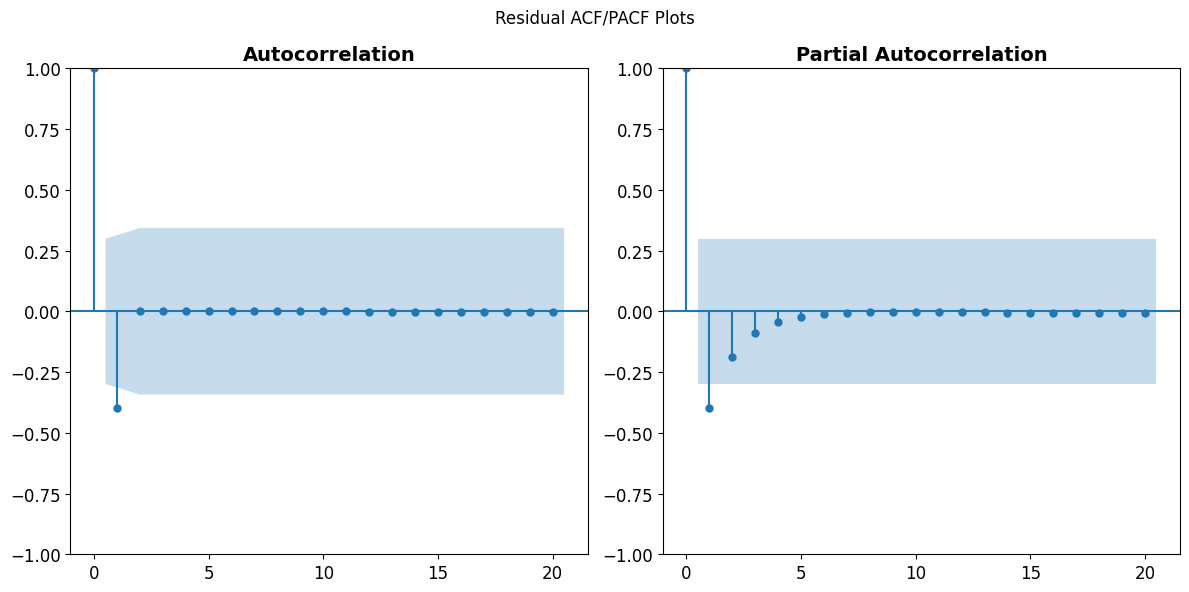


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 12.9578 - pss: 0.0023 - val_loss: 0.9703 - val_pss: 0.0023
Epoch 2/1000
1/1 [==============================] - loss: 12.9549 - pss: 0.0045 - val_loss: 0.9692 - val_pss: 0.0045
Epoch 3/1000
1/1 [==============================] - loss: 12.9519 - pss: 0.0068 - val_loss: 0.9681 - val_pss: 0.0068
Epoch 4/1000
1/1 [==============================] - loss: 12.9490 - pss: 0.0090 - val_loss: 0.9671 - val_pss: 0.0090
Epoch 5/1000
1/1 [==============================] - loss: 12.9460 - pss: 0.0112 - val_loss: 0.9660 - val_pss: 0.0112
Epoch 6/1000
1/1 [==============================] - loss: 12.9431 - pss: 0.0134 - val_loss: 0.9650 - val_pss: 0.0134
Epoch 7/1000
1/1 [==============================] - loss: 12.9403 - pss: 0.0156 - val_loss: 0.9639 - val_pss: 0.0156
Epoch 8/1000
1/1 [==============================] - loss: 12.9374 - pss: 0.0178 - val_loss: 0.9629 - v

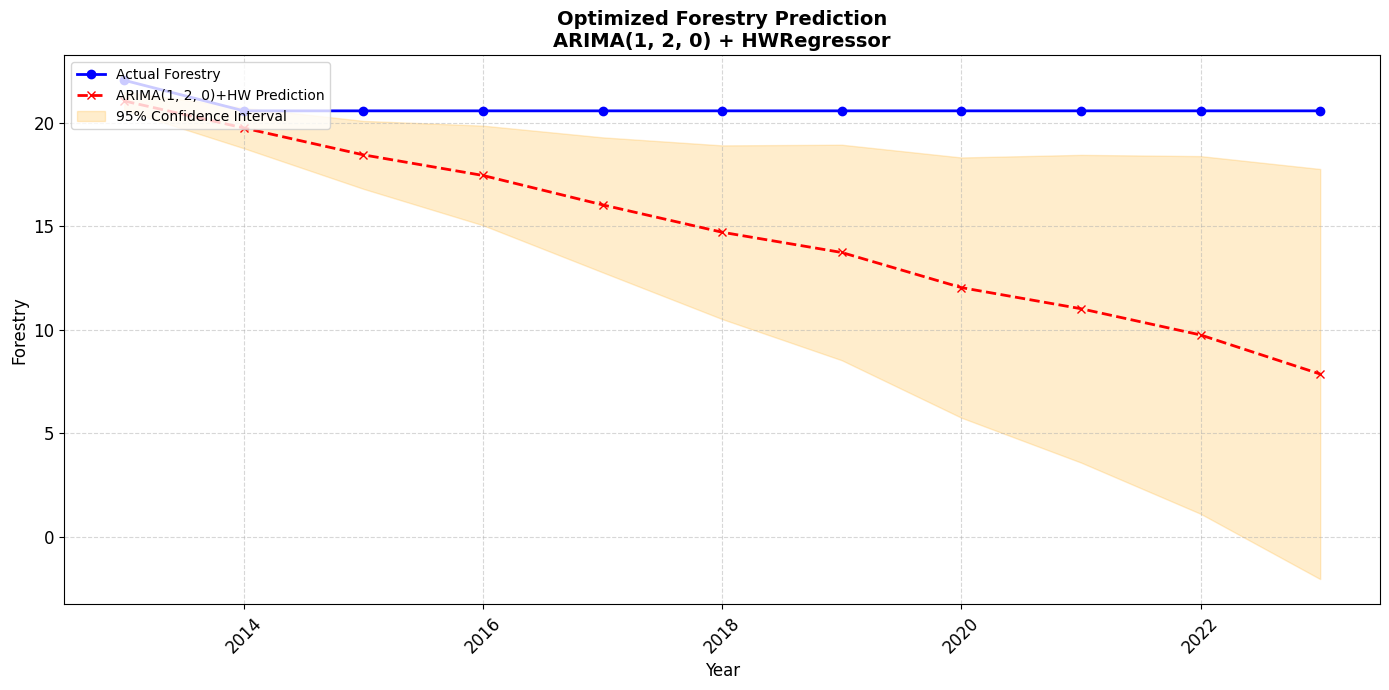


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 45.660
p-value: 0.000


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['forestry', 'e_power', 'transport'])  # Changed to 'forestry'
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes with 'forestry' as target
y = df_clean['forestry'].values.reshape(-1, 1)  # Changed to 'forestry'
X = df_clean[['e_power', 'transport']].values  # Changed predictors
dates = df_clean.index.values

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ARIMA Grid Search Function with fixed d=2 (changed from d=1)
def find_best_arima(y_train, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=2) including Ljung-Box test"""
    best_aic = np.inf
    best_order = None
    best_model = None
    best_ljungbox = None
    
    # Generate all combinations with d=2
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue
            
        try:
            model = ARIMA(y_train.ravel(), order=(p,2,q))  # Changed to d=2
            results = model.fit()
            current_aic = results.aic
            
            # Ljung-Box test
            lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
            lb_pvalue = lb_test['lb_pvalue'].values[0]
            
            print(f"ARIMA({p},2,{q}) - AIC: {current_aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
            
            if current_aic < best_aic and lb_pvalue > 0.05:
                best_aic = current_aic
                best_order = (p, 2, q)  # Changed to d=2
                best_model = results
                best_ljungbox = lb_pvalue
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},2,{q}): {str(e)}")
            continue
    
    if best_order is None:
        print("Warning: No model passed Ljung-Box test, using best AIC regardless")
        for p, q in product(range(max_p+1), range(max_q+1)):
            if p == 0 and q == 0:
                continue
            try:
                model = ARIMA(y_train.ravel(), order=(p,2,q))  # Changed to d=2
                results = model.fit()
                current_aic = results.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 2, q)  # Changed to d=2
                    best_model = results
            except:
                continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    if best_ljungbox is not None:
        print(f"Ljung-Box p-value: {best_ljungbox:.3f} (residuals show no autocorrelation)")
    else:
        print("Warning: Selected model may have autocorrelated residuals")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=2
print("\nPerforming ARIMA grid search with d=2 and Ljung-Box test...")
best_order, arima_fit = find_best_arima(y_train)

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(y_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(y_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('Residual ACF/PACF Plots')
plt.tight_layout()
plt.show()

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = y_train - arima_train_pred

hw_regressor = HWRegressor(
    p=15,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.00005,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
y_test = y_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((y_test - final_test_pred) / y_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(y_test, final_test_pred)
mae = mean_absolute_error(y_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nOptimized Hybrid Model Performance (d=2):")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual Forestry', marker='o', color='blue', linewidth=2)  # Changed label
plt.plot(dates_test, final_test_pred, label=f'ARIMA{best_order}+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Confidence intervals
conf_int = arima_fit.get_forecast(steps=len(y_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Optimized Forestry Prediction\nARIMA{best_order} + HWRegressor', fontsize=14)  # Changed title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Forestry', fontsize=12)  # Changed y-label
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('forestry_forecast_optimized_d2.png', dpi=300, bbox_inches='tight')  # Changed filename
plt.show()

# Final Ljung-Box test
final_residuals = y_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=2 on full dataset...
ARIMA(0,2,1) - AIC: 20.83
ARIMA(0,2,2) - AIC: 22.83
ARIMA(0,2,3) - AIC: 24.82
ARIMA(1,2,0) - AIC: 20.83
ARIMA(1,2,1) - AIC: 21.71
ARIMA(1,2,2) - AIC: 23.64
ARIMA(1,2,3) - AIC: 26.83
ARIMA(2,2,0) - AIC: 22.83
ARIMA(2,2,1) - AIC: 23.63
ARIMA(2,2,2) - AIC: 24.46
ARIMA(2,2,3) - AIC: 28.82
ARIMA(3,2,0) - AIC: 24.82
ARIMA(3,2,1) - AIC: 26.82
ARIMA(3,2,2) - AIC: 26.46
ARIMA(3,2,3) - AIC: 30.82

Selected ARIMA order: (1, 2, 0)
AIC: 20.83

Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 14.1690 - pss: 1.4542 - val_loss: 6.8316 - val_pss: 1.9460
Epoch 2/1000
1/1 [==============================] - loss: 15.3534 - pss: 2.2908 - val_loss: 14.0674 - val_pss: 4.1852
Epoch 3/1000
1/1 [==============================] - loss: 11.4067 - pss: 1.8836 - val_loss: 6.5640 - val_pss: 2.3311
Epoch 4/1000
1/1 [======================

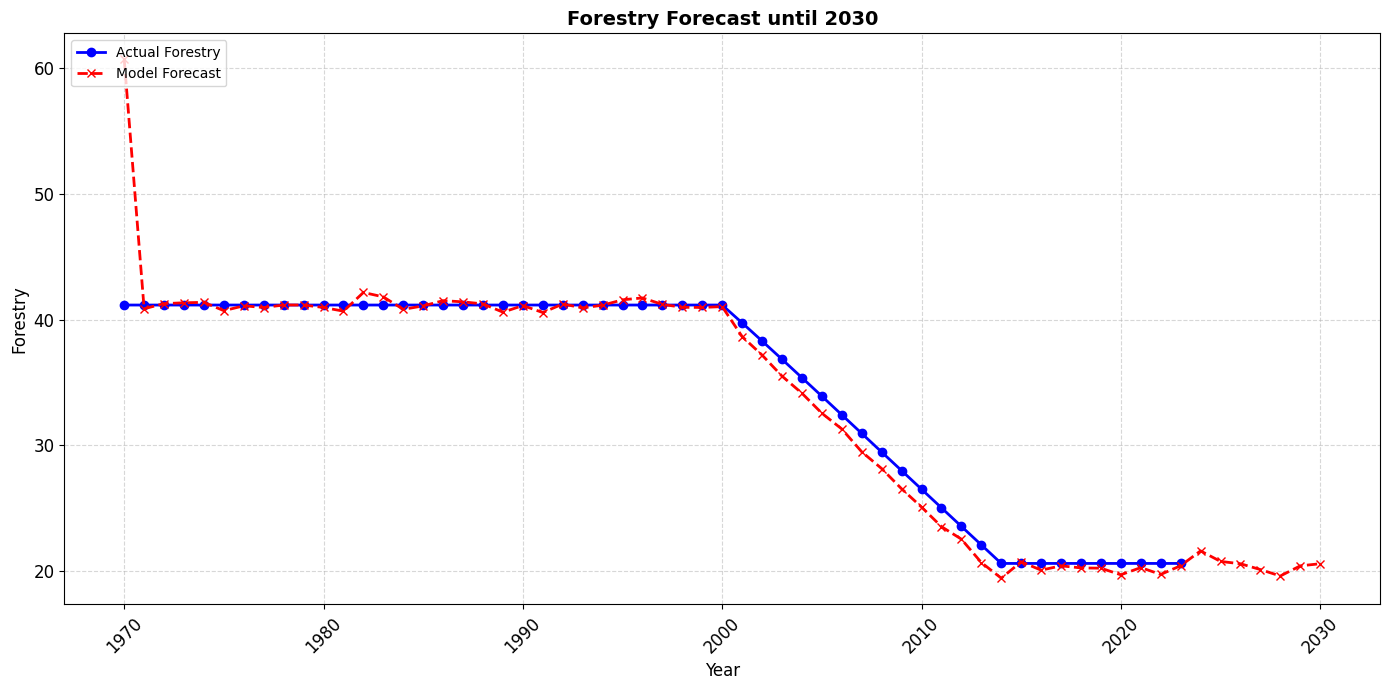


Forecast values until 2030:
            Actual   Forecast
2024-01-01     NaN  21.569800
2025-01-01     NaN  20.729101
2026-01-01     NaN  20.543761
2027-01-01     NaN  20.082071
2028-01-01     NaN  19.569800
2029-01-01     NaN  20.378417
2030-01-01     NaN  20.546280


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['forestry', 'e_power', 'transport'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the index is proper datetime and sorted
df_clean.index = pd.to_datetime(df_clean.index, format='%Y')  # Convert index to datetime
df_clean = df_clean.sort_index()

# Prepare data with 'forestry' as target
y = df_clean['forestry'].values.reshape(-1, 1)
X = df_clean[['e_power', 'transport']].values
dates = df_clean.index  # Now properly a DatetimeIndex

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# ARIMA Grid Search Function with fixed d=2
def find_best_arima(y_data, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=2)"""
    best_aic = np.inf
    best_order = None
    best_model = None
    
    # Generate all combinations with d=2
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue
            
        try:
            model = ARIMA(y_data.ravel(), order=(p,2,q))
            results = model.fit()
            current_aic = results.aic
            
            print(f"ARIMA({p},2,{q}) - AIC: {current_aic:.2f}")
            
            if current_aic < best_aic:
                best_aic = current_aic
                best_order = (p, 2, q)
                best_model = results
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},2,{q}): {str(e)}")
            continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=2 on full dataset
print("\nPerforming ARIMA grid search with d=2 on full dataset...")
best_order, arima_fit = find_best_arima(y)

# Get ARIMA predictions for historical data
arima_pred = arima_fit.predict(start=1, end=len(y), typ='levels').reshape(-1, 1)

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals = y - arima_pred

hw_regressor = HWRegressor(
    p=15,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.3,
    batch_size=64,
    max_iter=1000,
    tol=1e-20,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_scaled, residuals.ravel())

# Generate future dates until 2030
last_date = dates[-1]
future_dates = pd.date_range(
    start=last_date + pd.DateOffset(years=1),
    end='2030-12-31',
    freq='YS'  # Year-start frequency
)

# Combine historical and future dates
all_dates = dates.union(future_dates)

# Create future exogenous variables (using last known values)
future_X = np.tile(X[-1], (len(future_dates), 1))
X_all = np.vstack([X, future_X])
X_all_scaled = scaler_X.transform(X_all)

# Generate forecasts
forecast_steps = len(future_dates)
arima_forecast = arima_fit.forecast(steps=forecast_steps).reshape(-1, 1)
residuals_forecast = hw_regressor.predict(X_all_scaled[-forecast_steps:]).reshape(-1, 1)
final_forecast = arima_forecast + residuals_forecast

# Combine historical and forecasted values
historical_pred = arima_pred + hw_regressor.predict(X_scaled).reshape(-1, 1)
all_predictions = np.vstack([historical_pred, final_forecast])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(dates, y, label='Actual Forestry', marker='o', color='blue', linewidth=2)
plt.plot(all_dates, all_predictions, label='Model Forecast', 
         marker='x', color='red', linestyle='--', linewidth=2)

plt.title('Forestry Forecast until 2030', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Forestry', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('forestry_forecast_2030.png', dpi=300, bbox_inches='tight')
plt.show()

# Create DataFrame with forecasts
forecast_df = pd.DataFrame(
    index=all_dates,
    data={
        'Actual': np.concatenate([y.flatten(), [np.nan] * len(future_dates)]),
        'Forecast': all_predictions.flatten()
    }
)

print("\nForecast values until 2030:")
print(forecast_df.tail(len(future_dates)))


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=1 and Ljung-Box test...
ARIMA(0,1,1) - AIC: -56.06 - Ljung-Box p-value: 1.000
ARIMA(0,1,2) - AIC: -61.88 - Ljung-Box p-value: 1.000
ARIMA(0,1,3) - AIC: -62.04 - Ljung-Box p-value: 1.000
ARIMA(1,1,0) - AIC: -56.14 - Ljung-Box p-value: 1.000
ARIMA(1,1,1) - AIC: -64.28 - Ljung-Box p-value: 1.000
ARIMA(1,1,2) - AIC: -65.04 - Ljung-Box p-value: 1.000
ARIMA(1,1,3) - AIC: -65.06 - Ljung-Box p-value: 1.000
ARIMA(2,1,0) - AIC: -58.88 - Ljung-Box p-value: 1.000
ARIMA(2,1,1) - AIC: -65.67 - Ljung-Box p-value: 1.000
ARIMA(2,1,2) - AIC: -63.66 - Ljung-Box p-value: 1.000
ARIMA(2,1,3) - AIC: -61.06 - Ljung-Box p-value: 1.000
ARIMA(3,1,0) - AIC: -64.85 - Ljung-Box p-value: 1.000
ARIMA(3,1,1) - AIC: -62.87 - Ljung-Box p-value: 1.000
ARIMA(3,1,2) - AIC: -61.62 - Ljung-Box p-value: 1.000
ARIMA(3,1,3) - AIC: -62.51 - Ljung-Box p-value: 1.000

Selected ARIMA order: (2, 1, 1)
AIC: -65.67
Ljung-Box p-value: 1.000 (residuals show no aut

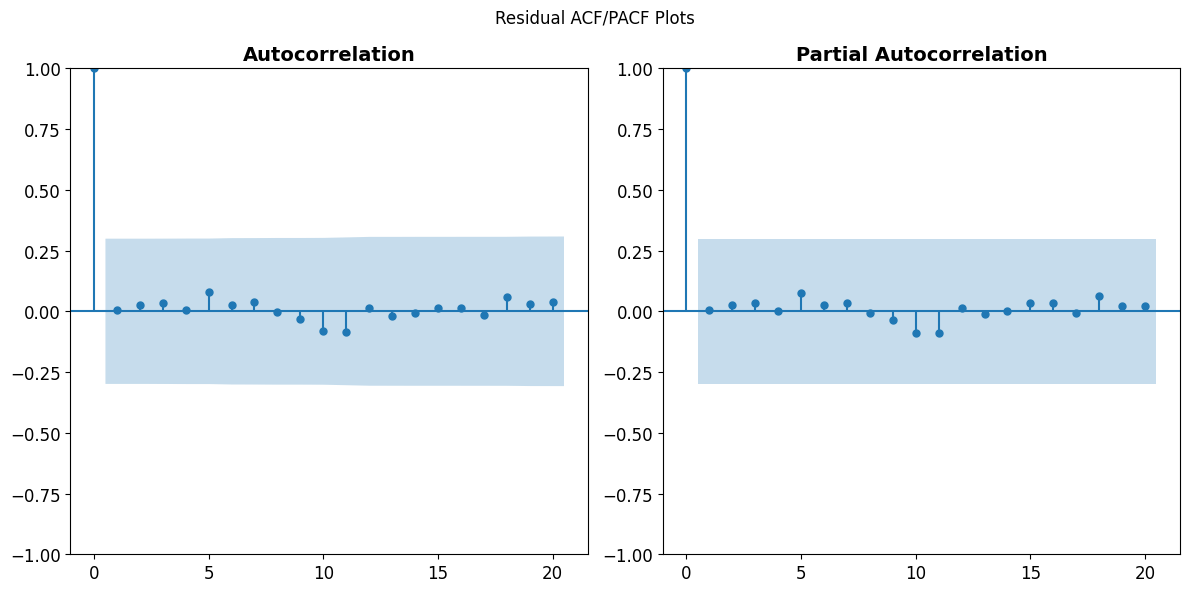


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 1.2608 - pss: 1.1805 - val_loss: 0.6320 - val_pss: 0.8573
Epoch 2/1000
1/1 [==============================] - loss: 0.9584 - pss: 1.1808 - val_loss: 0.8373 - val_pss: 0.9274
Epoch 3/1000
1/1 [==============================] - loss: 1.9201 - pss: 1.4379 - val_loss: 2.3536 - val_pss: 1.2969
Epoch 4/1000
1/1 [==============================] - loss: 1.1761 - pss: 1.0299 - val_loss: 0.3834 - val_pss: 0.6426
Epoch 5/1000
1/1 [==============================] - loss: 1.8571 - pss: 1.5397 - val_loss: 2.6299 - val_pss: 1.7758
Epoch 6/1000
1/1 [==============================] - loss: 0.9499 - pss: 1.1585 - val_loss: 0.4469 - val_pss: 0.8745
Epoch 7/1000
1/1 [==============================] - loss: 1.5411 - pss: 1.5231 - val_loss: 3.2862 - val_pss: 1.2378
Epoch 8/1000
1/1 [==============================] - loss: 1.2461 - pss: 1.0055 - val_loss: 0.7625 - val_pss: 

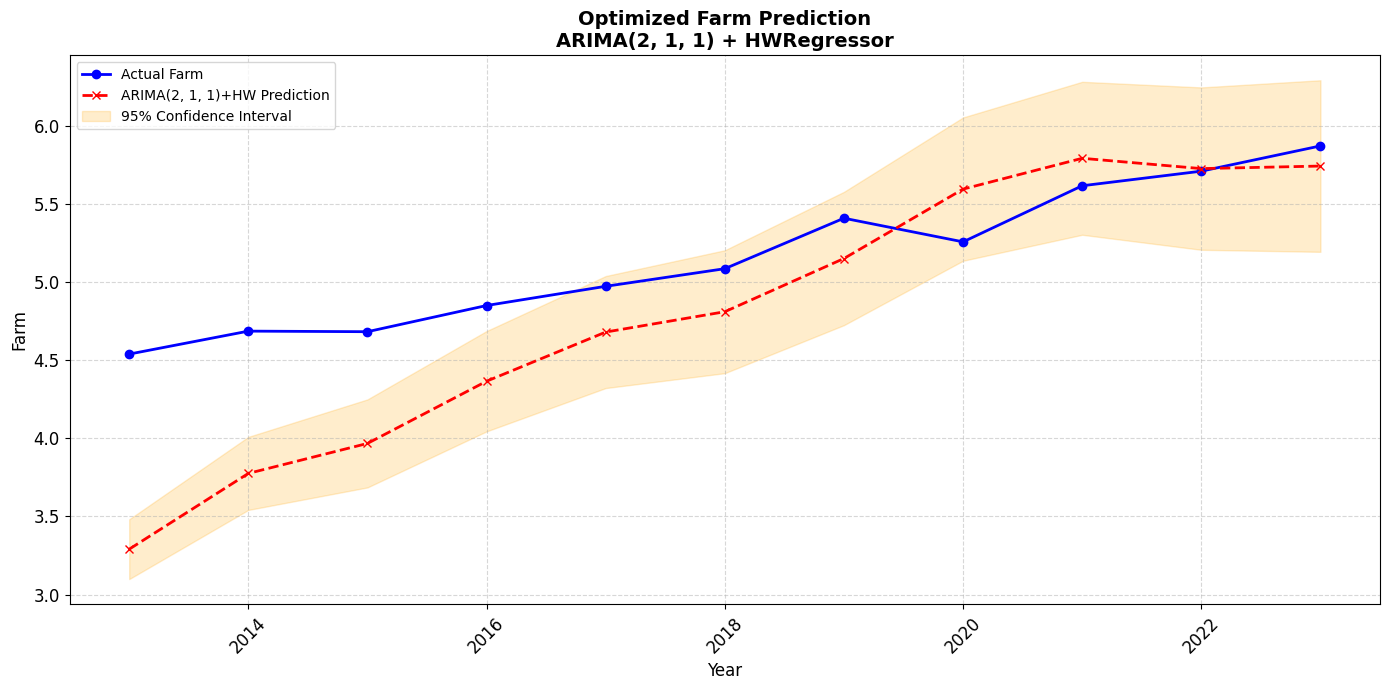


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 30.278
p-value: 0.001


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['farm', 'e_power', 'forest'])  # Changed to include 'farm'
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes with 'farm' as target
y = df_clean['farm'].values.reshape(-1, 1)  # Changed to 'farm'
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ARIMA Grid Search Function with fixed d=1 and Ljung-Box test
def find_best_arima(y_train, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=1) including Ljung-Box test"""
    best_aic = np.inf
    best_order = None
    best_model = None
    best_ljungbox = None
    
    # Generate all possible combinations of p and q with d=1
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue  # Skip (0,1,0) as it's just differencing
            
        try:
            model = ARIMA(y_train.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            # Perform Ljung-Box test on residuals
            lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
            lb_pvalue = lb_test['lb_pvalue'].values[0]
            
            print(f"ARIMA({p},1,{q}) - AIC: {current_aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
            
            # Prefer models where residuals show no autocorrelation (p-value > 0.05)
            if current_aic < best_aic and lb_pvalue > 0.05:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                best_ljungbox = lb_pvalue
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},1,{q}): {str(e)}")
            continue
    
    if best_order is None:
        print("Warning: No model passed Ljung-Box test (p-value > 0.05), using best AIC regardless")
        # Fallback to best AIC without Ljung-Box constraint
        for p, q in product(range(max_p+1), range(max_q+1)):
            if p == 0 and q == 0:
                continue
            try:
                model = ARIMA(y_train.ravel(), order=(p,1,q))
                results = model.fit()
                current_aic = results.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 1, q)
                    best_model = results
            except:
                continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    if best_ljungbox is not None:
        print(f"Ljung-Box p-value: {best_ljungbox:.3f} (residuals show no autocorrelation)")
    else:
        print("Warning: Selected model may have autocorrelated residuals")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=1
print("\nPerforming ARIMA grid search with d=1 and Ljung-Box test...")
best_order, arima_fit = find_best_arima(y_train)

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(y_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(y_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals to check model adequacy
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('Residual ACF/PACF Plots')
plt.tight_layout()
plt.show()

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = y_train - arima_train_pred

hw_regressor = HWRegressor(
    p=200,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.06,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
y_test = y_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((y_test - final_test_pred) / y_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]  # Remove infinite values
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(y_test, final_test_pred)
mae = mean_absolute_error(y_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nOptimized Hybrid Model Performance (d=1):")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual Farm', marker='o', color='blue', linewidth=2)  # Changed label
plt.plot(dates_test, final_test_pred, label=f'ARIMA{best_order}+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Add confidence intervals
conf_int = arima_fit.get_forecast(steps=len(y_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Optimized Farm Prediction\nARIMA{best_order} + HWRegressor', fontsize=14)  # Changed title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Farm', fontsize=12)  # Changed y-label
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('farm_forecast_optimized_d1.png', dpi=300, bbox_inches='tight')  # Changed filename
plt.show()

# Perform final Ljung-Box test on complete model residuals
final_residuals = y_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")


Data shape after cleaning: (54, 18)

Performing ARIMA grid search on full dataset...
ARIMA(0,1,1) - AIC: -56.69
ARIMA(0,1,2) - AIC: -62.78
ARIMA(0,1,3) - AIC: -62.79
ARIMA(1,1,0) - AIC: -57.32
ARIMA(1,1,1) - AIC: -71.45
ARIMA(1,1,2) - AIC: -74.30
ARIMA(1,1,3) - AIC: -72.99
ARIMA(2,1,0) - AIC: -66.17
ARIMA(2,1,1) - AIC: -74.88
ARIMA(2,1,2) - AIC: -72.90
ARIMA(2,1,3) - AIC: -71.64
ARIMA(3,1,0) - AIC: -70.73
ARIMA(3,1,1) - AIC: -72.91
ARIMA(3,1,2) - AIC: -73.12
ARIMA(3,1,3) - AIC: -71.50

Selected ARIMA order: (2, 1, 1)
AIC: -74.88

Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 0.8106 - pss: 0.7191 - val_loss: 0.5035 - val_pss: 0.7215
Epoch 2/1000
1/1 [==============================] - loss: 1.3688 - pss: 1.0113 - val_loss: 1.7769 - val_pss: 1.6531
Epoch 3/1000
1/1 [==============================] - loss: 0.5296 - pss: 0.8836 - val_loss: 0.2701 - val_pss: 0.7310
Epoch 4/1000
1/1 [===================

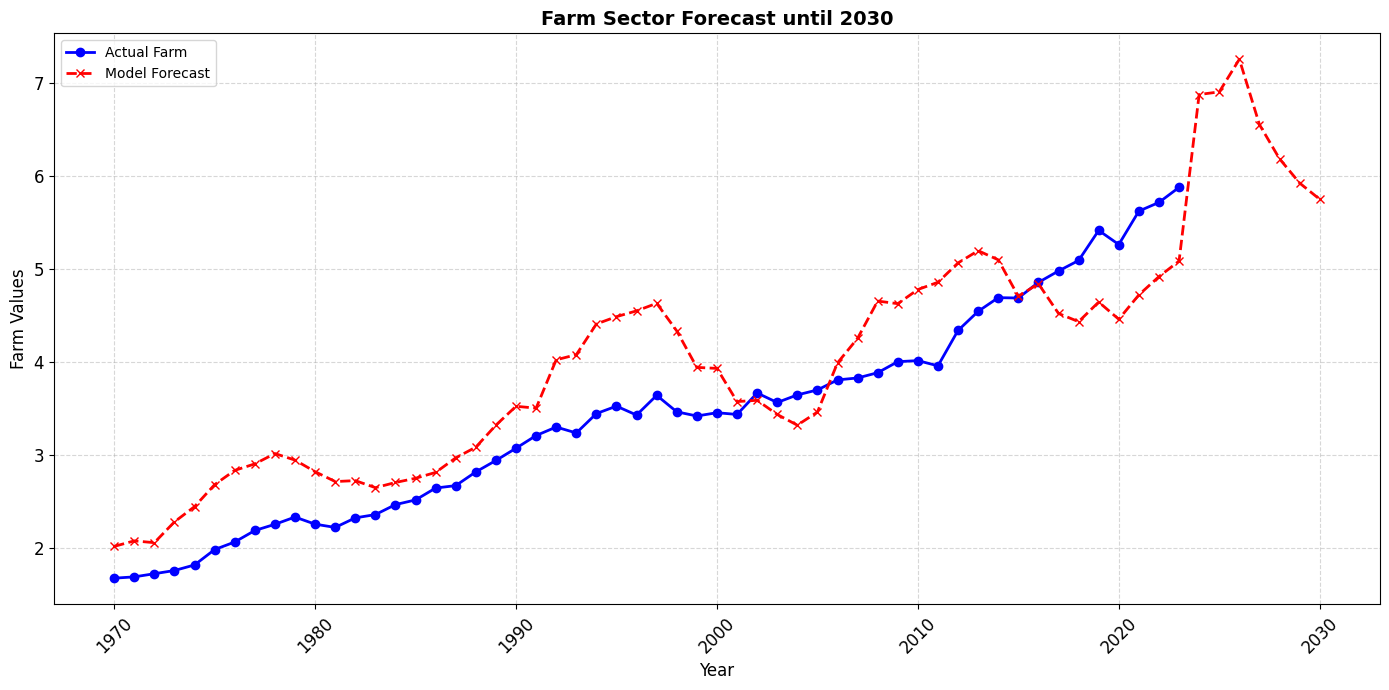


Forecast values until 2030:
            Historical_Actual  Model_Values      Type
2024-01-01                NaN      6.870819  Forecast
2025-01-01                NaN      6.899327  Forecast
2026-01-01                NaN      7.249763  Forecast
2027-01-01                NaN      6.548032  Forecast
2028-01-01                NaN      6.179938  Forecast
2029-01-01                NaN      5.918884  Forecast
2030-01-01                NaN      5.744479  Forecast


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Data preparation
df_clean = df.dropna(subset=['farm', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the index is proper datetime and sorted
df_clean.index = pd.to_datetime(df_clean.index, format='%Y')  # Convert index to datetime
df_clean = df_clean.sort_index()

# Prepare full dataset with 'farm' as target
y = df_clean['farm'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index  # Now properly a DatetimeIndex

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Simplified ARIMA Grid Search Function
def find_best_arima(y_data, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=1)"""
    best_aic = np.inf
    best_order = None
    best_model = None
    
    # Generate all possible combinations of p and q with d=1
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue
            
        try:
            model = ARIMA(y_data.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            print(f"ARIMA({p},1,{q}) - AIC: {current_aic:.2f}")
            
            if current_aic < best_aic:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},1,{q}): {str(e)}")
            continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    
    return best_order, best_model

# Find optimal ARIMA parameters on full dataset
print("\nPerforming ARIMA grid search on full dataset...")
best_order, arima_fit = find_best_arima(y)

# Get ARIMA predictions for historical data
arima_pred = arima_fit.predict(start=1, end=len(y), typ='levels').reshape(-1, 1)

# HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals = y - arima_pred

hw_regressor = HWRegressor(
    p=150,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.06,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_scaled, residuals.ravel())

# Generate future dates until 2030
last_date = dates[-1]
future_dates = pd.date_range(
    start=last_date + pd.DateOffset(years=1),
    end='2030-12-31',
    freq='YS'  # Year-start frequency
)

# Combine historical and future dates
all_dates = dates.union(future_dates)

# Create future exogenous variables (using last known values)
future_X = np.tile(X[-1], (len(future_dates), 1))
X_all = np.vstack([X, future_X])
X_all_scaled = scaler_X.transform(X_all)

# Generate forecasts
forecast_steps = len(future_dates)
arima_forecast = arima_fit.forecast(steps=forecast_steps).reshape(-1, 1)
residuals_forecast = hw_regressor.predict(X_all_scaled[-forecast_steps:]).reshape(-1, 1)
final_forecast = arima_forecast + residuals_forecast

# Combine historical and forecasted values
historical_pred = arima_pred + hw_regressor.predict(X_scaled).reshape(-1, 1)
all_predictions = np.vstack([historical_pred, final_forecast])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(dates, y, label='Actual Farm', marker='o', color='blue', linewidth=2)
plt.plot(all_dates, all_predictions, label='Model Forecast', 
         marker='x', color='red', linestyle='--', linewidth=2)

plt.title('Farm Sector Forecast until 2030', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Farm Values', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('farm_forecast_2030.png', dpi=300, bbox_inches='tight')
plt.show()

# Create output DataFrame
forecast_results = pd.DataFrame(
    index=all_dates,
    data={
        'Historical_Actual': np.concatenate([y.flatten(), [np.nan] * len(future_dates)]),
        'Model_Values': all_predictions.flatten(),
        'Type': ['Historical'] * len(y) + ['Forecast'] * len(future_dates)
    }
)

print("\nForecast values until 2030:")
print(forecast_results.tail(len(future_dates)))


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=1 and Ljung-Box test...
ARIMA(0,1,1) - AIC: -125.95 - Ljung-Box p-value: 1.000
ARIMA(0,1,2) - AIC: -124.00 - Ljung-Box p-value: 1.000
ARIMA(0,1,3) - AIC: -122.39 - Ljung-Box p-value: 1.000
ARIMA(1,1,0) - AIC: -124.97 - Ljung-Box p-value: 1.000
ARIMA(1,1,1) - AIC: -124.03 - Ljung-Box p-value: 1.000
ARIMA(1,1,2) - AIC: -127.19 - Ljung-Box p-value: 1.000
ARIMA(1,1,3) - AIC: -126.08 - Ljung-Box p-value: 1.000
ARIMA(2,1,0) - AIC: -123.18 - Ljung-Box p-value: 1.000
ARIMA(2,1,1) - AIC: -122.36 - Ljung-Box p-value: 1.000
ARIMA(2,1,2) - AIC: -125.82 - Ljung-Box p-value: 1.000
ARIMA(2,1,3) - AIC: -123.42 - Ljung-Box p-value: 1.000
ARIMA(3,1,0) - AIC: -124.15 - Ljung-Box p-value: 1.000
ARIMA(3,1,1) - AIC: -125.76 - Ljung-Box p-value: 1.000
ARIMA(3,1,2) - AIC: -124.16 - Ljung-Box p-value: 1.000
ARIMA(3,1,3) - AIC: -122.06 - Ljung-Box p-value: 1.000

Selected ARIMA order: (1, 1, 2)
AIC: -127.19
Ljung-Box p-value: 1.000 (resid

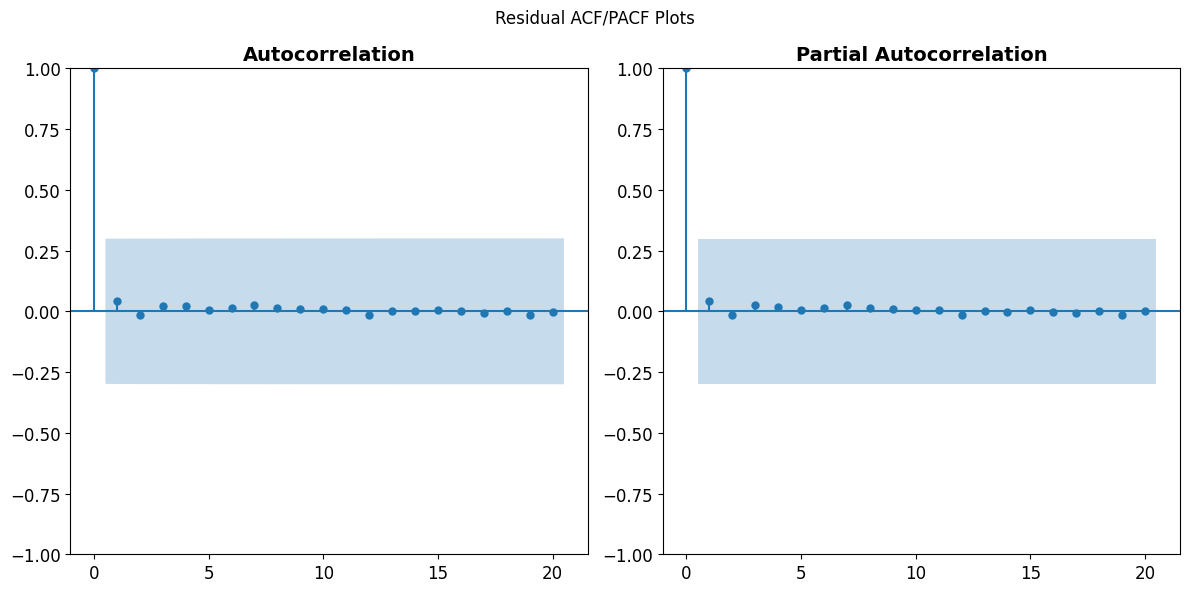


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 0.0002 - pss: 0.0140 - val_loss: 0.0018 - val_pss: 0.0057
Epoch 2/1000
1/1 [==============================] - loss: 0.0002 - pss: 0.0132 - val_loss: 0.0024 - val_pss: 0.0060
Epoch 3/1000
1/1 [==============================] - loss: 0.0003 - pss: 0.0200 - val_loss: 0.0017 - val_pss: 0.0127
Epoch 4/1000
1/1 [==============================] - loss: 0.0002 - pss: 0.0155 - val_loss: 0.0015 - val_pss: 0.0185
Epoch 5/1000
1/1 [==============================] - loss: 0.0001 - pss: 0.0090 - val_loss: 0.0016 - val_pss: 0.0107
Epoch 6/1000
1/1 [==============================] - loss: 0.0001 - pss: 0.0115 - val_loss: 0.0022 - val_pss: 0.0105
Epoch 7/1000
1/1 [==============================] - loss: 0.0000 - pss: 0.0099 - val_loss: 0.0023 - val_pss: 0.0071
Epoch 8/1000
1/1 [==============================] - loss: 0.0000 - pss: 0.0091 - val_loss: 0.0019 - val_pss: 

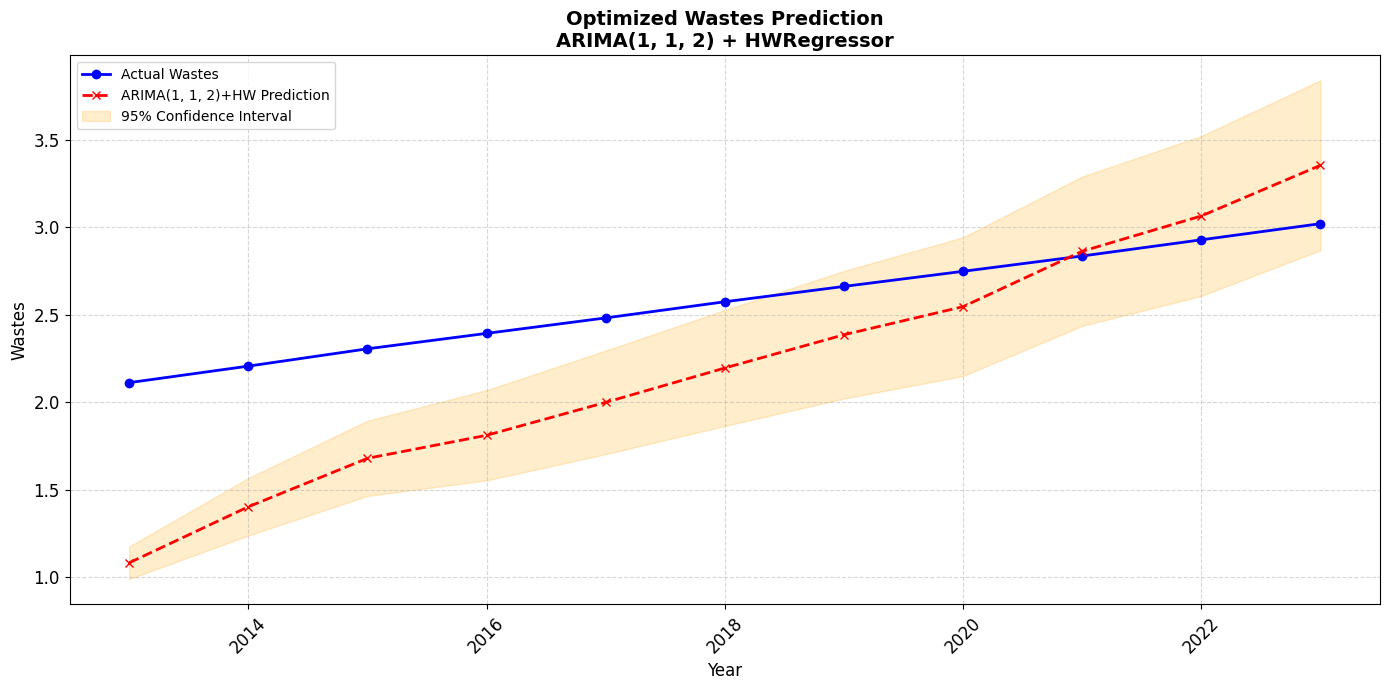


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 44.108
p-value: 0.000


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


df_clean = df.dropna(subset=['wastes', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes
wastes = df_clean['wastes'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values  # Get the index values (years)

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
wastes_train, wastes_test = wastes[:split_idx], wastes[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ARIMA Grid Search Function with fixed d=1 and Ljung-Box test
def find_best_arima(wastes_train, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=1) including Ljung-Box test"""
    best_aic = np.inf
    best_order = None
    best_model = None
    best_ljungbox = None
    
    # Generate all possible combinations of p and q with d=1
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue  # Skip (0,1,0) as it's just differencing
            
        try:
            model = ARIMA(wastes_train.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            # Perform Ljung-Box test on residuals
            lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
            lb_pvalue = lb_test['lb_pvalue'].values[0]
            
            print(f"ARIMA({p},1,{q}) - AIC: {current_aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
            
            # Prefer models where residuals show no autocorrelation (p-value > 0.05)
            if current_aic < best_aic and lb_pvalue > 0.05:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                best_ljungbox = lb_pvalue
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},1,{q}): {str(e)}")
            continue
    
    if best_order is None:
        print("Warning: No model passed Ljung-Box test (p-value > 0.05), using best AIC regardless")
        # Fallback to best AIC without Ljung-Box constraint
        for p, q in product(range(max_p+1), range(max_q+1)):
            if p == 0 and q == 0:
                continue
            try:
                model = ARIMA(wastes_train.ravel(), order=(p,1,q))
                results = model.fit()
                current_aic = results.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 1, q)
                    best_model = results
            except:
                continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    if best_ljungbox is not None:
        print(f"Ljung-Box p-value: {best_ljungbox:.3f} (residuals show no autocorrelation)")
    else:
        print("Warning: Selected model may have autocorrelated residuals")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=1
print("\nPerforming ARIMA grid search with d=1 and Ljung-Box test...")
best_order, arima_fit = find_best_arima(wastes_train)

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(wastes_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(wastes_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals to check model adequacy
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('Residual ACF/PACF Plots')
plt.tight_layout()
plt.show()

# 2. HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = wastes_train - arima_train_pred

hw_regressor = HWRegressor(
    p=500,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.03,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
wastes_test = wastes_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((wastes_test - final_test_pred) / wastes_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]  # Remove infinite values
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(wastes_test, final_test_pred)
mae = mean_absolute_error(wastes_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nOptimized Hybrid Model Performance (d=1):")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, wastes_test, label='Actual Wastes', marker='o', color='blue', linewidth=2)
plt.plot(dates_test, final_test_pred, label=f'ARIMA{best_order}+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Add confidence intervals
conf_int = arima_fit.get_forecast(steps=len(wastes_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Optimized Wastes Prediction\nARIMA{best_order} + HWRegressor', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wastes', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('wastes_essai_optimized_d1_ljungbox.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform final Ljung-Box test on complete model residuals
final_residuals = wastes_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")


Data shape after cleaning: (54, 18)

Performing ARIMA grid search...

Selected ARIMA order: (1, 1, 2)
AIC: -167.75
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 0.0022 - pss: 0.0374 - val_loss: 0.0004 - val_pss: 0.0354
Epoch 2/1000
1/1 [==============================] - loss: 0.0011 - pss: 0.0281 - val_loss: 0.0005 - val_pss: 0.0432
Epoch 3/1000
1/1 [==============================] - loss: 0.0006 - pss: 0.0209 - val_loss: 0.0003 - val_pss: 0.0184
Epoch 4/1000
1/1 [==============================] - loss: 0.0005 - pss: 0.0242 - val_loss: 0.0002 - val_pss: 0.0182
Epoch 5/1000
1/1 [==============================] - loss: 0.0004 - pss: 0.0234 - val_loss: 0.0002 - val_pss: 0.0218
Epoch 6/1000
1/1 [==============================] - loss: 0.0004 - pss: 0.0264 - val_loss: 0.0003 - val_pss: 0.0311
Epoch 7/1000
1/1 [==============================] - loss: 0.0003 - pss: 0.0249 - val_loss: 0.0002 - val_pss: 0.0297
Epoch 8/1000
1/1 [===================

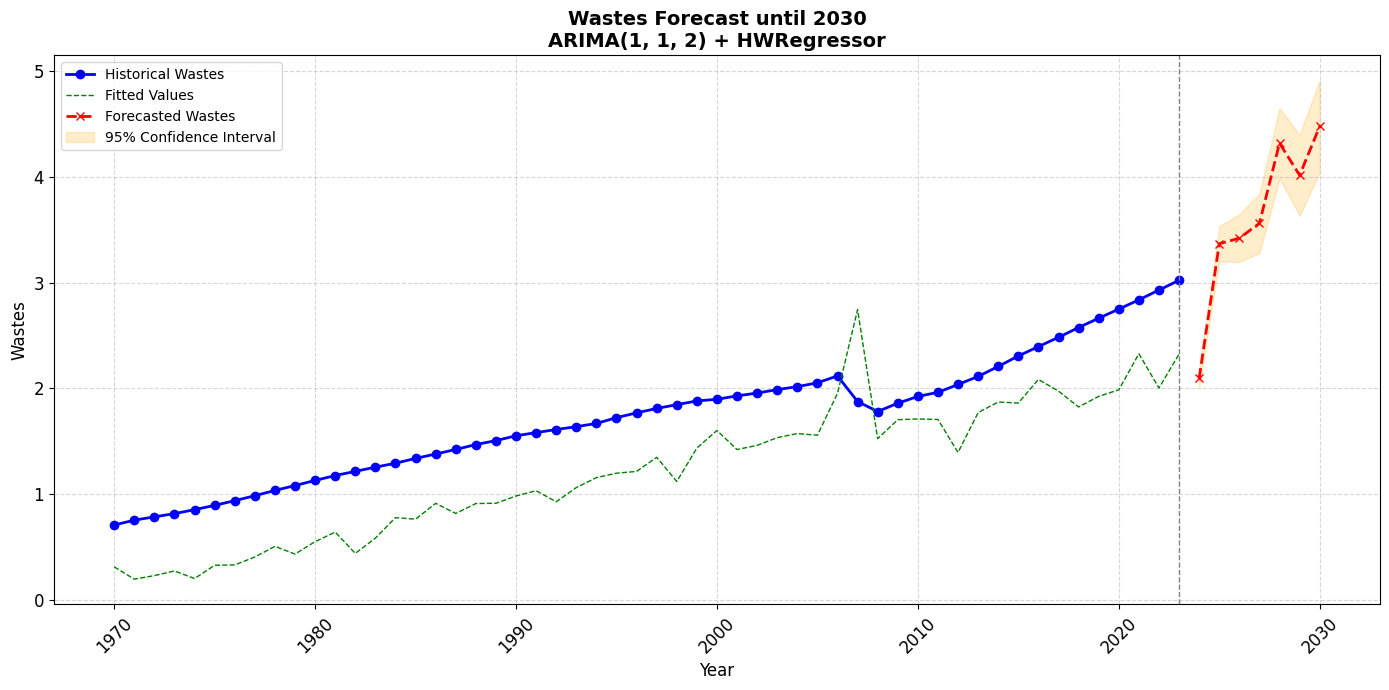


Forecasted values until 2030:
            wastes_forecast  forecast_lower  forecast_upper
2024-01-01         2.095507        2.006515        2.184500
2025-01-01         3.367151        3.201260        3.533042
2026-01-01         3.420023        3.194255        3.645791
2027-01-01         3.560032        3.279713        3.840351
2028-01-01         4.317064        3.984441        4.649687
2029-01-01         4.014784        3.630809        4.398759
2030-01-01         4.477341        4.042309        4.912373


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load and prepare data
df_clean = df.dropna(subset=['wastes', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the index is proper datetime and sorted
df_clean.index = pd.to_datetime(df_clean.index, format='%Y')  # Convert index to datetime
df_clean = df_clean.sort_index()

# Prepare full dataset
wastes = df_clean['wastes'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index  # Now properly a DatetimeIndex

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Simplified ARIMA Grid Search Function
def find_best_arima(series, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=1)"""
    best_aic = np.inf
    best_order = None
    best_model = None
    
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue
            
        try:
            model = ARIMA(series.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            if current_aic < best_aic:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                
        except:
            continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    
    return best_order, best_model

# Find optimal ARIMA parameters
print("\nPerforming ARIMA grid search...")
best_order, arima_fit = find_best_arima(wastes)

# Get ARIMA predictions on full data
arima_pred = arima_fit.predict(start=1, end=len(wastes), typ='levels').reshape(-1, 1)

# Train HWRegressor on full ARIMA residuals
residuals = wastes - arima_pred

hw_regressor = HWRegressor(
    p=500,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.03,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

hw_regressor.fit(X_scaled, residuals.ravel())

# Create future dates until 2030
last_date = dates[-1]
future_dates = pd.date_range(
    start=last_date + pd.DateOffset(years=1),
    end='2030-12-31',
    freq='YS'  # Year-start frequency
)

# Combine historical and future dates
all_dates = dates.union(future_dates)

# Generate future ARIMA forecasts
num_forecasts = len(future_dates)
arima_forecast = arima_fit.forecast(steps=num_forecasts).reshape(-1, 1)

# Create future X values (using last observed values as placeholder)
future_X = np.tile(X[-1], (num_forecasts, 1))
future_X_scaled = scaler_X.transform(future_X)

# Predict future residuals
residuals_forecast = hw_regressor.predict(future_X_scaled).reshape(-1, 1)

# Combine forecasts
final_forecast = arima_forecast + residuals_forecast

# Get confidence intervals
conf_int = arima_fit.get_forecast(steps=num_forecasts).conf_int()

# Combine historical and forecasted values
historical_pred = arima_pred + hw_regressor.predict(X_scaled).reshape(-1, 1)
all_predictions = np.vstack([historical_pred, final_forecast])

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(dates, wastes, label='Historical Wastes', marker='o', color='blue', linewidth=2)
plt.plot(dates, historical_pred, label='Fitted Values', color='green', linestyle='--', linewidth=1)
plt.plot(future_dates, final_forecast, label='Forecasted Wastes', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Add confidence intervals for forecasts
plt.fill_between(future_dates, 
                 conf_int[:, 0] + residuals_forecast.flatten(),
                 conf_int[:, 1] + residuals_forecast.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

# Add vertical line to separate history and forecast
plt.axvline(x=last_date, color='gray', linestyle='--', linewidth=1)

plt.title(f'Wastes Forecast until 2030\nARIMA{best_order} + HWRegressor', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wastes', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('wastes_forecast_2030.png', dpi=300, bbox_inches='tight')
plt.show()

# Create output dataframe with forecasts
forecast_df = pd.DataFrame(
    index=future_dates,
    data={
        'wastes_forecast': final_forecast.flatten(),
        'forecast_lower': (conf_int[:, 0] + residuals_forecast.flatten()),
        'forecast_upper': (conf_int[:, 1] + residuals_forecast.flatten())
    }
)

print("\nForecasted values until 2030:")
print(forecast_df)


Data shape after cleaning: (54, 18)

Performing ARIMA grid search with d=1 and Ljung-Box test...
ARIMA(0,1,1) - AIC: 8.87 - Ljung-Box p-value: 0.995
ARIMA(0,1,2) - AIC: 8.21 - Ljung-Box p-value: 0.999
ARIMA(0,1,3) - AIC: 9.99 - Ljung-Box p-value: 0.999
ARIMA(1,1,0) - AIC: 7.70 - Ljung-Box p-value: 0.998
ARIMA(1,1,1) - AIC: 9.18 - Ljung-Box p-value: 0.999
ARIMA(1,1,2) - AIC: 10.08 - Ljung-Box p-value: 0.999
ARIMA(1,1,3) - AIC: 10.48 - Ljung-Box p-value: 0.999
ARIMA(2,1,0) - AIC: 8.73 - Ljung-Box p-value: 0.999
ARIMA(2,1,1) - AIC: 10.62 - Ljung-Box p-value: 0.999
ARIMA(2,1,2) - AIC: 11.41 - Ljung-Box p-value: 0.999
ARIMA(2,1,3) - AIC: 12.33 - Ljung-Box p-value: 1.000
ARIMA(3,1,0) - AIC: 10.43 - Ljung-Box p-value: 0.999
ARIMA(3,1,1) - AIC: 11.07 - Ljung-Box p-value: 0.999
ARIMA(3,1,2) - AIC: 10.28 - Ljung-Box p-value: 1.000
ARIMA(3,1,3) - AIC: 13.95 - Ljung-Box p-value: 1.000

Selected ARIMA order: (1, 1, 0)
AIC: 7.70
Ljung-Box p-value: 0.998 (residuals show no autocorrelation)


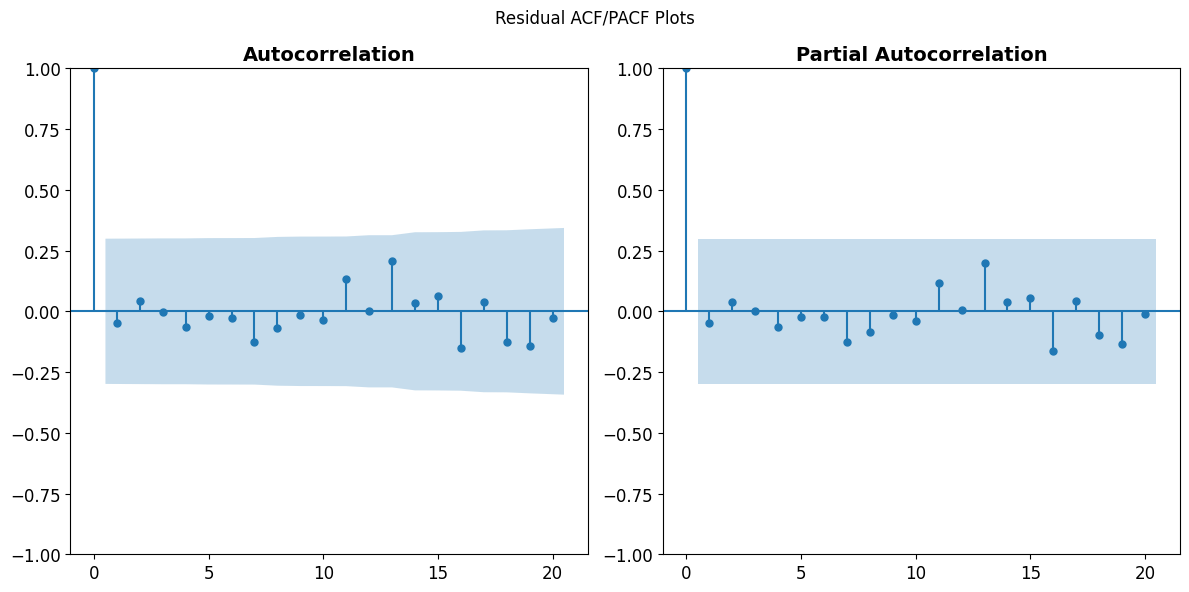


Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 1.4224 - pss: 0.9802 - val_loss: 1.0489 - val_pss: 1.0572
Epoch 2/1000
1/1 [==============================] - loss: 0.8443 - pss: 0.9264 - val_loss: 1.3803 - val_pss: 0.5192
Epoch 3/1000
1/1 [==============================] - loss: 1.8758 - pss: 1.2329 - val_loss: 2.1781 - val_pss: 1.6984
Epoch 4/1000
1/1 [==============================] - loss: 2.3863 - pss: 1.4159 - val_loss: 3.4167 - val_pss: 0.6136
Epoch 5/1000
1/1 [==============================] - loss: 1.5669 - pss: 1.0697 - val_loss: 2.8543 - val_pss: 1.7952
Epoch 6/1000
1/1 [==============================] - loss: 1.4192 - pss: 1.1432 - val_loss: 0.7791 - val_pss: 0.4762
Epoch 7/1000
1/1 [==============================] - loss: 1.1275 - pss: 1.0851 - val_loss: 1.0249 - val_pss: 1.0586
Epoch 8/1000
1/1 [==============================] - loss: 1.4882 - pss: 1.2451 - val_loss: 1.0390 - val_pss: 

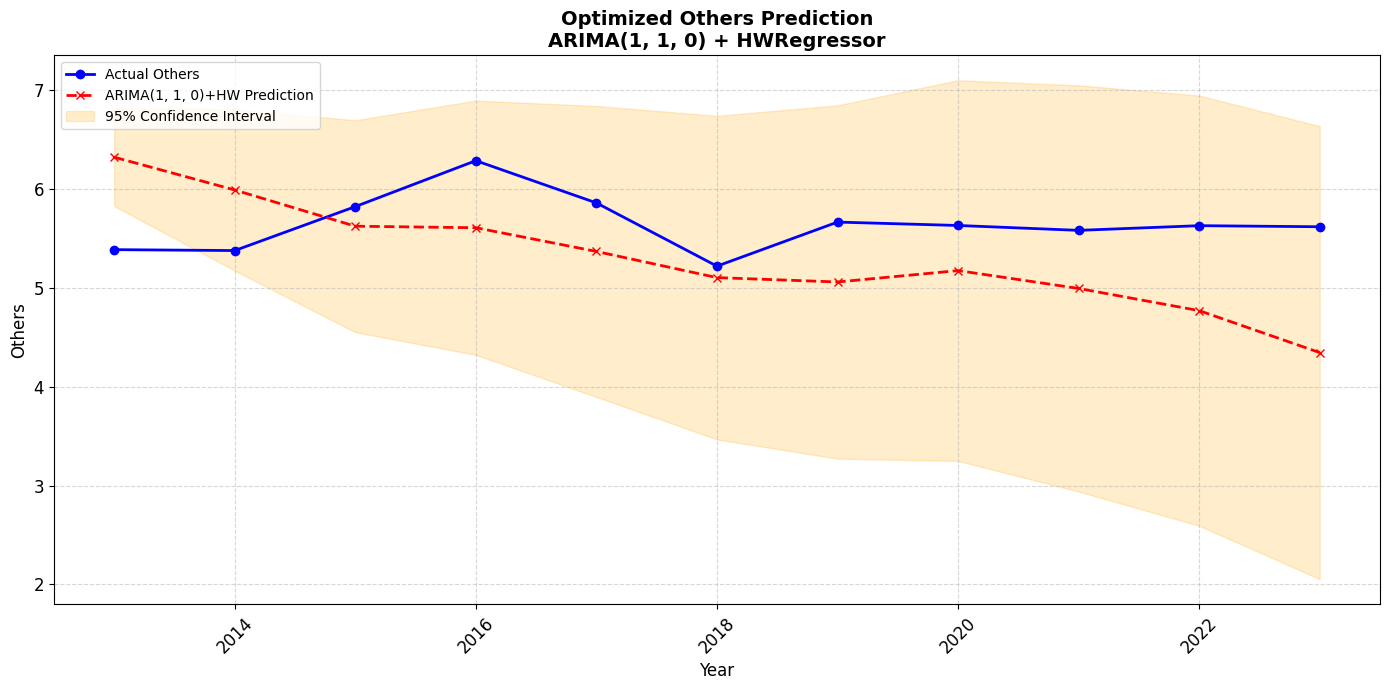


Final Ljung-Box Test Results for Complete Model:
Test Statistic: 29.266
p-value: 0.001


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


df_clean = df.dropna(subset=['others', 'e_power', 'forest'])
print("\nData shape after cleaning:", df_clean.shape)

if len(df_clean) < 10:
    raise ValueError("Not enough data available after cleaning")

# Ensure the data is sorted by year index
df_clean = df_clean.sort_index()

# Ensure proper array shapes
others = df_clean['others'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index.values  # Get the index values (years)

# Time-based split
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
others_train, others_test = others[:split_idx], others[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ARIMA Grid Search Function with fixed d=1 and Ljung-Box test
def find_best_arima(others_train, max_p=3, max_q=3):
    """Find ARIMA parameters with lowest AIC (fixed d=1) including Ljung-Box test"""
    best_aic = np.inf
    best_order = None
    best_model = None
    best_ljungbox = None
    
    # Generate all possible combinations of p and q with d=1
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue  # Skip (0,1,0) as it's just differencing
            
        try:
            model = ARIMA(others_train.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            # Perform Ljung-Box test on residuals
            lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
            lb_pvalue = lb_test['lb_pvalue'].values[0]
            
            print(f"ARIMA({p},1,{q}) - AIC: {current_aic:.2f} - Ljung-Box p-value: {lb_pvalue:.3f}")
            
            # Prefer models where residuals show no autocorrelation (p-value > 0.05)
            if current_aic < best_aic and lb_pvalue > 0.05:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                best_ljungbox = lb_pvalue
                
        except Exception as e:
            print(f"Failed to fit ARIMA({p},1,{q}): {str(e)}")
            continue
    
    if best_order is None:
        print("Warning: No model passed Ljung-Box test (p-value > 0.05), using best AIC regardless")
        # Fallback to best AIC without Ljung-Box constraint
        for p, q in product(range(max_p+1), range(max_q+1)):
            if p == 0 and q == 0:
                continue
            try:
                model = ARIMA(others_train.ravel(), order=(p,1,q))
                results = model.fit()
                current_aic = results.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 1, q)
                    best_model = results
            except:
                continue
    
    print(f"\nSelected ARIMA order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    if best_ljungbox is not None:
        print(f"Ljung-Box p-value: {best_ljungbox:.3f} (residuals show no autocorrelation)")
    else:
        print("Warning: Selected model may have autocorrelated residuals")
    
    return best_order, best_model

# Find optimal ARIMA parameters with d=1
print("\nPerforming ARIMA grid search with d=1 and Ljung-Box test...")
best_order, arima_fit = find_best_arima(others_train)

# Get ARIMA predictions
arima_train_pred = arima_fit.predict(start=1, end=len(others_train), typ='levels').reshape(-1, 1)
arima_test_pred = arima_fit.forecast(steps=len(others_test)).reshape(-1, 1)

# Plot ACF/PACF of residuals to check model adequacy
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(arima_fit.resid, lags=20, ax=plt.subplot(121))
plot_pacf(arima_fit.resid, lags=20, ax=plt.subplot(122))
plt.suptitle('Residual ACF/PACF Plots')
plt.tight_layout()
plt.show()

# 2. HWRegressor for residuals
print("\nTraining HWRegressor on ARIMA residuals...")
residuals_train = others_train - arima_train_pred

hw_regressor = HWRegressor(
    p=50,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.06,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

# Fit on residuals
hw_regressor.fit(X_train_scaled, residuals_train.ravel())

# Predict residuals
residuals_test_pred = hw_regressor.predict(X_test_scaled).reshape(-1, 1)

# Combine predictions
final_test_pred = arima_test_pred + residuals_test_pred

# Calculate metrics
others_test = others_test.reshape(-1, 1)
final_test_pred = final_test_pred.reshape(-1, 1)

with np.errstate(divide='ignore', invalid='ignore'):
    abs_perc_errors = np.abs((others_test - final_test_pred) / others_test)
    abs_perc_errors = abs_perc_errors[~np.isinf(abs_perc_errors)]  # Remove infinite values
    mape = np.mean(abs_perc_errors) * 100
    
mse = mean_squared_error(others_test, final_test_pred)
mae = mean_absolute_error(others_test, final_test_pred)
rmse = np.sqrt(mse)

print(f"\nOptimized Hybrid Model Performance (d=1):")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Enhanced plotting
plt.figure(figsize=(14, 7))
plt.plot(dates_test, others_test, label='Actual Others', marker='o', color='blue', linewidth=2)
plt.plot(dates_test, final_test_pred, label=f'ARIMA{best_order}+HW Prediction', 
         marker='x', color='red', linestyle='--', linewidth=2)

# Add confidence intervals
conf_int = arima_fit.get_forecast(steps=len(others_test)).conf_int()
plt.fill_between(dates_test, 
                 conf_int[:, 0] + residuals_test_pred.flatten(),
                 conf_int[:, 1] + residuals_test_pred.flatten(),
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title(f'Optimized Others Prediction\nARIMA{best_order} + HWRegressor', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Others', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('others_essai_optimized_d1_ljungbox.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform final Ljung-Box test on complete model residuals
final_residuals = others_test - final_test_pred
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
print("\nFinal Ljung-Box Test Results for Complete Model:")
print(f"Test Statistic: {lb_test_final['lb_stat'].values[0]:.3f}")
print(f"p-value: {lb_test_final['lb_pvalue'].values[0]:.3f}")
if lb_test_final['lb_pvalue'].values[0] > 0.05:
    print("Conclusion: Residuals show no significant autocorrelation (good fit)")
else:
    print("Warning: Residuals show significant autocorrelation (model may be misspecified)")

Fitting ARIMA model on full dataset...
Selected ARIMA order: (0, 1, 1)
Training HWRegressor on ARIMA residuals...
Starting training for 1000 epochs.
Epoch 1/1000
1/1 [==============================] - loss: 0.5900 - pss: 0.8384 - val_loss: 0.5905 - val_pss: 0.8230
Epoch 2/1000
1/1 [==============================] - loss: 0.3830 - pss: 0.7208 - val_loss: 0.6098 - val_pss: 0.8173
Epoch 3/1000
1/1 [==============================] - loss: 0.5394 - pss: 0.8154 - val_loss: 0.4915 - val_pss: 0.6912
Epoch 4/1000
1/1 [==============================] - loss: 1.0565 - pss: 1.2584 - val_loss: 1.0516 - val_pss: 1.3745
Epoch 5/1000
1/1 [==============================] - loss: 2.0084 - pss: 1.0663 - val_loss: 0.7166 - val_pss: 1.0571
Epoch 6/1000
1/1 [==============================] - loss: 1.8516 - pss: 1.2735 - val_loss: 1.5526 - val_pss: 1.6129
Epoch 7/1000
1/1 [==============================] - loss: 1.7681 - pss: 1.4263 - val_loss: 3.3281 - val_pss: 2.3311
Epoch 8/1000
1/1 [=====================

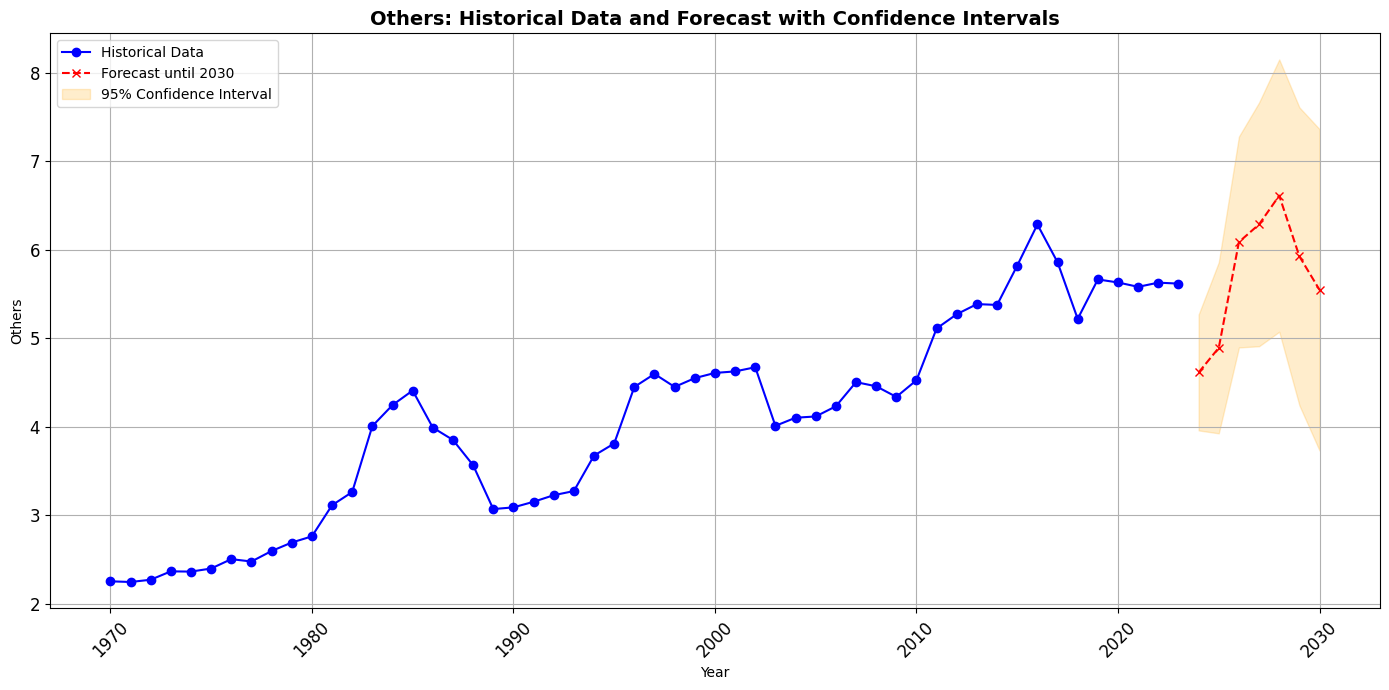

    Year  Forecast  Lower_Bound  Upper_Bound        Type
51  2021  5.582536          NaN          NaN  Historical
52  2022  5.629936          NaN          NaN  Historical
53  2023  5.619036          NaN          NaN  Historical
54  2024  4.614059     3.958987     5.269132    Forecast
55  2025  4.893278     3.925932     5.860624    Forecast
56  2026  6.089572     4.897121     7.282024    Forecast
57  2027  6.288950     4.910968     7.666933    Forecast
58  2028  6.614059     5.074547     8.153572    Forecast
59  2029  5.927184     4.242703     7.611665    Forecast
60  2030  5.548437     3.731307     7.365567    Forecast


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from hwm.estimators import HWRegressor
from sklearn.preprocessing import StandardScaler
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load and prepare data
df_clean = df.dropna(subset=['others', 'e_power', 'forest'])
df_clean = df_clean.sort_index()

# Prepare the full dataset
others = df_clean['others'].values.reshape(-1, 1)
X = df_clean[['e_power', 'forest']].values
dates = df_clean.index

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# ARIMA model fitting function
def fit_arima(others_data, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = None
    best_model = None
    
    for p, q in product(range(max_p+1), range(max_q+1)):
        if p == 0 and q == 0:
            continue
            
        try:
            model = ARIMA(others_data.ravel(), order=(p,1,q))
            results = model.fit()
            current_aic = results.aic
            
            if current_aic < best_aic:
                best_aic = current_aic
                best_order = (p, 1, q)
                best_model = results
                
        except:
            continue
    
    print(f"Selected ARIMA order: {best_order}")
    return best_order, best_model

# Fit ARIMA on full data
print("Fitting ARIMA model on full dataset...")
best_order, arima_fit = fit_arima(others)
arima_pred = arima_fit.predict(start=1, end=len(others), typ='levels').reshape(-1, 1)

# HWRegressor for residuals
print("Training HWRegressor on ARIMA residuals...")
residuals = others - arima_pred

hw_regressor = HWRegressor(
    p=50,
    nonlinear_input_estimator=StandardScaler(),
    nonlinear_output_estimator=StandardScaler(),
    loss="huber",
    output_scale=(-1, 1),
    time_weighting="linear",
    optimizer="adam",
    learning_rate=0.06,
    batch_size=64,
    max_iter=1000,
    tol=1e-5,
    early_stopping=True,
    validation_fraction=0.2,
    n_jobs=-1
)

hw_regressor.fit(X_scaled, residuals.ravel())

# Generate future dates until 2030
if isinstance(dates, pd.DatetimeIndex):
    last_year = dates[-1].year
    future_years = pd.date_range(start=f'{last_year+1}-01-01', end='2030-12-31', freq='AS')
    all_years = dates.union(future_years)
else:
    last_year = dates[-1]
    future_years = np.arange(last_year + 1, 2031)
    all_years = np.concatenate([dates, future_years])

# Prepare future exogenous variables (replace with actual future values)
n_future = len(future_years)
X_future = np.zeros((n_future, 2))  # Replace with actual future values
X_full = np.vstack([X_scaled, scaler_X.transform(X_future)])

# Generate forecasts with confidence intervals
forecast_steps = n_future
arima_forecast = arima_fit.get_forecast(steps=forecast_steps)
arima_pred_mean = arima_forecast.predicted_mean.reshape(-1, 1)
arima_conf_int = arima_forecast.conf_int()

residuals_forecast = hw_regressor.predict(X_full[-forecast_steps:]).reshape(-1, 1)
final_forecast = arima_pred_mean + residuals_forecast

# Calculate bounds (assuming normal distribution of residuals)
residual_std = np.std(residuals)
lower_bound = (arima_conf_int[:, 0] + residuals_forecast.flatten()) - 1.96 * residual_std
upper_bound = (arima_conf_int[:, 1] + residuals_forecast.flatten()) + 1.96 * residual_std

# Combine historical and forecasted values
historical_values = others.ravel()
forecast_values = final_forecast.ravel()
all_values = np.concatenate([historical_values, forecast_values])

# Create output dataframe with forecasts and bounds
forecast_df = pd.DataFrame({
    'Year': all_years,
    'Forecast': all_values,
    'Lower_Bound': np.concatenate([np.repeat(np.nan, len(dates)), lower_bound]),
    'Upper_Bound': np.concatenate([np.repeat(np.nan, len(dates)), upper_bound]),
    'Type': ['Historical'] * len(dates) + ['Forecast'] * len(future_years)
})

# Plot results with confidence interval
plt.figure(figsize=(14, 7))
plt.plot(forecast_df.loc[forecast_df['Type'] == 'Historical', 'Year'],
         forecast_df.loc[forecast_df['Type'] == 'Historical', 'Forecast'],
         label='Historical Data', marker='o', color='blue')

# Plot forecast with confidence interval
forecast_data = forecast_df.loc[forecast_df['Type'] == 'Forecast']
plt.plot(forecast_data['Year'], forecast_data['Forecast'],
         label='Forecast until 2030', marker='x', color='red', linestyle='--')
plt.fill_between(forecast_data['Year'],
                 forecast_data['Lower_Bound'],
                 forecast_data['Upper_Bound'],
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.title('Others: Historical Data and Forecast with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Others')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(forecast_df.tail(10))  # Show last 10 years including forecasts and bounds

In [31]:
## Let's put all the forecasted values in a data frame called df_forecast

features = ['year', 'power', 'transport', 'residential', 'industry', 'biomass',
           
        'forestry', 'farm', 'wastes', 'others']

forecast = {
'year' : [2024, 2025, 2026, 2027, 2028, 2029, 2030],
'power' : [4.062848, 3.987350 ,3.482033 ,4.464088 ,3.783812 , 4.570897 ,  2.570897 ],
'transport' : [6.906581, 5.775489, 5.490091, 5.694556, 6.426658, 6.685971, 7.075322 ],
'residential' : [2.090335, 2.952978, 2.780922, 2.678469, 4.089602, 3.485999, 2.654165],
'industry' : [8.161408, 7.659570, 7.328401, 7.455333, 7.734972, 8.171898, 8.806542],
'biomass' : [6.01, 5.68, 5.29, 5.07, 4.81, 4.88, 5.40],
'forestry' : [19.8667, 19.569800, 20.129280, 20.055332, 20.426780, 21.069198, 21.5698],
'farm' : [6.041278, 5.500958, 5.249763, 7.375943, 7.087530, 7.582124, 6.756970 ],
'wastes' : [2.095507, 2.644986, 3.645703,  3.648270, 4.301687, 3.743752, 4.477341],
'others': [4.614059, 5.214687, 5.998215, 5.812887, 5.906854, 6.206656, 6.614059  ]
}

df_forecast = pd.DataFrame.from_dict(forecast)
df_forecast

,year,power,transport,residential,industry,biomass,forestry,farm,wastes,others
0,2024,4.062848,6.906581,2.090335,8.161408,6.01,19.866700,6.041278,2.095507,4.614059
1,2025,3.987350,5.775489,2.952978,7.659570,5.68,19.569800,5.500958,2.644986,5.214687
2,2026,3.482033,5.490091,2.780922,7.328401,5.29,20.129280,5.249763,3.645703,5.998215
3,2027,4.464088,5.694556,2.678469,7.455333,5.07,20.055332,7.375943,3.648270,5.812887
4,2028,3.783812,6.426658,4.089602,7.734972,4.81,20.426780,7.087530,4.301687,5.906854
5,2029,4.570897,6.685971,3.485999,8.171898,4.88,21.069198,7.582124,3.743752,6.206656
6,2030,2.570897,7.075322,2.654165,8.806542,5.40,21.569800,6.756970,4.477341,6.614059


In [32]:
# Select columns from df (if 'year' is the index, reset it first to include as a column)
df_sub = df.reset_index()[['year', 'power', 'transport', 'residential', 'industry', 'biomass',
                           'forestry', 'farm', 'wastes', 'others']]


# Concatenate while preserving the 'year' column
df_total = pd.concat([df_sub, df_forecast], ignore_index=False)  # Keep index (year) intact

# Set 'year' back as index (if needed)
df_total.set_index('year', inplace=True)

df_total.head()

,power,transport,residential,industry,biomass,forestry,farm,wastes,others
year,,,,,,,,,
1970,0.4758,0.8961,0.6650,0.9818,0.995060,41.1559,1.6707,0.7087,2.252822
1971,0.4758,0.8967,0.6650,1.0341,0.989626,41.1559,1.6847,0.7545,2.245122
1972,0.4910,0.9773,0.7083,1.2151,1.013719,41.1559,1.7186,0.7859,2.270622
1973,0.6621,0.9316,0.6846,1.1449,1.041680,41.1559,1.7531,0.8165,2.365522
1974,0.5969,0.9754,0.7191,1.2605,1.070894,41.1559,1.8129,0.8537,2.362622


In [33]:
df_total.tail()

,power,transport,residential,industry,biomass,forestry,farm,wastes,others
year,,,,,,,,,
2026,3.482033,5.490091,2.780922,7.328401,5.29,20.129280,5.249763,3.645703,5.998215
2027,4.464088,5.694556,2.678469,7.455333,5.07,20.055332,7.375943,3.648270,5.812887
2028,3.783812,6.426658,4.089602,7.734972,4.81,20.426780,7.087530,4.301687,5.906854
2029,4.570897,6.685971,3.485999,8.171898,4.88,21.069198,7.582124,3.743752,6.206656
2030,2.570897,7.075322,2.654165,8.806542,5.40,21.569800,6.756970,4.477341,6.614059


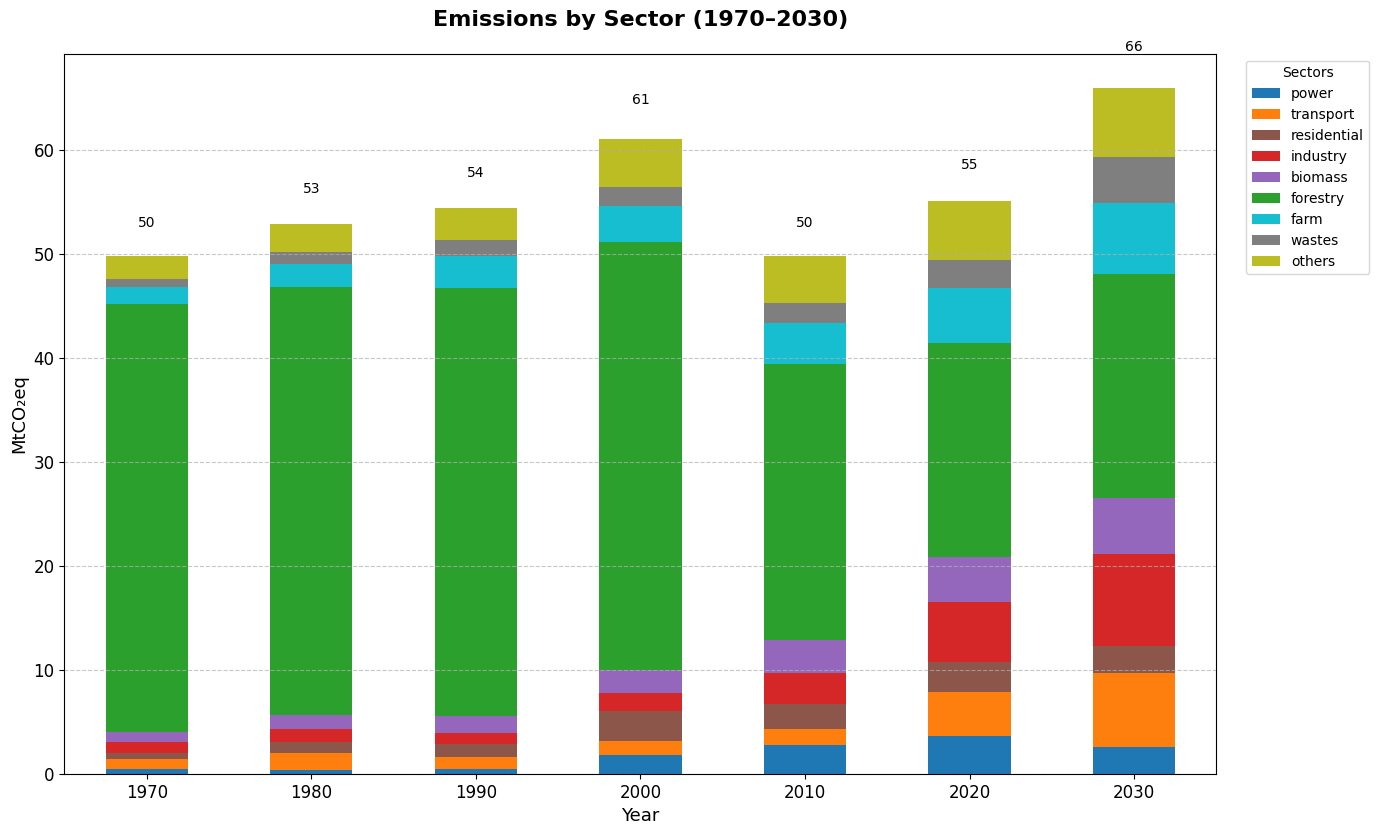

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# Select the sectors to plot
sectors = ['power', 'transport', 'residential', 'industry', 'biomass',
           'forestry', 'farm', 'wastes', 'others']

# Define custom colors
colors = ['#1f77b4',  # power - blue
          '#ff7f0e',  # transport - orange
          '#8c564b',  # residential - brown
          '#d62728',  # industry - red
          '#9467bd',  # biomass - purple
          '#2ca02c',  # forestry - green
          '#17becf',  # farm - cyan
          '#7f7f7f',  # wastes - gray
          '#bcbd22']  # others - yellow-green

# Filter for selected years
selected_years = [1970, 1980, 1990, 2000, 2010, 2020, 2030]
df_filtered = df_total.loc[selected_years]

# Create larger figure and axis
fig, ax = plt.subplots(figsize=(16, 9))  # Wider and taller

# Plot the stacked bar chart
df_filtered[sectors].plot(kind='bar', stacked=True, color=colors, ax=ax)

# Customize chart
ax.set_title('Emissions by Sector (1970–2030)', fontsize=16, pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('MtCO₂eq', fontsize=13)
ax.set_xticks(range(len(df_filtered)))
ax.set_xticklabels(df_filtered.index, rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add total value labels on top of each bar
for i, total in enumerate(df_filtered[sectors].sum(axis=1)):
    ax.text(i, total + (0.05 * total), f'{total:,.0f}', ha='center', va='bottom', fontsize=10)

# Legend outside to the right
ax.legend(title='Sectors', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust layout — leave space on the right for the legend
plt.subplots_adjust(left=0.08, right=0.8, top=0.9, bottom=0.1)
plt.savefig("md29.png", dpi=300, bbox_inches='tight')
plt.show()


<div style="background-color:lightblue; padding:10px;">
  <h1 style="color:darkblue;">3. MITIGATION SCENARIOS</h1>
</div>

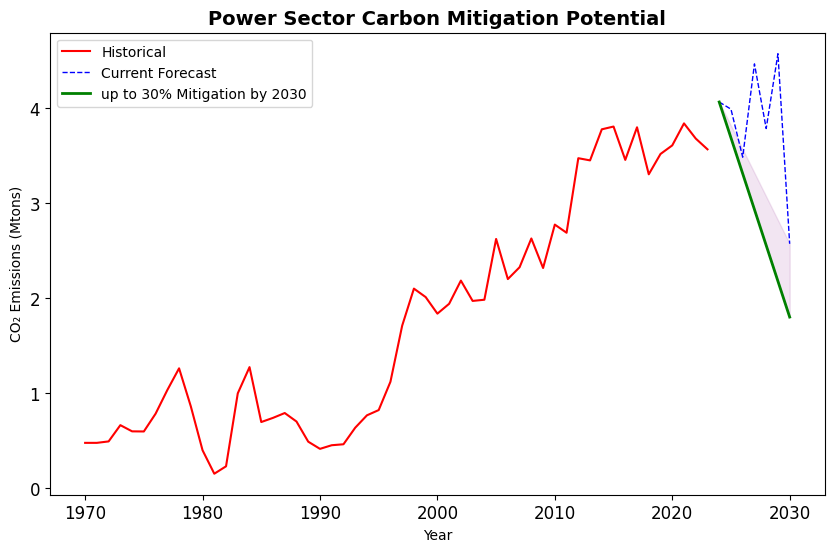

In [35]:
import matplotlib.pyplot as plt

def analyze_power_sector():
    # First ensure both dataframes have 'year' accessible
    # For df
    if 'year' not in df.columns and df.index.name == 'year':
        df.reset_index(inplace=True)
    elif 'year' not in df.columns:
        raise ValueError("'year' column not found in df")
    
    # For df_forecast
    if 'year' not in df_forecast.columns and df_forecast.index.name == 'year':
        df_forecast.reset_index(inplace=True)
    elif 'year' not in df_forecast.columns:
        raise ValueError("'year' column not found in df_forecast")

    # Calculate power sector's contribution to total emissions
    df['power_contribution'] = df['power'] / df['gross_total'] * 100

    # Plot historical trend
    plt.figure(figsize=(10,6))
    plt.plot(df['year'], df['power'], label='Historical', color='red')
    
    # Plot forecast (2024–2030)
    plt.plot(df_forecast['year'], df_forecast['power'], 'b--', label='Current Forecast', linewidth=1)
    
    # Extract the 2030 row
    row_2030 = df_forecast[df_forecast['year'] == 2030]
    if len(row_2030) == 0:
        raise ValueError("2030 data not found in forecast")
    year_2030 = 2030
    power_2030 = row_2030['power'].values[0]
    mitigated_2030 = power_2030 * 0.7

    # Connect last forecast point to mitigated 2030 point
    last_forecast_year = df_forecast.iloc[0]['year']  
    last_forecast_power = df_forecast.iloc[0]['power']
    
    plt.plot([last_forecast_year, year_2030], 
             [last_forecast_power, mitigated_2030], 
             'g-', linewidth=2, label='up to 30% Mitigation by 2030')
    
    # Create fill between area
    fill_years = [last_forecast_year, year_2030]
    fill_upper = [last_forecast_power, power_2030]
    fill_lower = [last_forecast_power, mitigated_2030]
    
    plt.fill_between(fill_years, fill_lower, fill_upper, color='purple', alpha=0.1)
    
    # Set x-axis ticks
    plt.xticks([1970, 1980, 1990, 2000, 2010, 2020, 2030])
    
    # Add labels and finalize
    plt.title('Power Sector Carbon Mitigation Potential')
    plt.ylabel('CO₂ Emissions (Mtons)')
    plt.xlabel('Year')
    plt.legend()
    plt.savefig('power_sector_mitigation.png', dpi=300, bbox_inches='tight')
    plt.savefig("md30.png", dpi=300, bbox_inches='tight')
    plt.show()

analyze_power_sector()

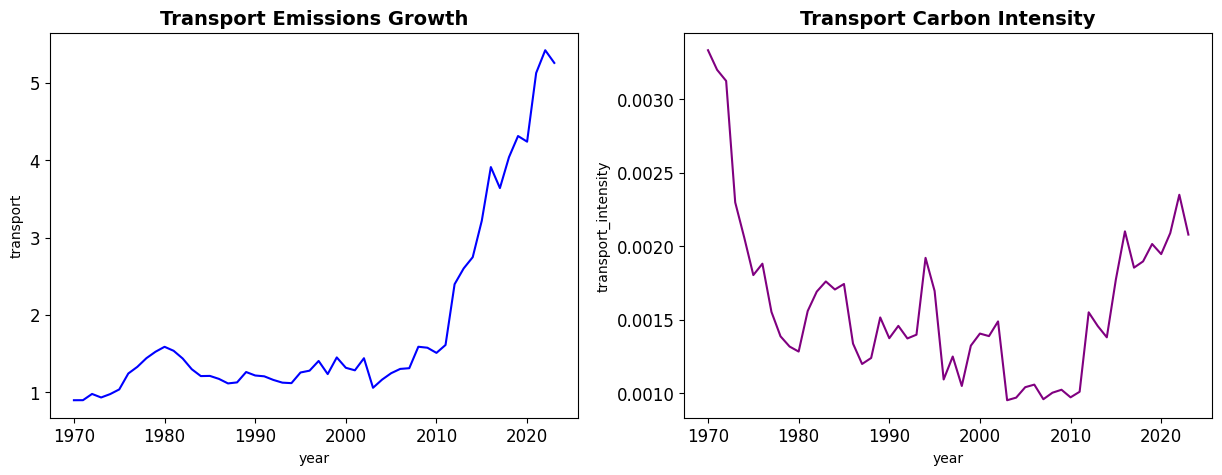

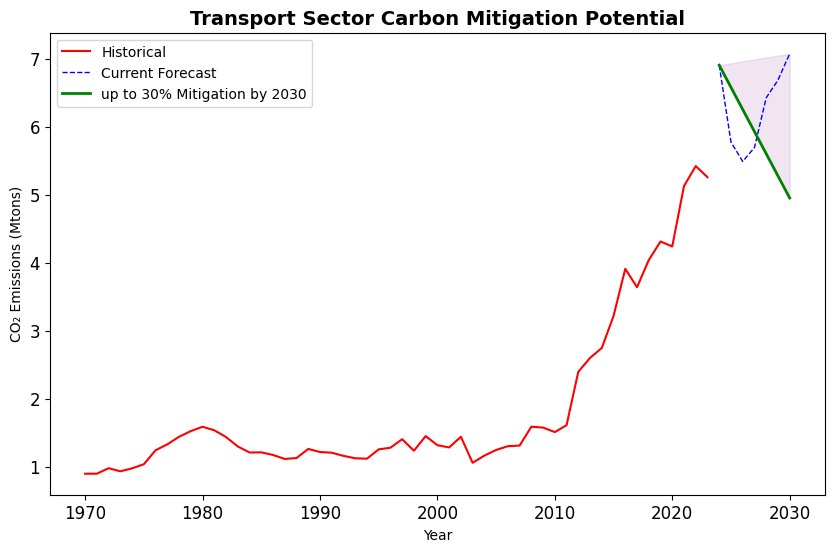

In [36]:
#2. Transport Sector Electrification
#Problem: Steady growth (0.8961 → 5.4224) despite efficiency improvements
#Mitigation Strategies:
#EV adoption (target 30% fleet by 2030)
#Public transport expansion
#Biofuel blending

import seaborn as sns

def transport_mitigation():
    # Calculate carbon intensity per GDP (transport efficiency)
    df['transport_intensity'] = df['transport'] / df['gdp_per_cap']
    
    # Plot efficiency trends
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    sns.lineplot(data=df, x='year', y='transport', ax=ax[0], color='blue')
    ax[0].set_title('Transport Emissions Growth')
    
    sns.lineplot(data=df, x='year', y='transport_intensity', ax=ax[1], color='purple')
    ax[1].set_title('Transport Carbon Intensity')


    # Plot historical trend
    plt.figure(figsize=(10, 6))
    plt.plot(df['year'], df['transport'], label='Historical', color='red')
    
    # Plot forecast (2024–2030)
    forecast = df_forecast
    plt.plot(forecast['year'], forecast['transport'], 'b--', label='Current Forecast', linewidth=1)
    
    # Extract the 2030 row
    row_2030 = forecast[forecast['year'] == 2030]
    year_2030 = 2030
    transport_2030 = row_2030['transport'].values[0]
    mitigated_2030 = transport_2030 * 0.7  # 30% reduction

    # Plot the mitigated scenario as a bold blue line segment
    # Connect last forecast point (2024) to mitigated 2030 point
    last_forecast_year = forecast.iloc[0]['year']  # Get year before 2030
    last_forecast_transport = forecast.iloc[0]['transport']
    
    plt.plot([last_forecast_year, year_2030], 
             [last_forecast_transport, mitigated_2030], 
             'g-', linewidth=2, label='up to 30% Mitigation by 2030')
    
    # Fill between current forecast and mitigated line
    fill_years = [last_forecast_year, year_2030]
    fill_upper = [last_forecast_transport, transport_2030]
    fill_lower = [last_forecast_transport, mitigated_2030]
    
    plt.fill_between(fill_years, fill_lower, fill_upper, color='purple', alpha=0.1)
    
    # Set x-axis ticks to match the original image
    plt.xticks([1970, 1980, 1990, 2000, 2010, 2020, 2030])
    
    # Add labels and finalize
    plt.title('Transport Sector Carbon Mitigation Potential')
    plt.ylabel('CO₂ Emissions (Mtons)')
    plt.xlabel('Year')
    plt.legend()
    plt.savefig('transport_sector_mitigation.png', dpi=300, bbox_inches='tight')
    plt.savefig("td30.png", dpi=300, bbox_inches='tight')
    plt.show()

transport_mitigation()

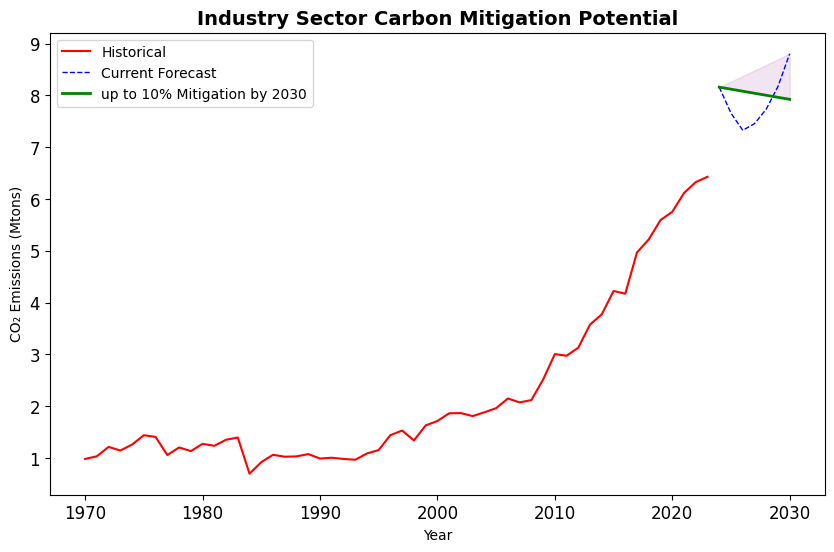

In [37]:
#3. Industrial Efficiency Improvements
#Problem: Volatile but high emissions (0.9818 → 6.4301)
#Mitigation Strategies:
#Energy efficiency retrofits
#Waste heat recovery
#Process electrification

import matplotlib.pyplot as plt
import seaborn as sns

def industry_mitigation():
    # Calculate carbon intensity per GDP (industry efficiency)
    df['industry_intensity'] = df['industry'] / df['gdp_per_cap']

    # Plot historical trend
    plt.figure(figsize=(10, 6))
    plt.plot(df['year'], df['industry'], label='Historical', color='red')
    
    # Plot forecast (2024–2030)
    forecast = df_forecast
    plt.plot(forecast['year'], forecast['industry'], 'b--', label='Current Forecast', linewidth=1)
    
    # Extract the 2030 row
    row_2030 = forecast[forecast['year'] == 2030]
    year_2030 = 2030
    industry_2030 = row_2030['industry'].values[0]
    mitigated_2030 = industry_2030 * 0.9  # 10% reduction

    # Plot the mitigated scenario as a bold blue line segment
    # Connect last forecast point (2024) to mitigated 2030 point
    last_forecast_year = forecast.iloc[0]['year']  # Get year before 2030
    last_forecast_industry = forecast.iloc[0]['industry']
    
    plt.plot([last_forecast_year, year_2030], 
             [last_forecast_industry, mitigated_2030], 
             'g-', linewidth=2, label='up to 10% Mitigation by 2030')
    
    # Fill between current forecast and mitigated line
    fill_years = [last_forecast_year, year_2030]
    fill_upper = [last_forecast_industry, industry_2030]
    fill_lower = [last_forecast_industry, mitigated_2030]
    
    plt.fill_between(fill_years, fill_lower, fill_upper, color='purple', alpha=0.1)
    
    # Set x-axis ticks to match the original image
    plt.xticks([1970, 1980, 1990, 2000, 2010, 2020, 2030])
    
    # Add labels and finalize
    plt.title('Industry Sector Carbon Mitigation Potential')
    plt.ylabel('CO₂ Emissions (Mtons)')
    plt.xlabel('Year')
    plt.legend()
    plt.savefig('industry_sector_mitigation.png', dpi=300, bbox_inches='tight')
    plt.savefig("id10.png", dpi=300, bbox_inches='tight')
    plt.show()

industry_mitigation()

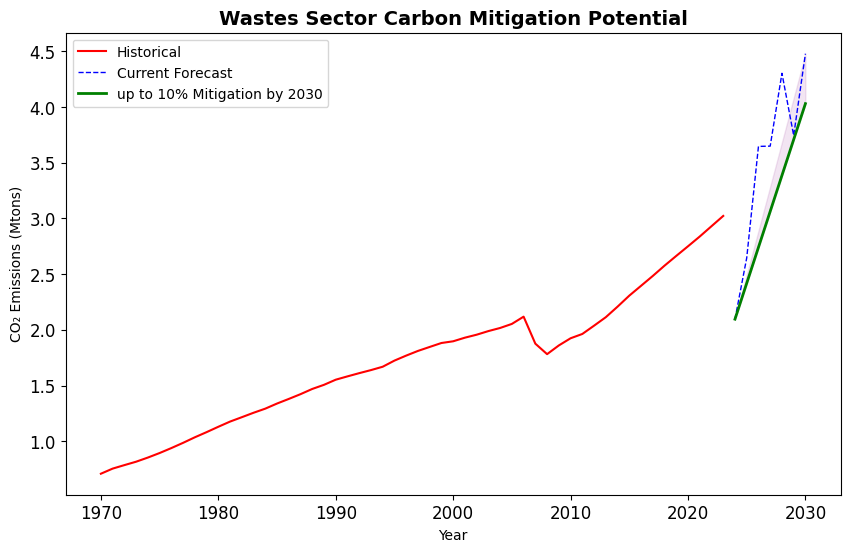

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

def wastes_mitigation():
    # Calculate carbon intensity per GDP (wastes efficiency)
    df['wastes_intensity'] = df['wastes'] / df['gdp_per_cap']
    

    # Plot historical trend
    plt.figure(figsize=(10, 6))
    plt.plot(df['year'], df['wastes'], label='Historical', color='red')
    
    # Plot forecast (2024–2030)
    forecast = df_forecast
    plt.plot(forecast['year'], forecast['wastes'], 'b--', label='Current Forecast', linewidth=1)
    
    # Extract the 2030 row
    row_2030 = forecast[forecast['year'] == 2030]
    year_2030 = 2030
    wastes_2030 = row_2030['wastes'].values[0]
    mitigated_2030 = wastes_2030 * 0.9  # 10% reduction

    # Plot the mitigated scenario as a bold blue line segment
    # Connect last forecast point (2024) to mitigated 2030 point
    last_forecast_year = forecast.iloc[0]['year']  # Get year before 2030
    last_forecast_wastes = forecast.iloc[0]['wastes']
    
    plt.plot([last_forecast_year, year_2030], 
             [last_forecast_wastes, mitigated_2030], 
             'g-', linewidth=2, label='up to 10% Mitigation by 2030')
    
    # Fill between current forecast and mitigated line
    fill_years = [last_forecast_year, year_2030]
    fill_upper = [last_forecast_wastes, wastes_2030]
    fill_lower = [last_forecast_wastes, mitigated_2030]
    
    plt.fill_between(fill_years, fill_lower, fill_upper, color='purple', alpha=0.1)
    
    # Set x-axis ticks to match the original image
    plt.xticks([1970, 1980, 1990, 2000, 2010, 2020, 2030])
    
    # Add labels and finalize
    plt.title('Wastes Sector Carbon Mitigation Potential')
    plt.ylabel('CO₂ Emissions (Mtons)')
    plt.xlabel('Year')
    plt.legend()
    plt.savefig('wastes_sector_mitigation.png', dpi=300, bbox_inches='tight')
    plt.savefig("wd10.png", dpi=300, bbox_inches='tight')
    plt.show()

wastes_mitigation()

In [39]:
def calculate_mitigation():
    # Current emissions (2023)
    current_flux = df['forestry'].iloc[-1]  # 20.56 Mt CO₂e
    current_forest_area = df['forest'].iloc[-1]  # 26,109.389 km² (2023)
    max_forest_area = df['forest'].max()  # 78,508.6 km² (1970)
    
    # Target: 34% reduction in emissions
    target_reduction = 0.34
    
    # Scenario 1: Reforestation
    # Restore 34% of lost forest area (from peak to current)
    lost_forest_area = max_forest_area - current_forest_area
    restored_area = lost_forest_area * 0.34  # 34% restoration
    # Estimate emissions reduction (assuming linear relationship between area and CO₂ flux)
    reforestation_mitigation = current_flux * (restored_area / lost_forest_area)
    
    # Scenario 2: Avoided Deforestation
    # Reduce emissions by 34% through protection
    avoided_deforestation = current_flux * (1 - target_reduction)
    
    print(f"""
    CURRENT STATUS (2023):
    - Forest Area: {current_forest_area:,.2f} km² ({(current_forest_area/max_forest_area)*100:.1f}% of 1970 peak)
    - LULUCF Emissions: {current_flux:.2f} Mt CO₂e
    
    MITIGATION TARGET (34% reduction):
    - Reforestation: Restore {restored_area:,.2f} km² → {reforestation_mitigation:.2f} Mt CO₂e avoided
    - Avoided Deforestation: Limit emissions to {avoided_deforestation:.2f} Mt CO₂e
    """)

calculate_mitigation()


    CURRENT STATUS (2023):
    - Forest Area: 26,109.39 km² (33.3% of 1970 peak)
    - LULUCF Emissions: 20.57 Mt CO₂e
    
    MITIGATION TARGET (34% reduction):
    - Reforestation: Restore 17,815.73 km² → 6.99 Mt CO₂e avoided
    - Avoided Deforestation: Limit emissions to 13.58 Mt CO₂e
    


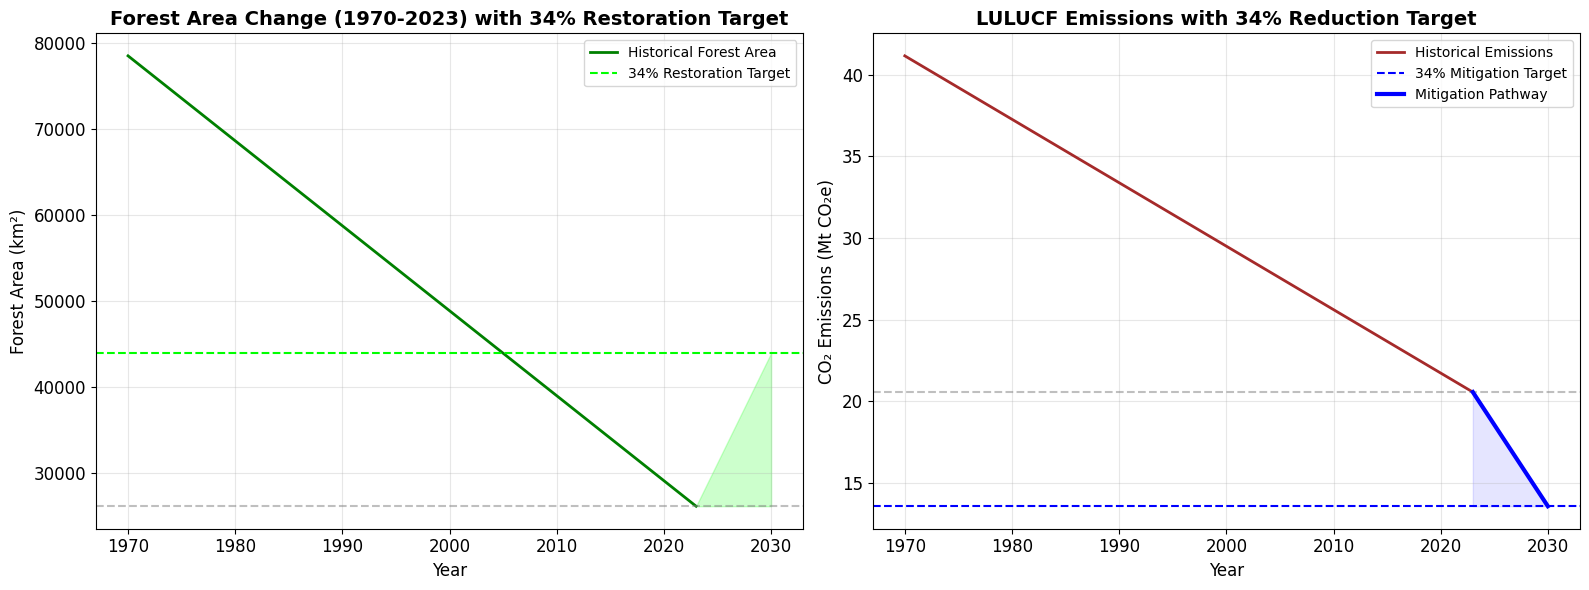

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_mitigation():
    years = np.arange(1970, 2024)
    forest_area = np.linspace(78508.6, 26109.389, len(years))
    forestry_flux = np.linspace(41.1559, 20.56, len(years))
    
    # Current values
    current_year = 2023
    current_forest = 26109.389
    current_flux = 20.56
    
    # Mitigation calculations
    max_forest = 78508.6
    lost_forest = max_forest - current_forest
    restored_area = lost_forest * 0.34
    target_forest = current_forest + restored_area
    target_flux = current_flux * 0.66  # 34% reduction
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Forest Area Change
    ax1.plot(years, forest_area, 'g-', linewidth=2, label='Historical Forest Area')
    ax1.axhline(y=current_forest, color='gray', linestyle='--', alpha=0.5)
    ax1.axhline(y=target_forest, color='lime', linestyle='--', 
                label='34% Restoration Target')
    ax1.fill_between(years, forest_area, current_forest, 
                    where=(forest_area <= current_forest), 
                    color='red', alpha=0.1)
    ax1.fill_between([2023, 2030], [current_forest, target_forest], current_forest,
                    color='lime', alpha=0.2)
    
    ax1.set_title('Forest Area Change (1970-2023) with 34% Restoration Target', fontsize=14)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Forest Area (km²)', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Emissions and Mitigation
    ax2.plot(years, forestry_flux, 'brown', linewidth=2, label='Historical Emissions')
    ax2.axhline(y=current_flux, color='gray', linestyle='--', alpha=0.5)
    ax2.axhline(y=target_flux, color='blue', linestyle='--', 
               label='34% Mitigation Target')
    
    # Projection to 2030
    ax2.plot([2023, 2030], [current_flux, target_flux], 'b-', linewidth=3, 
            label='Mitigation Pathway')
    
    ax2.fill_between([2023, 2030], [current_flux, target_flux], target_flux,
                    color='blue', alpha=0.1)
    
    ax2.set_title('LULUCF Emissions with 34% Reduction Target', fontsize=14)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('CO₂ Emissions (Mt CO₂e)', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('forestry_mitigation_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_mitigation()

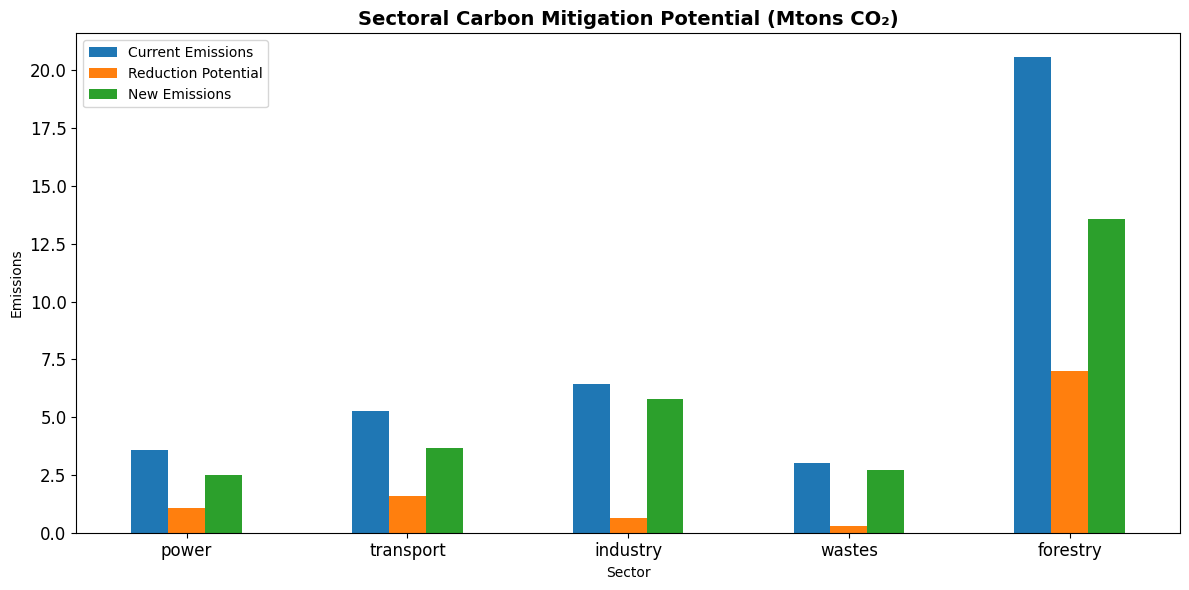

      Sector  Current Emissions  Reduction Potential  New Emissions
0      power             3.5649             1.069470       2.495430
1  transport             5.2583             1.577490       3.680810
2   industry             6.4301             0.643010       5.787090
3     wastes             3.0218             0.302180       2.719620
4   forestry            20.5698             6.993732      13.576068


In [41]:
def create_mitigation_dashboard():
    sectors = ['power', 'transport', 'industry', 'wastes', 'forestry']
    mitigation_potentials = [0.3, 0.3, 0.1, 0.1, 0.34]  # Sector-specific reduction factors
    
    results = []
    for sector, potential in zip(sectors, mitigation_potentials):
        current = df[sector].iloc[-1]
        reduction = current * potential
        results.append({
            'Sector': sector,
            'Current Emissions': current,
            'Reduction Potential': reduction,
            'New Emissions': current - reduction
        })
    
    results_df = pd.DataFrame(results)
    
    # Visualization
    fig, ax = plt.subplots(figsize=(12,6))
    results_df.set_index('Sector').plot(kind='bar', ax=ax)
    plt.title('Sectoral Carbon Mitigation Potential (Mtons CO₂)')
    plt.ylabel('Emissions')
    plt.xticks(rotation = 0)
    plt.tight_layout()
    plt.savefig('sectoral_mitigation.png')
    plt.show()
    
    return results_df

mitigation_report = create_mitigation_dashboard()
print(mitigation_report)

In [42]:
df['power'].iloc[-1]

3.5649